<a href="https://colab.research.google.com/github/zberglun/Flour-Survey-Data/blob/main/Flour_model_Recall_Behavior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Code Walkthrough
## Meta Commentary
This document will serve as a guided step through for the code. It will explain each line and section and the logical flow. One important thing to note is how comments work in R.
The "#" symbol is seen as line comments, meaning the code will not compile or run on that line. Additionally " ''' " denotes a block comment. So sections of text or code between two sets of ''' will be treated as comments


## Outline
The code will have the following sections
1. Data Import and Package Loading
2. Data Exploration
3. Feature Selection
4. Data Transformation
5. Model Ensemble Creation
6. Top Feature Extraction
7. PDP Plots and ggplot2
8. Results Graphs
9. Supplmentary unused explorations for possible future investigation

# Data Import and Package Loading
R functions off of a series of pre-written code by other scientists and statisticans through it's open source nature.
A set of these pre-written codes are bundled together and published online as packages. Packages are also interchangably called libraries.
Packages are the fundamentals used by other researchers and industry professionals, similar to the way we cite papers in our manuscript, we need to keep track of the packages we use and cite them as well to give proper credit to the authors. It also means we have to use our judgement and trust that the algorithms are coded and implented correctly on their end.

## Section Description
This section will load all the packages used in the analysis, there are some main packages used, which then also load other smaller packages. Additionally, this section will load the data from the CSV or excel file into the R environment. Think of the environment as a small virtual desktop of files and data that the programming language can see and interact with. Keep in mind on Kaggle, data from the computer will first be needed to be loaded manually into the Kaggle environment as it too is a seperate virutal space.  
Think loading order as:
* Computer -> Kaggle -> R

This way we can then focus on manipulation being done in R. It also means any changes to the dataset in R are not reflected in the data stored both on Kaggle and on the Computer.

### Important Packages
* Tidyverse
    + This is a package, or a set of coding operations and tools that can streamline code and can make things more easy to read.
* ggplot2, ggarrange
    + These packages are used to create visualizations, i.e the bar charts and PDPs (These will be explained in their relevant section).
* Caret, CaretList
    + These package are used to create machine learning models, or in the case of CaretList, model-ensembles
* stats
    + This is one the most important packages, it contains most of every useful model needed
* PDP
    + This package is used to created the PDP plots, it uses the models to create predictions, and then uses these predictions to create the plots
* rpub
    + This package contains several useful functions for visualization ?  Not sure if used?
* Psych
    + This package is basically if stats package had a baby with the psycology and sociology field. It's useful for non-parametric tools.
* FontQuiver, etc.
    + These packages are libraries of fonts enabling custom font, or simple windows fonts to be used in ggplot.
* qqplotr
    + this package is used to create the qq plots
* base
    + this package is not on the code, as it is already loaded by default. It's the package all other libraries are made on top off, think of it as progenitor
* stringr
    + this package contains tools useful for when working with strings, or text.

In [ ]:
R.Version()

$platform
[1] "x86_64-pc-linux-gnu"

$arch
[1] "x86_64"

$os
[1] "linux-gnu"

$system
[1] "x86_64, linux-gnu"

$status
[1] ""

$major
[1] "4"

$minor
[1] "3.3"

$year
[1] "2024"

$month
[1] "02"

$day
[1] "29"

$`svn rev`
[1] "86002"

$language
[1] "R"

$version.string
[1] "R version 4.3.3 (2024-02-29)"

$nickname
[1] "Angel Food Cake"

In [ ]:
### This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats

# Start with installing special packages not on Kaggle environment natively


install.packages("knitr")
library(knitr)

suppressWarnings({
 # Code that generates warning messages
install.packages("pbkrtest") #Install older version
install.packages("car")
install.packages("ggpubr")
install.packages("MultNonParam")
install.packages("pre")
install.packages("ggpubr")
install.packages("psych")
install.packages("gmodels")
install.packages("caret")
install.packages("manipulate")
install.packages("expm")
install.packages("DescTools")
install.packages("randomForest")
install.packages("viridis")
install.packages("pdp")
install.packages("iml")
install.packages("neuralnet")
install.packages("party")
install.packages("caretEnsemble")
install.packages("caTools")
install.packages("LogicReg")
install.packages("DMwR2")
install.packages("vip")
#import needed libraries
library(tidyverse) # metapackage of all tidyverse packages,
library(psych)
library(gmodels)
library(base)
library(datasets)
library(graphics)
library(caret)
library(grDevices)
library(methods)
library(stats)
library(utils)
library(rpart)
library(lattice)
library(ggplot2)
library(reshape2)
library(carData)
library(manipulate)
library(mvtnorm)
library(expm)
library(DescTools)
library(nnet)
library(randomForest)
library(gridExtra)
library(viridis)
library(pdp)
library(iml)
library(neuralnet)
library(party)
library(plyr)
library(devtools)
library(caretEnsemble)
library(psych)
library(base)
library(colorspace)
library(datasets)
library(graphics)
library(grDevices)
library(methods)
library(stringr)
library(stats)
library(utils)
library(ModelMetrics)
library(recipes)
library(rpart)
library(lattice)
library(ggplot2)
library(reshape2)
library(mvtnorm)
library(e1071)
library(caTools)
library(nnet)
library(randomForest)
library(gridExtra)
library(viridis)
library(partykit)
library(pdp)
library(iml)
library(neuralnet)
library(party)
library(plyr)
library(dplyr)
library(LogicReg)
library(caret)
library(caretEnsemble)
library(DMwR2)
library(gmodels)
library(data.table)
library(MultNonParam)
library(pre)
library(vip)
library(ggpubr)
library(rstatix)
})
# Input data files are available in the read-only "../input/" directory
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



# the <- is an assignment operator. This tells R to store whatever is on the right side of the operator as a variable with the name of the left side. This symbol is equivalent to = in other languages
#In this case, we read the data file from a txt file, keep the header from the file as names for the variables, and to keep the data types for each variable as read by R.
#R predicts he datatypes based on the first few rows of data. learn about data types below


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘lme4’, ‘numDeriv’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘carData’, ‘abind’, ‘quantreg’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘corrplot’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘mitools’, ‘survey’, ‘mvtnorm’, ‘ICS’, ‘ICSNP’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘iterators’, ‘plotmo’, ‘foreach’, ‘shape’, ‘libcoin’, ‘inum’, ‘ea

In [ ]:
######################################################################### Load Data from Google Drive #################################################################

# Mount Google Drive in an R kernel
library("googledrive")
library("googlesheets4")
# Check if is running in Colab and redefine is_interactive()
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) {
suppressMessages({
install.packages("R.utils")
library(R.utils)
library(httr)
library(rlang)
})
my_check <- function() {return(TRUE)}
reassignInPackage("is_interactive", pkgName = "httr", my_check)
reassignInPackage("is_interactive", pkgName = "rlang", my_check)
}
# Call Google Drive authentication forcing interactive login and save in cache
googledrive::drive_auth(use_oob = TRUE, cache = TRUE)
print("Connected Successfully")

# Find Google Sheets
Sheets <- googledrive::drive_find(type = "spreadsheet")
# Reuse token to Sheet authentification
googlesheets4::gs4_auth(token = drive_token())
# Read first Google Sheet in Google Drive
a <- googlesheets4::read_sheet("https://docs.google.com/spreadsheets/d/1wG9ZRiQNqTO6AO-47hZs9uxi1JvGWuU99EuSr1sHDLo/edit#gid=1731128864")
a <- as.data.frame(a)
reg_data<- a



Attaching package: ‘googlesheets4’


The following objects are masked from ‘package:googledrive’:

    request_generate, request_make


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=3d369f0f57b029940f4e42f842f29ed2&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWVhWVNIRDRJRno0d29fVkplVk42TG9HeHRXTFBXNjVqMDB3b0gwTWNDTVpBSkdkdDZGQW1LQzdMdC1OcGNFZWswRllGUSIsInN0YXRlIjoiM2QzNjlmMGY1N2IwMjk5NDBmNGU0MmY4NDJmMjllZDIifQ==
[1] "Connected Successfully"


✔ Reading from Model 2 Datafile.

✔ Range Model 2 Datafile.



When data is imported, you typically import it as an "object", or a special data type that is beyond the basic or fundamentals to computers. Computers obvious only understand numbers, but the layer above that are the following
* Double/ Float
* Int
* String
* Character
* Boolean
Floats or Doubles can be different in other languages, these are decimal pointed numbers
Int, or Integers are whole number integers.
String, a list of ordered characters
Char or Character, a single letter or symbol ex. " . "
Sometimes chars and strings can be used interchangably, but typically chars are recognized as only being one symbol.
Boolean, it's a binary variable, or True and False.

R has special data types or objects that are common. These are
* Dataframe
* Vector
* Table
* Matrix
* Factor

Dataframe is a container data type meaning it holds other data, but it's fairly flexible in it's contents and structure. This is commonly what I use to hold my data. Dataframes hold column "Vectors" which is another container data type. Every single variable is technically held in a vector. Tables and Matrix/Matrices are common specific types of containers like dataframes. They each have their small nuances that set them apart and i convert between them to get different functions to behave properly.

Factors are a special type of paired data type, they are a categorical variable effectively. You have labels and you also have meanings or values you can assign them. Some models required them to be used for the Recall Awareness exploration.

One other note, you may see refrences to tibbles. These are effectively a special or lazier version of dataframes, as they lack some of the functionality that data frames have like converting datatypes. This is useful so you don't accidentally change them. I do not go out of my way to use tibbles, and actively change things back to dataframes for some functions. It is technically lazier or dirtier code and is something I am working on as I learn and become more professional.

# Data Exploration
When importing data, if you have not explored it in other tools, this can be done in R. It's necessary as a researcher to understand the data and its nuances including data types, distributions, means, and correlations. I first explored my data in Excel and SPSS. I ran correlations and reviewed the data types. The one feature of the data i have not been able to explore is distribution and linearity.
## Correlations

To explore the data set, correlations were conducted. Specifically of note is tetrachoric correlations which are not possible in SPSS. These correlations can be conducted on binary variables, with tetrachoric specifically being two binary variables

In [ ]:


cor(reg_data) # This will do pairwise correlations of all variables, however, this is only is valid for continuous variables. Some variables are also constant and do not appear
#Self_risk_perception_2 and _3 are strongly correlated at 0.7, as such, one will be removed from the input to maintain independence
#Risk_perception_recall_1 and _2 are highly correlated at 0.62, as such one will be removed from the input to maintain independence

#now time to use tetrachoric corrlation on the binary variables to check their correlations, tetrachoric correlations is a special case of polychoric correlations which can be conducted on binary variables

#Create Crosstables
act_5vrec_heard <- CrossTable(reg_data$Recall_Hear_Action_5,reg_data$Recall_Heard) # The $ is a vector identifier, it doesn't fucntion on "atomized" vectors, or data containers with only one vector.
act_5vrec_bough <-CrossTable(reg_data$Recall_Hear_Action_5, reg_data$Recall_Bought_Action_5) # We can use $ to specfiy a column or variable on a table to use.
rec_heardvrec_bough <-CrossTable(reg_data$Recall_Heard, reg_data$Recall_Bought_Action_5)
# These look at creating small tables for comparisons


#create actual matrices of the Ns
act_5vrec_heard.a <- c(632, 182) #This code, c() , creates a vector object with data automatically typed by R
act_5vrec_heard.b <- c(103, 37)
act_5vrec_heard <- cbind(act_5vrec_heard.a, act_5vrec_heard.b) #cbind combines multiple vectors into a dataframe
act_5vrec_bough.a <- c(717,214)
act_5vrec_bough.b <- c(18,5)
act_5vrec_bough <- cbind(act_5vrec_bough.a,act_5vrec_bough.b)
rec_heardvrec_bough.a <- c(796, 135)
rec_heardvrec_bough.b <- c(18,5)
rec_heardvrec_bough <- cbind(rec_heardvrec_bough.a,rec_heardvrec_bough.b)

#run tetrachoric using package: psych
tetrachoric(act_5vrec_heard)
tetrachoric(act_5vrec_bough)
tetrachoric(rec_heardvrec_bough)


Warning message in cor(reg_data):
“the standard deviation is zero”


Recall_Heard  Behavior_Score Type_Flour_1 
Recall_Heard                        1.000000000  -0.061704875   -0.0741458648
Behavior_Score                     -0.061704875   1.000000000    0.1185828998
Type_Flour_1                       -0.074145865   0.118582900    1.0000000000
Type_Flour_2                        0.165596055  -0.043215222   -0.1319412486
Type_Flour_3                        0.149181261  -0.006755582    0.0339811386
Type_Flour_4                       -0.035812172   0.131252702    0.0030255774
Risk_Behavior                       0.158220900   0.355422244    0.0545159198
Risk_Perception_Consumption         0.188060157   0.267475083    0.0157633801
Risk_Perception_Microbiological_1  -0.066982005   0.114998172    0.0240029519
Risk_Perception_Microbiological_2  -0.063834766   0.064859042    0.0091608600
Risk_Perception_Microbiological_3  -0.043092617   0.019328425    0.0067319996
Risk_Perception_Microbiological_4   0.026310926   0.011075861    0.0038358135
Risk_Perception_Microbiological_5   0.016851173   0.025475719   -0.0139687417
Risk_Perception_Microbiological_6   0.071847977   0.004638317   -0.0586751246
Risk_Perception_Microbiological_7  -0.207273571   0.127497059    0.0699862663
Risk_Perception_Microbiological_8  -0.251959842   0.184343661    0.0848146074
Risk_Perception_Microbiological_9   0.008911128   0.016525593   -0.0412947358
Risk_Perception_Microbiological_10  0.025353583   0.009938838   -0.0503899954
Risk_Perception_Microbiological_11 -0.146243999   0.108393449    0.0540686798
Type_Cleaning_Counter1              0.272948733  -0.027357362    0.0104575673
Type_Cleaning_Counter2              0.062859209  -0.164934386    0.0054076895
Type_Cleaning_Counter5             -0.050041624  -0.044088475    0.0116240464
Contamination_Knowledge             0.109882168   0.088754900   -0.0005706723
Consumer_Focus_Pack_1              -0.033017236   0.081769221    0.0160301915
Consumer_Focus_Pack_2               0.017511412   0.008471752   -0.0019780106
Consumer_Focus_Pack_3               0.095423532   0.022780125   -0.0486527371
Consumer_Focus_Pack_4               0.235692676   0.033568140    0.0451971886
Consumer_Focus_Pack_5              -0.102293054   0.113936571    0.0203404056
Consumer_Focus_Pack_6               0.082931894   0.107675030   -0.0242331410
Consumer_Focus_Pack_7               0.018992164   0.093901818   -0.0338270015
⋮                                  ⋮             ⋮              ⋮            
State_36                           -0.0308915299  0.032260692    0.006518821 
State_37                           -0.0061528199  0.043266934    0.032451452 
State_38                            0.0059475963  0.014334068    0.008772631 
State_39                            0.0032831495 -0.004699001    0.002937556 
State_41                            0.0189386264  0.041671154   -0.030664715 
State_42                            0.0481388506 -0.002468979    0.043071622 
State_43                           -0.0137878389  0.037489890    0.011429398 
State_44                           -0.0176177857 -0.020560961    0.050316418 
State_45                           -0.0017354679 -0.017611526    0.021812471 
State_46                           -0.0013455609  0.032012393   -0.010216150 
State_47                           -0.0137878389  0.015238609    0.011429398 
State_48                            0.0147818526  0.038713834    0.031166889 
State_49                           -0.0202967981  0.033671410    0.027486415 
State_50                            0.0524358625 -0.045633784   -0.022319809 
State_51                           -0.0480518675 -0.005052865    0.039832487 
State_52                           -0.0480518675 -0.005052865    0.039832487 
Self_Risk_Perception_1              0.0124235790 -0.015465454   -0.026064102 
Self_Risk_Perception_2              0.0462402922  0.063458283   -0.012874919 
Self_Risk_Perception_3             -0.0002181589  0.106678128   -0.015672099 
Children                            0.0776792730  0.03766


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                              | reg_data$Recall_Heard 
reg_data$Recall_Hear_Action_5 |         0 |         1 | Row Total | 
------------------------------|-----------|-----------|-----------|
                            0 |       601 |       101 |       702 | 
                              |     0.016 |     0.093 |           | 
                              |     0.856 |     0.144 |     0.766 | 
                              |     0.770 |     0.743 |           | 
                              |     0.655 |     0.110 |           | 
------------------------------|-----------|-----------|-----------|
                            1 |       180 |        35 |       215 | 
                              |     0.053 |     0.304 |           | 


Call: tetrachoric(x = act_5vrec_heard)
tetrachoric correlation 
[1] 0.071

 with tau of 
                  act_5vrec_heard.a 
             0.74              1.05 

Call: tetrachoric(x = act_5vrec_bough)
tetrachoric correlation 
[1] -0.017

 with tau of 
                  act_5vrec_bough.a 
             0.74              1.98 

Call: tetrachoric(x = rec_heardvrec_bough)
tetrachoric correlation 
[1] 0.12

 with tau of 
                      rec_heardvrec_bough.a 
                  1.1                   2.0 


## Linearity and Normality
Now we investigate linearity and normality. Some special code is as follows

* Pairs()
    + This function will do pairwise scatter plot of variables with each other. This can be used to visualize if varaibles are linearly related (spoiler: they are not). This method is admittedly messy with large data sets, with a huge number of datapoints and variables.\
    
* qqplot() and qqline()
    + This function creates a Q-Q plot. It's a quantile plot that looks at quantiles in the data and maps them to where they would be expected to be in a normal distribution. Quantiles are of course a measure of the rank order of values within the distribution, so if a value is in the 90th quantile, it's larger than 90% of all other datapoints. The qqline adds a line with a slope of 1. This is one method to check for normality in a dataset. If the data matches roughly the line with a slope of 1, you can assume the data is normally distributed, since the data is ordered and ranked as expected in a normal distribution. This is of course only explorable in continuous data
    


Warning message:
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is superseded and is no longer actively developed, and this redirection is now deprecated. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace, i.e. reshape2::melt(reg_data). In the next version, this warning will become an error.”
No id variables; using all as measure variables



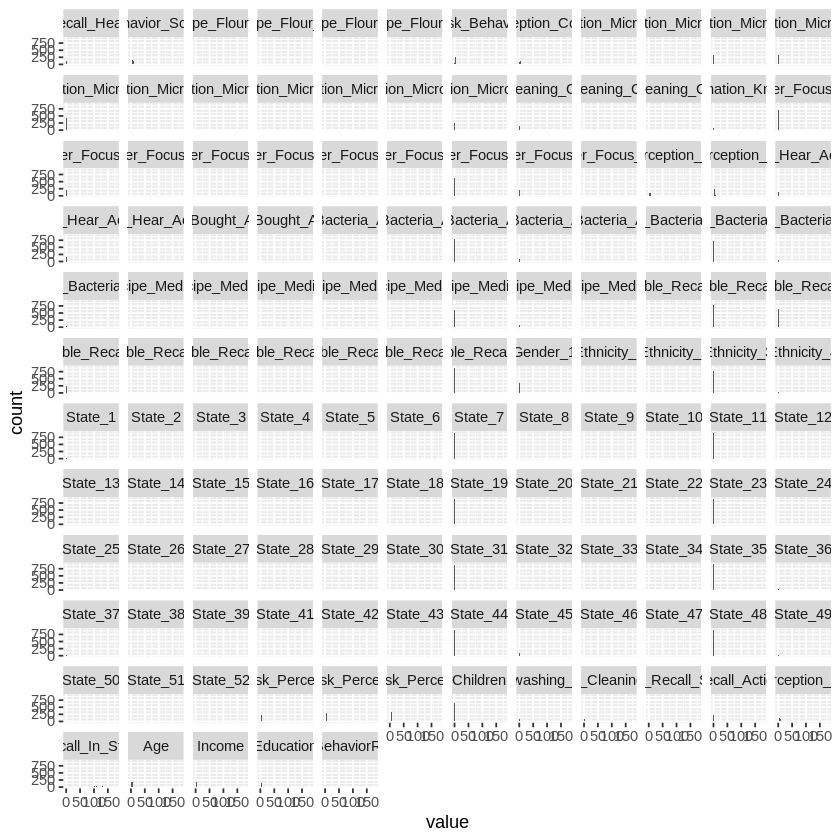

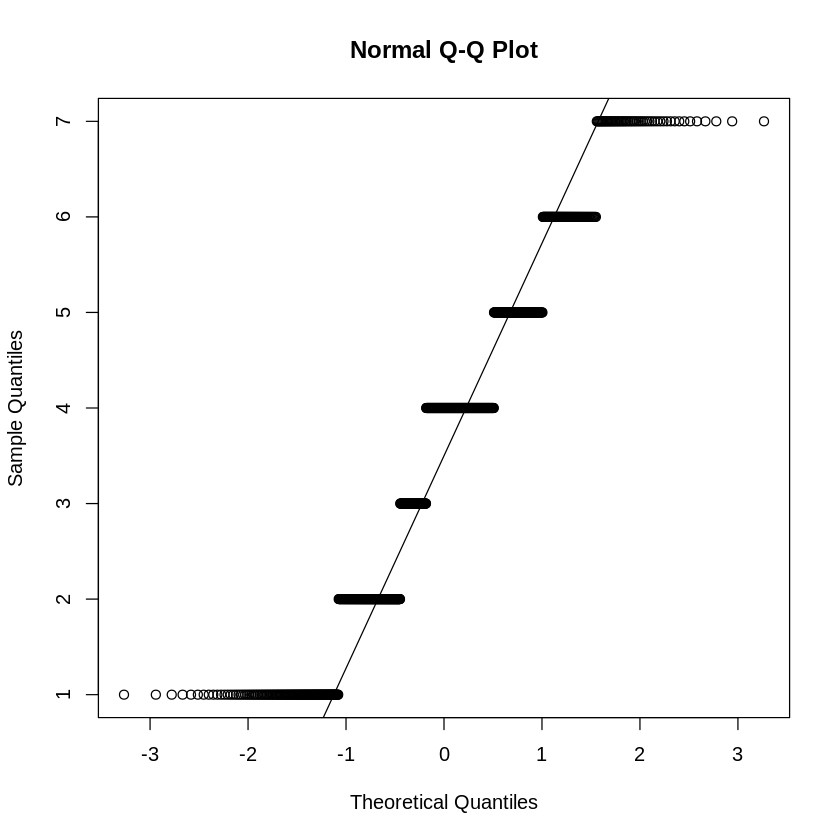

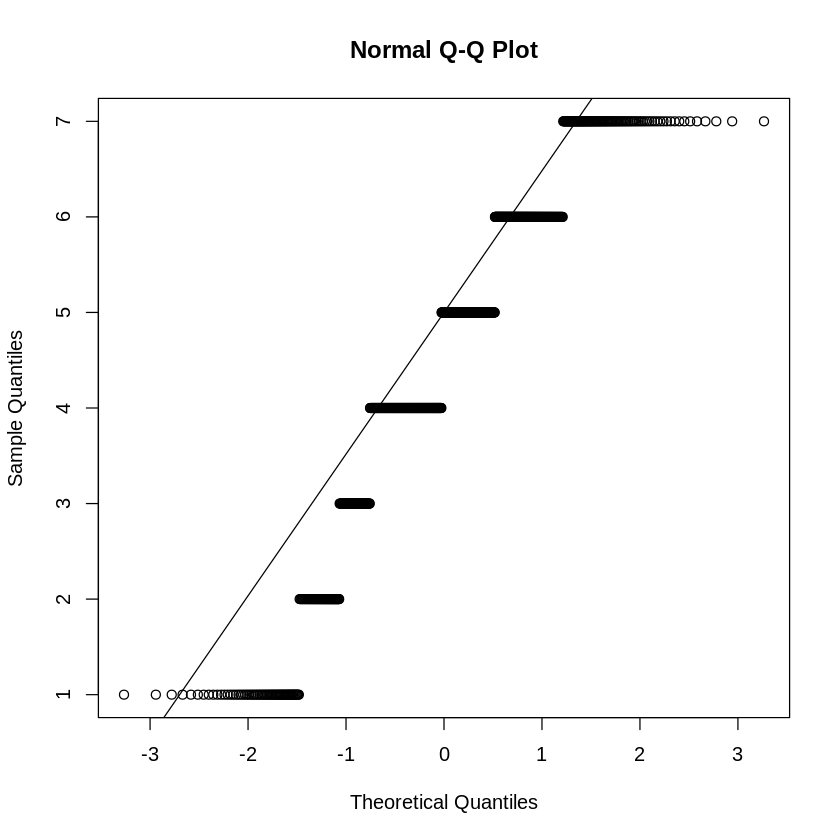

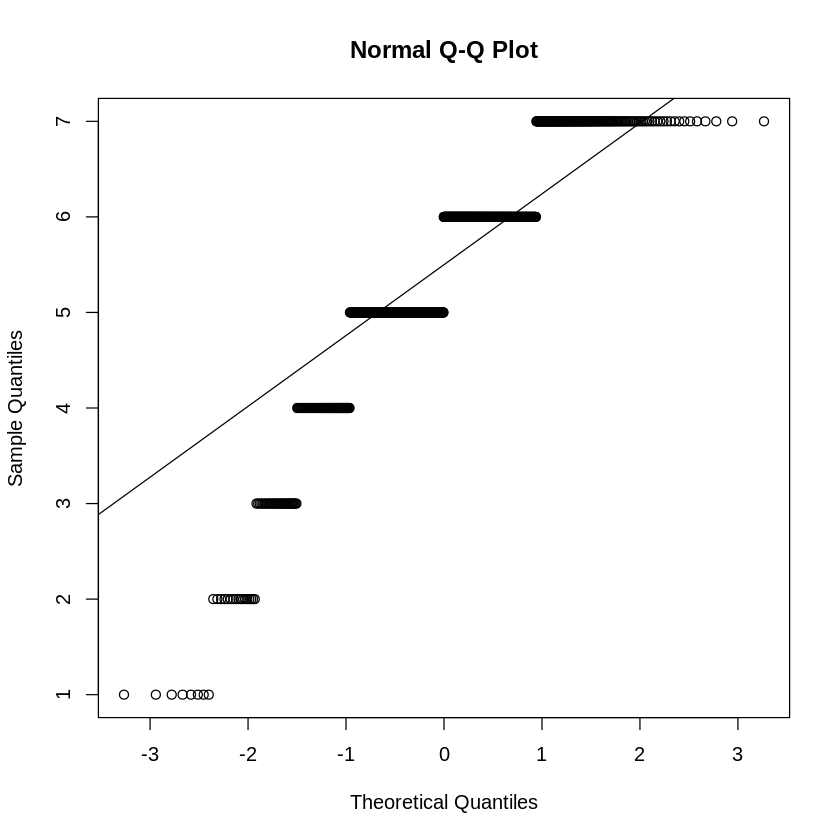

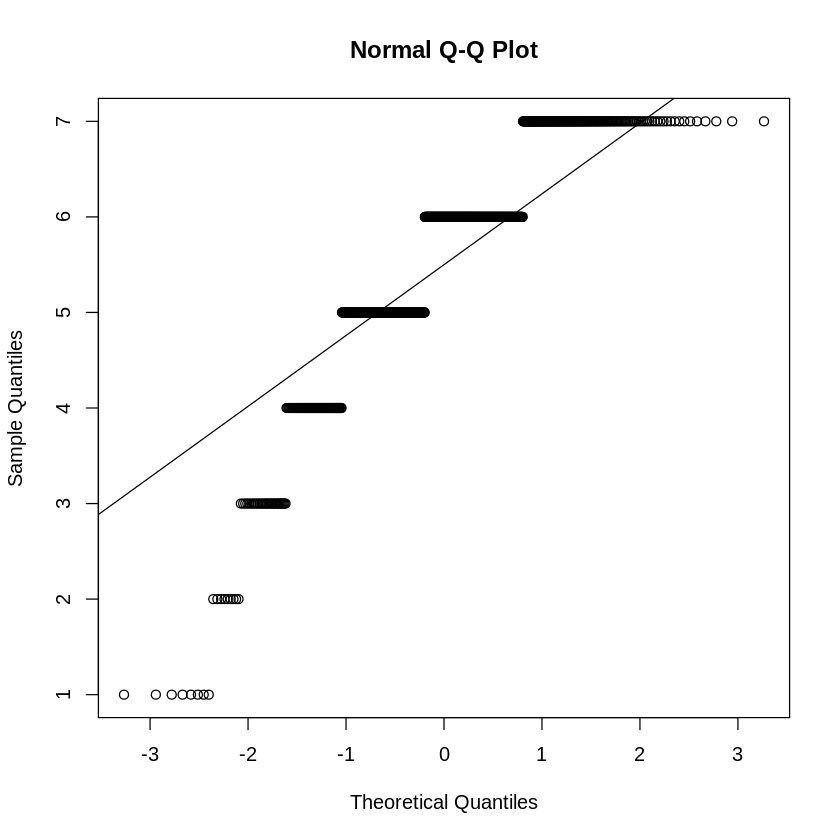

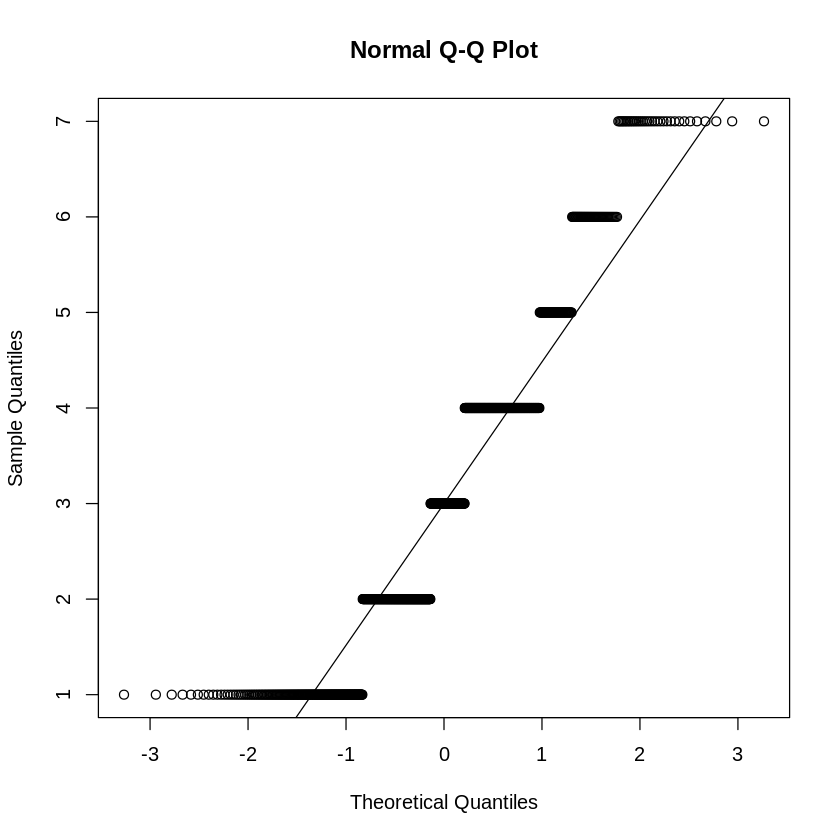

In [ ]:
#pairs(reg_data)
#There's an issue with the figure being too large, so the code is commented. This shouldn't change from previous investigation

reg_dataM <- melt(reg_data) # This is special code that turns the table into an indexable list of different variables. It's needed to restructure the data so it's compatible with some function calls coming up
hists <- ggplot(reg_dataM, aes(x=value)) + stat_count()+facet_wrap(~variable) #This is the first instance of GGplot. The first parameter is to declare what data or table should be used, the aes() is called the aesthetic function.
#The aesthetic function is used to declare what should be used in which axis, in this case x=value, so the values are on the x-axis. stat_count() tells the ggplot that we are mapping a bar plot with y-axis as the counts for the x-axis
#facet_wrap() is a function that tells the code to make multiple plots based on the specified value, in this case we used ~variable to tell it for each variable
hists # this will show the plots

#Risk Perception of Recalls are close to normal
qqnorm(reg_data$Risk_Perception_Recall_1)
qqline(reg_data$Risk_Perception_Recall_1)
#trimming the latter datapoints may help, but due to the nature of the ordinal variable, higher values and lower values COULD be possible.
#not normal and unlikely any transformation may help
qqnorm(reg_data$Self_Risk_Perception_1)
qqline(reg_data$Self_Risk_Perception_1)
#similar issue
qqnorm(reg_data$Self_Risk_Perception_2)
qqline(reg_data$Self_Risk_Perception_2)


#confident in this variable being considered normally distributed
qqnorm(reg_data$Self_Risk_Perception_3)
qqline(reg_data$Self_Risk_Perception_3)
#no optimal transformation
qqnorm(reg_data$Risk_Perception_Recall_2)
qqline(reg_data$Risk_Perception_Recall_2)


## Un-used data transformation

The data is not normal or linear in many variables. As such, I played around with options to solve the issue, one is to apply a box-cox transformation (look it up) . This approach is used to transform the data in a exponential transformation to make variables behave in a way that is approximately to normal. However, i do not use these calculated transformations in the variable as I decided it masks interpretability too much and is unnecessary.

The following is that exploration

In [ ]:
###This is not used, but kept for reference to reviewers

#no longer transforming data as it makes interpretation difficult
# #data can be transformed for better fit
# a<-reg_data$Self_Risk_Perception_2
# b<-a+1
# b<-log(b)
# c<-boxCox(lm(b~1), lambda = c(-5,5, by=0.5), optimize = TRUE)
# lambda = c$x[which.max(c$y)]
# lamba_self_risk_per_2 <- lambda
# #lambda = 3.38383838
# b<-(a^(lambda-1))/lambda
# qqnorm(b)
# qqline(b)

#data can be transformed for better fit
# a<-reg_data$Risk_Perception_Recall_2
# b<-a+1
# b<-log(b)
# c<-boxCox(lm(b~1), lambda = c(-5,5, by=0.5), optimize = TRUE)
# lambda = c$x[which.max(c$y)]
# lambda_risk_percep_recall_2 <- lambda
# #lambda is 1.060606060606
# b<-(a^(lambda-1))/lambda
# qqnorm(b)
# qqline(b)
#much better to normal


# qqnorm(reg_data$Behavior_Score)
# qqline(reg_data$Behavior_Score)
#boxcox transform may help
# a<-reg_data$Behavior_Score
# b<-log(a)
# c<-boxCox(lm(b~1), lambda=c(-5,5,by=0.5), optimize=TRUE)
# lambda = c$x[which.max(c$y)]
# #lambda = 3.1818181818
# b<-(a^(lambda-1))/lambda
# qqnorm(b)
# qqline(b)

#remember the lambda, so you can untransform when reading the predictions
#finalLambda = lambda

#implement the transformations
# reg_data$Self_Risk_Perception_2  <- (reg_data$Self_Risk_Perception_2^(2.3838383838))/3.3838383838
# reg_data$Risk_Perception_Recall_2  <- (reg_data$Risk_Perception_Recall_2^(0.060606060606))/1.060606060606
# reg_data$Behavior_Score <- (reg_data$Behavior_Score^(finalLambda-1))/finalLambda
#for the neural network, scaling from 0-1 is needed

# Feature Selection
Feature selection is the process of selecting "features" which are inputs, or independent variables in models. I call this variable selection in the manuscript. It's worth noting that a common theme is that one concept will have multiple names depending on the field, which is one challenge as there is no solid terms for our field. Just be aware if you learn that some concepts will have multiple names and even different nuances based on the discipline or philosophy of the approach.

Our approach is an exploratory predictive modeling approach. The goal is to go in with very little assumptions about what is being modeled. This may also give us the best approach to refine and create an accurate model. Though this is balanced with the fact that an accurate model isn't necessarily the most meaningful or informative model about the underlying mechanisms. However, a very accurate model with features supported as being important by other studies give reputability to the model as a whole and can inform about possibly new variables important to the behavior. THink of this as, shirt color might lead to accurate predictions about if it will rain through correlation, but humidity level from the previous day may have a more causaul relation or be involved in a complex interaction of a causal nature. Sometimes you can gain insight into other aspects of that complex interaction.

## Approach used
I used a simple statistical test based approach after weeding out variables for specific reasons.
1. Remove Variables used in calculations for other variables
2. Removed highly correlated variables
3. Removed variables with very low variability
4. Selected variables based off statistical tests

Removing variables involved in the calculaitons is important, as is removing other behavior related variables. Afterall, these variables can mask any meaningful interpretation beyond "These behaviors can predict other behaviors" which doesn't help when "these behaviors" are mysteries or unclear as to why on their own.

Removing highly correlated variables tend to have high colinearity effects and can sometimes bring execess or redundant informaiton into a model. Afterall if the model sees one of the variables being important, it will see the other as being important as well. This can also cause inaccuracies for values where it doesn't hold and even problems in interpretation. If a variable with high correlation to one of the other variables removed is important, we can already deduce that the removed variable is more or less as meaningful.

Issues this action addresses admittdly is not as important in the approaches we used, but in general it's good practice and may increase accuracy so it was done.

Removing variables with low variability (near-zero variance) is very important as well. In many cases with binary variables, they can be deemed important to a model since it can make a good seperator, but due to the nature of how the model works, this can be problematic as the minority class (least common value) is used as the basis for determinig if it's important or not. This is a small sample size. Additionally, these variables are almost constants anyways, which can give you another logical way of thinking if it is meaningful or not on it's own.

Selecting variables based off statistical tests is one common way to pick variables that are "informative". Informative variables have a meanginful relationship with the dependent variable. Afterall, if the two variables have a statsitical distinction i.e means are different statsitically between categories, or have some level of dependency, then it's likely able to be used to inform or predict values on the dependent variable.
I used a series of pair-wise wilcoxian tests (a form of a kruskal-wallis, which both are non-parametric median/ mean comparions)  to see if different categories of some the categorical or binary variables had different mens of the predicted behaviors. I.e if males had a different mean behavior score than females. For comparing continuous variables, i used the discrete values of the behavior score to see if the continuous variable's means were different among them.


**When using this as a template, adjustment is needed to ensure that the predicted variable being used is correct. Codes that need to be changed will be noted in the code**

## Remove Correlated variables, other behaviors, and low variance variables

In [ ]:
# Remove variables
reg_data <- subset(reg_data, select = -Risk_Perception_Recall_1)
reg_data <- subset(reg_data, select = -Self_Risk_Perception_3)
reg_data <- subset(reg_data, select = -Responsible_Recall_Risk_7)
#reg_data <- subset(reg_data, select = -Hear_Recall_Score) # Behavior
reg_data <- subset(reg_data, select = -Handwashing_Score) # Behavior
reg_data <- subset(reg_data, select = -Counter_Cleaning_Score) #Behavior
#reg_data <- subset(reg_data, select = -Recall_Action) # behavior
reg_data <- subset(reg_data, select = -Type_Cleaning_Counter2) #Behavior
reg_data <- subset(reg_data, select = -Recall_Bought_Action_2) #Behavior
reg_data <- subset(reg_data, select = -Recall_Hear_Action_4)#Behavior
reg_data <- subset(reg_data, select = -Risk_Behavior)#Behavior
reg_data <- subset(reg_data, select = -Risk_BehaviorRecode)#Behavior
reg_data <- subset(reg_data, select = -Type_Flour_4)#Behavior
reg_data <- subset(reg_data, select = -State_2) # This is removed due to 0 variance
reg_data <- subset(reg_data, select = -Behavior_Score)


#Create New Variable For Recall Behavior
reg_data <- reg_data %>% mutate(Recall_Behavior = Recall_Action+Hear_Recall_Score+2)

reg_data <- subset(reg_data, select = -Hear_Recall_Score) # Behavior
reg_data <- subset(reg_data, select = -Recall_Action) # behavior

## Statistical Tests

The two tests used are again, chi-sqaured tests with binary data.


### the %>% Operator

The %>% is known as the pipe operator. It is associated with a set of packages from the tidyverse packages. You can best think of this being read as  "And then". You do the first action on the left,
"and then" take that as the input for what is being done on the right side. This can grammatically save time, but is also necessary for several commands. This will be used along with %in%, which means to apply the right side to the left list of values

### Indexing lists and tables

To index values from a list or table, there are several different methods. By default, you can use array notion of [Row,Column] You use numbers which refer to the index for each. So to select the third row and third column from a table you use  [3,3]. To select the whole set of rows or columns, you use [,C] or [R,] for row or column. The blank space means all values. However, what's worth noting is the data type returned. This will return a data frame, which some functions do not take. Instead [[ , ]] is used. This will return the output as a vector of values. Keep in mind, there exists a data type such as lists, which are also used in this following section. These are single dimension containers of data and are only indexed via [[ ]] or [  ]

In [ ]:

#however, first due to large variable space, feature selection is necessary. An filter approach of Chi-sqaure and ANOVA on the features will identify variables dependnent with the output
binary_data_1 <-(reg_data%>%select_if(~all(. %in% 0:1))) #This line of code looks through the dataset and finds binary variables, and assigns them to a table as binary_data_1\

#Exploring the operators. You first take the reg_data table, and then, you select from it IF all values from a variables are IN the range of 0 to 1. 0:1 indicates a range.
# The ~ represents a formula set, formula is a different syntax where you can refer to variable columns by just their name. The '.' has a special meaning in a formual context as a short hand
#for ALL variables
#The all(), means you are inlcuding all the results from within the function.
#This is a complex set of logic and function that would take several loops done in a single line, this is the true power of dplyr


binary_data_1 <- as.matrix(binary_data_1)
binary_data_1 <- as.table(binary_data_1) #this converts the dataframe into a table, required to call CrossTable
colNum <-  ncol(binary_data_1) #Need to set up for loop
tables <- list()

for(col in 1:colNum){
  intermediate <- CrossTable(reg_data$Recall_Behavior, binary_data_1[,col], chisq = TRUE)
  tables <- append(tables,list(intermediate),col)
}
#Tables are cross tabs with each table being compared to the heard recall outcome and chi-sqaured for independence test.
#Take all indices that are statistically significant
colNum <- length(tables)
count <- 1
indexs <- list()
for(col in 1:colNum){
  if(tables[[col]]$chisq$p.value <= 0.05){
    indexs<- append(indexs, col, count)
    count <- count+1
  }
}

binary_data_1 <-(reg_data%>%select_if(~all(. %in% 0:1))) #This line is very important. Some reason, converting the binaray_data_1 as a table back to a data frame will convert to a 2 column form wiht the variable as a factor
newData.1 <- binary_data_1[, as.numeric(indexs) ] #Select the binary variables that were statistically significant. This calls all variables from binary_data_1 whose column indices matches those from the list
newData.1 <- sapply(newData.1, as.logical) #This converts these binary variables to logical ones, this is to protect the data types and prevent mishanlding,

#now anova on the ordinal or continuous variables
contin_Vars <- (reg_data%>%select_if(~!all(. %in% 0:1))) # This selects the inverse of the binary variables, which in this case are continuous as previously all categorical data was encoded as binary variables
#Note the ! in ~!all . This will return the reverse of the function. Effectively ~all(. %in% 0:1) reuturns an array of true or false values associated with each index of the variable. The ! will invert true
#and false. Then the select_if will select the trues after that inversion


#This section shows a table of the means by the behavior_score values
reg_data %>%
select_if(~!all(. %in% 0:1)) %>%
dplyr::group_by(Recall_Behavior) %>%  #This function group_by will group values together based on a variable value specified. Also note the dplyr:: , this is a way to make sure you directly select a package
dplyr::summarise(across(everything(), list(mean)))  #summarise will output a table with the group-by in place, however you need to specify what is shown. IN this case across all variable (across everything)
# You will create a list of means that will then be displayed. Everything() is known as a void function, it takes no direct input as a parameter (or only uses default)
#, but will implicitly act in it's context to make a change

#The output shows the means for each continuous variables within each behavior score value

colNum <- ncol(contin_Vars) - 1
count <- 1
indexs_2 <- list()

for(col in 1:(colNum)){
intermediate <- kruskal.test(contin_Vars[,col+1]~ Recall_Behavior, data = contin_Vars) # note the ~ , kruskal.test by default uses a formula for it's input, the ~ is used in the formula context to denote
    #where the dependent and independent variables begin. In this case, a model is built for the continuious variable with behavior score as the independent.

    print(intermediate)
  if(intermediate$p.value <= 0.051){    #0.051 because of possible inaccuracies with P-value estimates and rounding errors
   indexs_2<- append(indexs_2, col+1, count) #add significant variables to the model
   count <- count+1
  }
}

newData.2 <- contin_Vars[,as.numeric(indexs_2)] #This will select the coninuous variable
newData <- cbind(as.data.frame(newData.1), newData.2) #Create the new data0set


Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         7 |         3 |        10 | 
                         |     0.270 |     1.551 |           | 
                         |     0.700 |     0.300 |     0.011 | 
                         |     0.009 |     0.022 |           | 
                         |     0.008 |     0.003 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        11 |         5 |        16 | 
                         |     0.506 |     2.908 |           | 
                         |     0.688 |     0.312 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         1 |         9 |        10 | 
                         |     0.004 |     0.001 |           | 
                         |     0.100 |     0.900 |     0.011 | 
                         |     0.010 |     0.011 |           | 
                         |     0.001 |     0.010 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         1 |        15 |        16 | 
                         |     0.295 |     0.035 |           | 
                         |     0.062 |     0.938 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         4 |         6 |        10 | 
                         |     1.436 |     3.727 |           | 
                         |     0.400 |     0.600 |     0.011 | 
                         |     0.006 |     0.024 |           | 
                         |     0.004 |     0.007 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         6 |        10 |        16 | 
                         |     2.667 |     6.925 |           | 
                         |     0.375 |     0.625 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         7 |         3 |        10 | 
                         |     0.095 |     0.348 |           | 
                         |     0.700 |     0.300 |     0.011 | 
                         |     0.010 |     0.015 |           | 
                         |     0.008 |     0.003 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        10 |         6 |        16 | 
                         |     0.529 |     1.947 |           | 
                         |     0.625 |     0.375 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         4 |         6 |        10 | 
                         |     3.207 |     0.647 |           | 
                         |     0.400 |     0.600 |     0.011 | 
                         |     0.026 |     0.008 |           | 
                         |     0.004 |     0.007 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         8 |         8 |        16 | 
                         |    10.505 |     2.120 |           | 
                         |     0.500 |     0.500 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     0.532 |     0.428 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.015 |     0.008 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        11 |         5 |        16 | 
                         |     2.092 |     1.684 |           | 
                         |     0.688 |     0.312 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         5 |         5 |        10 | 
                         |     0.665 |     0.355 |           | 
                         |     0.500 |     0.500 |     0.011 | 
                         |     0.016 |     0.008 |           | 
                         |     0.005 |     0.005 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         7 |         9 |        16 | 
                         |     0.369 |     0.197 |           | 
                         |     0.438 |     0.562 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.358 |     0.658 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.013 |     0.006 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     1.275 |     2.346 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     0.122 |     0.133 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.013 |     0.009 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        11 |         5 |        16 | 
                         |     0.861 |     0.934 |           | 
                         |     0.688 |     0.312 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.003 |     0.012 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.011 |     0.010 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     0.169 |     0.613 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         3 |         7 |        10 | 
                         |     0.841 |     0.182 |           | 
                         |     0.300 |     0.700 |     0.011 | 
                         |     0.018 |     0.009 |           | 
                         |     0.003 |     0.008 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         8 |         8 |        16 | 
                         |     9.347 |     2.021 |           | 
                         |     0.500 |     0.500 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         4 |         6 |        10 | 
                         |     3.820 |     0.706 |           | 
                         |     0.400 |     0.600 |     0.011 | 
                         |     0.028 |     0.008 |           | 
                         |     0.004 |     0.007 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         9 |         7 |        16 | 
                         |    16.959 |     3.133 |           | 
                         |     0.562 |     0.438 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.485 |     1.974 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.014 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.363 |     1.475 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.313 |     0.925 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.013 |     0.004 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     0.351 |     1.036 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         4 |         6 |        10 | 
                         |     0.546 |     0.209 |           | 
                         |     0.400 |     0.600 |     0.011 | 
                         |     0.016 |     0.009 |           | 
                         |     0.004 |     0.007 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         8 |         8 |        16 | 
                         |     2.873 |     1.101 |           | 
                         |     0.500 |     0.500 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         7 |         3 |        10 | 
                         |     0.253 |     1.391 |           | 
                         |     0.700 |     0.300 |     0.011 | 
                         |     0.009 |     0.021 |           | 
                         |     0.008 |     0.003 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        12 |         4 |        16 | 
                         |     0.175 |     0.964 |           | 
                         |     0.750 |     0.250 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.002 |     0.142 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.038 |     2.635 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         4 |         6 |        10 | 
                         |     0.975 |     0.317 |           | 
                         |     0.400 |     0.600 |     0.011 | 
                         |     0.018 |     0.009 |           | 
                         |     0.004 |     0.007 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         5 |        11 |        16 | 
                         |     0.294 |     0.096 |           | 
                         |     0.312 |     0.688 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.228 |     0.753 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.013 |     0.005 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        12 |         4 |        16 | 
                         |     0.007 |     0.022 |           | 
                         |     0.750 |     0.250 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         7 |         3 |        10 | 
                         |     0.150 |     0.641 |           | 
                         |     0.700 |     0.300 |     0.011 | 
                         |     0.009 |     0.017 |           | 
                         |     0.008 |     0.003 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        10 |         6 |        16 | 
                         |     0.678 |     2.894 |           | 
                         |     0.625 |     0.375 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.015 |     0.230 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.018 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     0.067 |     1.016 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     2.462 |     1.156 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.020 |     0.006 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         7 |         9 |        16 | 
                         |     0.697 |     0.327 |           | 
                         |     0.438 |     0.562 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.280 |     0.861 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.013 |     0.004 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.071 |     0.218 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     0.070 |     0.141 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.010 |     0.013 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.496 |     1.001 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.758 |     1.567 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.015 |     0.003 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.456 |     0.942 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.171 |     0.622 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.013 |     0.005 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        12 |         4 |        16 | 
                         |     0.024 |     0.086 |           | 
                         |     0.750 |     0.250 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.100 |     0.252 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.012 |     0.008 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     0.570 |     1.432 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.019 |     0.118 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.011 |     0.008 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        10 |         6 |        16 | 
                         |     1.022 |     6.245 |           | 
                         |     0.625 |     0.375 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.718 |     2.345 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.014 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.046 |     0.150 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.008 |     0.273 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     0.157 |     5.606 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         7 |         3 |        10 | 
                         |     0.129 |     0.519 |           | 
                         |     0.700 |     0.300 |     0.011 | 
                         |     0.010 |     0.016 |           | 
                         |     0.008 |     0.003 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.002 |     0.010 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     0.207 |     0.206 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.013 |     0.009 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         6 |        10 |        16 | 
                         |     0.489 |     0.485 |           | 
                         |     0.375 |     0.625 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.041 |     0.250 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.010 |     0.016 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.114 |     0.695 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.112 |     1.003 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.012 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.025 |     0.228 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.018 |     0.287 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.019 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.000 |     0.004 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         3 |         7 |        10 | 
                         |     0.003 |     0.001 |           | 
                         |     0.300 |     0.700 |     0.011 | 
                         |     0.011 |     0.011 |           | 
                         |     0.003 |     0.008 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         8 |         8 |        16 | 
                         |     1.871 |     0.839 |           | 
                         |     0.500 |     0.500 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.001 |     0.004 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.011 |     0.010 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         9 |         7 |        16 | 
                         |     1.053 |     3.977 |           | 
                         |     0.562 |     0.438 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.043 |     0.632 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.012 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.000 |     0.000 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.041 |     1.068 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.029 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.023 |     0.593 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     1.722 |     0.941 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.019 |     0.007 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         7 |         9 |        16 | 
                         |     0.321 |     0.175 |           | 
                         |     0.438 |     0.562 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     0.023 |     0.030 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.012 |     0.010 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         7 |         9 |        16 | 
                         |     0.453 |     0.585 |           | 
                         |     0.438 |     0.562 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     0.541 |     2.292 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.008 |     0.023 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        11 |         5 |        16 | 
                         |     0.293 |     1.241 |           | 
                         |     0.688 |     0.312 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         7 |         3 |        10 | 
                         |     0.003 |     0.006 |           | 
                         |     0.700 |     0.300 |     0.011 | 
                         |     0.011 |     0.010 |           | 
                         |     0.008 |     0.003 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        11 |         5 |        16 | 
                         |     0.000 |     0.000 |           | 
                         |     0.688 |     0.312 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         5 |         5 |        10 | 
                         |     0.017 |     0.019 |           | 
                         |     0.500 |     0.500 |     0.011 | 
                         |     0.010 |     0.012 |           | 
                         |     0.005 |     0.005 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        12 |         4 |        16 | 
                         |     1.461 |     1.648 |           | 
                         |     0.750 |     0.250 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.288 |     0.564 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.013 |     0.006 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         8 |         8 |        16 | 
                         |     0.634 |     1.241 |           | 
                         |     0.500 |     0.500 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.097 |     0.938 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.012 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     0.017 |     0.166 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.014 |     0.214 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.017 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.264 |     3.905 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     0.119 |     0.129 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.013 |     0.009 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        11 |         5 |        16 | 
                         |     0.848 |     0.924 |           | 
                         |     0.688 |     0.312 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.047 |     0.298 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.010 |     0.016 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.049 |     0.308 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         5 |         5 |        10 | 
                         |     1.498 |     0.615 |           | 
                         |     0.500 |     0.500 |     0.011 | 
                         |     0.019 |     0.008 |           | 
                         |     0.005 |     0.005 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         8 |         8 |        16 | 
                         |     2.396 |     0.984 |           | 
                         |     0.500 |     0.500 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         6 |         4 |        10 | 
                         |     0.274 |     0.791 |           | 
                         |     0.600 |     0.400 |     0.011 | 
                         |     0.009 |     0.017 |           | 
                         |     0.007 |     0.004 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        12 |         4 |        16 | 
                         |     0.001 |     0.003 |           | 
                         |     0.750 |     0.250 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.024 |     0.480 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.327 |     6.491 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         7 |         3 |        10 | 
                         |     0.333 |     2.233 |           | 
                         |     0.700 |     0.300 |     0.011 | 
                         |     0.009 |     0.025 |           | 
                         |     0.008 |     0.003 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.061 |     0.411 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.051 |     0.687 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.012 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     0.054 |     0.738 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.444 |     1.897 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.013 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.000 |     0.000 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.224 |     3.881 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.009 |     0.040 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.299 |     5.189 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         4 |         6 |        10 | 
                         |     0.796 |     1.314 |           | 
                         |     0.400 |     0.600 |     0.011 | 
                         |     0.007 |     0.017 |           | 
                         |     0.004 |     0.007 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         7 |         9 |        16 | 
                         |     0.881 |     1.454 |           | 
                         |     0.438 |     0.562 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         4 |         6 |        10 | 
                         |     0.020 |     0.012 |           | 
                         |     0.400 |     0.600 |     0.011 | 
                         |     0.012 |     0.010 |           | 
                         |     0.004 |     0.007 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |         8 |         8 |        16 | 
                         |     0.692 |     0.412 |           | 
                         |     0.500 |     0.500 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.004 |     0.020 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.011 |     0.012 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        13 |         3 |        16 | 
                         |     0.001 |     0.004 |           | 
                         |     0.812 |     0.188 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.041 |     0.250 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.010 |     0.016 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        12 |         4 |        16 | 
                         |     0.223 |     1.359 |           | 
                         |     0.750 |     0.250 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.028 |     0.513 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.002 |     0.039 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.004 |     0.185 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.006 |     0.297 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.006 |     0.240 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.009 |     0.384 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.065 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.001 |     0.105 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.000 |     0.000 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.011 |     0.011 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     0.011 |     0.097 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.002 |     0.142 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.003 |     0.227 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.002 |     0.142 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.003 |     0.227 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.011 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.017 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.011 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.017 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.086 |     0.883 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.012 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        12 |         4 |        16 | 
                         |     0.459 |     4.734 |           | 
                         |     0.750 |     0.250 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.006 |     0.251 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.010 |     0.401 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.033 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.052 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.033 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.052 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.018 |     0.414 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.007 |     0.171 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.005 |     0.229 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.009 |     0.366 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.001 |     0.109 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.002 |     0.174 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.080 |     7.279 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.100 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.002 |     0.174 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.003 |     0.164 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.004 |     0.262 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.001 |     0.098 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.002 |     0.157 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.001 |     0.076 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.001 |     0.122 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.064 |     3.034 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.053 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.007 |     0.332 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.002 |     0.153 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.004 |     0.244 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.286 |     8.170 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.009 |     0.065 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        14 |         2 |        16 | 
                         |     0.138 |     3.936 |           | 
                         |     0.875 |     0.125 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.001 |     0.120 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.002 |     0.192 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.044 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.070 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.004 |     0.207 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.029 |     1.348 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.022 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.035 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.033 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.052 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.077 |     5.773 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.083 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.040 |     2.985 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.055 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.087 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.045 |     1.296 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.032 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.019 |     0.541 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.001 |     0.109 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.002 |     0.174 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.035 |     0.578 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.012 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.000 |     0.006 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.010 |     0.316 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.016 |     0.482 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.096 |    43.872 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.500 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.035 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.021 |     0.447 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.005 |     0.113 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.001 |     0.087 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.001 |     0.140 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.002 |     0.131 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.003 |     0.209 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.034 |     0.777 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.026 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.007 |     0.150 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.044 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.070 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.002 |     0.153 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        15 |         1 |        16 | 
                         |     0.036 |     2.338 |           | 
                         |     0.938 |     0.062 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.011 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.017 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.004 |     0.207 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.007 |     0.332 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.088 |     0.894 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.012 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.141 |     1.431 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.001 |     0.076 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.001 |     0.122 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.011 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.017 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.006 |     0.240 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.009 |     0.384 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.005 |     0.218 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.008 |     0.349 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |        10 |         0 |        10 | 
                         |     0.000 |     0.055 |           | 
                         |     1.000 |     0.000 |     0.011 | 
                         |     0.011 |     0.000 |           | 
                         |     0.011 |     0.000 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.000 |     0.087 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.077 |     5.773 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.083 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.003 |     0.209 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         9 |         1 |        10 | 
                         |     0.077 |     5.773 |           | 
                         |     0.900 |     0.100 |     0.011 | 
                         |     0.010 |     0.083 |           | 
                         |     0.010 |     0.001 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        16 |         0 |        16 | 
                         |     0.003 |     0.209 |           | 
                         |     1.000 |     0.000 |     0

Warning message in chisq.test(t, correct = FALSE, ...):
“Chi-squared approximation may be incorrect”



 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  917 

 
                         | binary_data_1[, col] 
reg_data$Recall_Behavior |         0 |         1 | Row Total | 
-------------------------|-----------|-----------|-----------|
                       0 |         8 |         2 |        10 | 
                         |     0.082 |     0.214 |           | 
                         |     0.800 |     0.200 |     0.011 | 
                         |     0.012 |     0.008 |           | 
                         |     0.009 |     0.002 |           | 
-------------------------|-----------|-----------|-----------|
                       1 |        11 |         5 |        16 | 
                         |     0.028 |     0.073 |           | 
                         |     0.688 |     0.312 |     0

Recall_Behavior Risk_Perception_Consumption_1 Contamination_Knowledge_1
1 0               3.500000                      2.000000                 
2 1               3.437500                      1.562500                 
3 2               3.026316                      1.921053                 
4 3               2.724907                      2.040892                 
5 4               2.565854                      2.073171                 
6 5               2.830882                      2.264706                 
  Risk_Perception_Recall_2_1 Self_Risk_Perception_1_1 Self_Risk_Perception_2_1
1 4.200000                   5.600000                 5.700000                
2 3.812500                   4.562500                 5.437500                
3 3.789474                   4.894737                 5.250000                
4 3.152416                   4.542751                 5.427509                
5 2.904878                   4.421951                 5.400000                
6 2.816176                   4.257353                 5.433824                
  Risk_Perception_Microbes_1 Recall_In_State_1 Age_1    Income_1 Education_1
1 4.300000                   115.7000          2.600000 2.900000 3.000000   
2 3.562500                   120.1250          2.437500 3.312500 2.875000   
3 4.605263                   110.9342          3.065789 3.328947 2.763158   
4 5.501859                   109.5167          3.710037 3.468401 2.654275   
5 6.270732                   108.5000          3.824390 3.407317 2.619512   
6 6.860294                   106.2941          3.352941 3.213235 2.588235


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Recall_Behavior
Kruskal-Wallis chi-squared = 8.6854, df = 5, p-value = 0.1223


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Recall_Behavior
Kruskal-Wallis chi-squared = 24.596, df = 5, p-value = 0.0001667


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Recall_Behavior
Kruskal-Wallis chi-squared = 12.561, df = 5, p-value = 0.02786


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Recall_Behavior
Kruskal-Wallis chi-squared = 4.6194, df = 5, p-value = 0.4641


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Recall_Behavior
Kruskal-Wallis chi-squared = 53.202, df = 5, p-value = 3.057e-10


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Recall_Behavior
Kruskal-Wallis chi-squared = 3.5324, df = 5, p-value = 0.6185


	Kruskal-Wallis rank sum test

data:  contin_Vars[, col + 1] by Recall_Behavior
Kruskal-Wallis chi-squared = 31.458, df = 5, p-v

## Re-add Recalls In State and Predicted Variables

Some cases, the number of recalls in the state where the consumer lives is removed from the models in this process. As it is part of our investgation, it should be readded.


In [ ]:
if(!any(colnames(newData) %>% str_detect("Recall_In_State"))){ #This code checks for if recall in stat exists as a variable for the data going to be used. If not (the !), then add it
newData <- cbind(newData, reg_data$Recall_In_State) # Add the variable
newData.2 <- cbind(newData.2,reg_data$Recall_In_State )
names(newData)[length(names(newData))] <- "Recall_In_State"
names(newData.2)[length(names(newData.2))] <- "Recall_In_State" # Rename it since by default it uses a different name
}

### Change this section to add the predicted variable again
newData <- cbind(newData, reg_data$Recall_Behavior) #make sure to change behavior score to the new predicted variable here and the next row
names(newData)[length(names(newData))] <- "Recall_Behavior"



# Data Transformation and Preparation
Data transformation, also known as data manipulation to some schools of data analysts, is the process of modifying and changing varaibles to meet your needs of analysis. I did the following

1. Rescale values to 0-1.

Other stuides may do more like normalizing, which is to make the values Z-score values and unitless. I did not as i feel this is too manipulative of the data.
Re-ranging the data can lead to more accurate models and can prevent different orders of magnitudes from affecting the variables or model.



I start by checking the ranges of the values in independent variables, then i do math to adjust their values

**When changing be sure to comment and uncomment or add stuff as needed. Make sure to re-range the predicted variable**



# Range of Continuous Variables

In [ ]:
t(sapply(newData.2,range)) #This is code to apply a function called range(), which returns the range of values for a variable, to all variables in newData.2, continuous variables in our model

[,1] [,2]
Risk_Perception_Recall_2 1      7 
Self_Risk_Perception_1   1      7 
Risk_Perception_Microbes 0     11 
Age                      1      6 
Recall_Behavior          0      5 
Recall_In_State          0    180

# New Dataset and Re-range the data

In [ ]:

#Scale the data for neural network
nNet_data <- newData #Create a new set of data for transforming the range

### Comment and uncommment as needed, check the ranges


nNet_data$Self_Risk_Perception_1 <- (nNet_data$Self_Risk_Perception_1-1)/6
#nNet_data$Self_Risk_Perception_2 <- (nNet_data$Self_Risk_Perception_2-1)/6
nNet_data$Risk_Perception_Recall_2 <- (nNet_data$Risk_Perception_Recall_2-1)/6
#nNet_data$Contamination_Knowledge <- nNet_data$Contamination_Knowledge/3
nNet_data$Risk_Perception_Microbes <- (nNet_data$Risk_Perception_Microbes)/11
#nNet_data$Recall_Action <- (nNet_data$Recall_Action+1) /3
#nNet_data$Counter_Cleaning_Score <- nNet_data$Counter_Cleaning_Score/2
#nNet_data$Hear_Recall_Score <- (nNet_data$Hear_Recall_Score+1)/2
#nNet_data$Risk_Behavior <- nNet_data$Risk_Behavior/4
#nNet_data$Risk_Perception_Consumption <- nNet_data$Risk_Perception_Consumption/7
#nNet_data$Handwashing_Score <- nNet_data$Handwashing_Score/2
nNet_data$Recall_In_State <- nNet_data$Recall_In_State/180
nNet_data$Age <- (nNet_data$Age-1)/5

#Ensure the predicted variable is scaled
#nNet_data$Behavior_Score <- (nNet_data$Behavior_Score)/(12)
nNet_data$Recall_Behavior <-nNet_data$Recall_Behavior/5



# Begin Modeling




The code section is divided into the following sections

1. Initalize Variables
2. Begin Loop
3. Create Partition
4. Create Model
5. Extract important values
6. End Loop

I create a bunch of variables, many of which are lists, as these will be used in the section. Of note is the small list of *seed*. This contains the seeds used for the final models so it can be repeated. Seeds are numbers that define the starting point for random number generations. By defining a seed, things that are done "at random" can be done "at random" the same way each time.

**There are sections of codes that need to be commented and uncommented to swap between final models and model optimizations**

I create a loop through these seeds for the final models. There is alternative code in comments. This one will loop through a long list of seeds sequentially. This is how we optimize the model. Time should be spent optimizing the models. You can run the model in the background for 24 hours at least. Do make sure to check in on the program, as depending on Ram, it can crash. Not sure about how it performs on Kaggle, but at minimum you'd have the model loop thorugh iterations for 24 hours. Though ideally it would be 72 hours just so it can find the highest performing models.Additionally, you'll need to input values for the RMSE and Seeds that are made up or fake to initalize things. THis way the algorithim can function. (i.e RMSEs <- c(1000,10000,20000,100000, 200000) and seeds <- c(1,2,3,4,5))

The data paritioning is done as a 70/30 split, with 30% of the data being set aside to validate the model. This is the predictive philosophy for modeling. There is a few hundread data points that the model has never seen (i.e not used to build or train the model), and they will be plugged into the model to make the predictions which are compared. This split is done at random to prevent bias, but this means different models can be built from the same set of data.

Additionally, a cross validation is created. This will be explained later

The next step is creating the models. In the case of the new models, they will be continuous predicted/dependent variables. This means that we will only have two types of models, Random Forest Regression, and Neural Networks. I will not go into depth on these, if you want to learn more, look up CART Random Forest Regression, and Monolayer Perceptron/Neural Network. What's important to know is both involve randomness which is why differnt seeds are important.

I use CaretList, which creates multiple models at once, and then combine with CaretEnsemble which uses a CaretList as inputs to build a new model, by default it is a linear regression, which is a weighed mean (take some time to think about it). Each model's output is assigned a coefficent (or weight), which are both then added together. You can ignore the division by two as it can be split between the weights.

One of the other things involved is the cross-fold validation. This process involves splitting the training data even further. It randomly created N-partions that you specify, in this case 10. The models are built N times, each time, one of these partitions are left out and the models are evaluated, such that it goes through and builds the model such that there is one version with each partition being left out. The resulting models are averaged together to create a single result. This of course also involves more randomness.

After the models are built, calculaitons are done to enable predictions and performance measures with the testing data set. Also other model accuracy related values such as RMSE (Root Mean Squared Error) and R^2 are extracted. Additionally, the top important variables for each model are extracted. Lastly, values for the PDPs are calculated and extracted for later. However, this section needs to be changed for the final models after you have identified the top predicting variables.

Then we end the loop and repeat. There is another section for model optimization. It looks at the existing RMSEs and compares it to the model's RMSE to see if it is lower than any existing models. If it is, it'll assign it to where it fits in the order from lowest to highest.

**To use the template, the steps should be**
1. **Optimize the models**
2. **Collect and extract the top important features from the optimized models by running the model in the final model form and the feature extraction section**
3. **Update the PDP code in the Create Model Section and PDP section**
4. **Run the final model, feature importance, and PDP section**



# The first block of code is for optimizing. This should be ran and cut after 72 hours

In [ ]:
count <- 1
RSQSD<-list()
RSQU <-list()
nNet_Errors <- list()
rf_Errors <- list()
azs <- list()
bzs <- list()
czs <- list()
cforest <- list()
network <- list()
logregression <- list()
ensemble <- list()
importances <- list()
model_ensembles <- list()
Names_list <- list()
Names_list_overall <- list()
Names_list_cforest <- list()
Names_list_nNet <- list()
Importance_overall <- list()
Importance_cforest <- list()
Importance_nNet <- list()
PredictedValues <- list()

#Initalize the variables
#seeds <-c(29, 1014, 978, 978, 800)
#rmses <-c(0.1691902, 0.1699963, 0.1701799, 0.1702469, 0.1703020)

seeds <-c(484, 2961, 2351, 2965, 3050)
rmses <-c(0.101, 0.103, 0.103, 0.103, 0.103)

num <-1 #initalize the varaible, for the inital seed for variable seperation
### Important decision, the training and testing seperation is not actually used for predicting the performance... Instead the CV's Rmse is used. Should i drop this parition. Or use it as a testing, training and validation
#https://machinelearningmastery.com/difference-test-validation-datasets/ This is one to get an idea. I suggest calculating an RMSE using the split. But this split is done before.
#https://towardsdatascience.com/how-to-use-random-seeds-effectively-54a4cd855a79#:~:text=Model%20accuracy%20varies%20depending%20on,are%20large%20enough%20to%20matter.
# Keep the RMSE selection based on the C-fold validation, but add an RMSE

  seed_value <- num
  set.seed(seed_value) #This is used to set the random number generator's seed
  #partition data at random, creating a testing and training
  inTrainingNnet <- createDataPartition(nNet_data$Recall_Behavior, p =0.7, list=FALSE) # Update Behavior_Score to new predicted variable
  #inTrainingNnet is a column variable of indexes. Meaning it can be used to subset the data for training and testing as below
  trainingnNet <- nNet_data[ inTrainingNnet,]
  testingnNet <- nNet_data[-inTrainingNnet,]



  for(num in 3947:5000){ #Begin a loop where it will iterate through different seeds for the model
    seed_value <- num
  set.seed(seed_value) #This is used to set the random number generator's seed

  #setup the 10 fold cross validation control
  crossFold  <- trainControl(method = "cv", number = 10 , savePredictions =  "final")
  models <- caretList(Recall_Behavior~., data=trainingnNet, trControl = crossFold ,   methodList = c("cforest" , "nnet" ), metric = "RMSE"  ) # Update Behavior_Score to new predicted variable
  #This creates the models for cforest and nnet

  #build the models
 #preds <- as.data.frame(predict(models, newdata = testingnNet)) #This will redurn a
 #pred <- predict(models, newdata = testingnNet)

  model_ensemble <- caretEnsemble(models, metric = "RMSE", trControl = crossFold) #This creates the ensmble for the final prediction.
  model_ensembles[[count]] <- model_ensemble #add it to the list of models

  importan <- varImp(model_ensemble) #This returns what is important for the models, this is a list of the cforest and nnet
  model_preds <- lapply(models, predict, newdata=testingnNet ) #This returns a list of predictions for each of the models (cforest and nnet)

  model_preds <- data.frame(model_preds) #convert the sturcture of the data
  ens_preds <- predict(model_ensemble, newdata=testingnNet)
  model_preds$ensemble <- ens_preds

  importan <- as.table(as.matrix(importan))
  import_names <- row.names(importan)[(nrow(importan)-2):nrow(importan)]
  count2 <- 1

while(count2 <6 ){
  if(rmses[[count2]] > model_ensemble$error$RMSE){
  #Note that a replacement was made
    if(count2 <5){
      count3 <- 5
      while(count3 > count2 ){
      rmses[[count3]] <- rmses[[count3-1]]
      seeds[[count3]] <-seeds[[count3-1]]
      count3 <-count3-1
      }
      rmses[[count2]]<-model_ensemble$error$RMSE
      seeds[[count2]]<- seed_value
      count2=6
    }
    else{
      rmses[[count2]]<-model_ensemble$error$RMSE
      seeds[[count2]]<- seed_value
    }


  }
  count2 <-count2+1
  }
}

Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 61.282083 
iter  10 value 19.776404
iter  20 value 19.770526
final  value 19.770519 
converged
# weights:  127
initial  value 122.304791 
final  value 63.840000 
converged
# weights:  211
initial  value 20.300807 
iter  10 value 15.149407
iter  20 value 12.384913
iter  30 value 10.062381
iter  40 value 8.797108
iter  50 value 8.192316
iter  60 value 7.830792
iter  70 value 7.525204
iter  80 value 7.326546
iter  90 value 7.210499
iter 100 value 7.084472
final  value 7.084472 
stopped after 100 iterations
# weights:  43
initial  value 88.835625 
iter  10 value 20.825933
iter  20 value 17.427529
iter  30 value 16.692091
iter  40 value 16.565184
final  value 16.565090 
converged
# weights:  127
initial  value 62.020706 
iter  10 value 16.673006
iter  20 value 16.091399
iter  30 value 15.981186
iter  40 value 15.937446
iter  50 value 15.926233
iter  60 value 15.923340
iter  70 value 15.923099
iter  80 value 15.923018
iter  90 value 15.922981
final  value 15.922

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 97.766576 
iter  10 value 22.276236
iter  20 value 18.734900
iter  30 value 18.180558
iter  40 value 18.024323
iter  50 value 17.965213
iter  60 value 17.871256
iter  70 value 17.824882
iter  80 value 17.819714
iter  90 value 17.819111
final  value 17.819104 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 103.064173 
final  value 65.120000 
converged
# weights:  127
initial  value 85.690108 
final  value 65.120000 
converged
# weights:  211
initial  value 25.450019 
iter  10 value 16.547908
iter  20 value 13.606386
iter  30 value 11.763417
iter  40 value 10.495374
iter  50 value 9.728322
iter  60 value 9.172528
iter  70 value 8.826065
iter  80 value 8.638344
iter  90 value 8.523237
iter 100 value 8.432155
final  value 8.432155 
stopped after 100 iterations
# weights:  43
initial  value 40.767564 
iter  10 value 17.195996
iter  20 value 17.029744
iter  30 value 17.019984
final  value 17.019981 
converged
# weights:  127
initial  value 39.687899 
iter  10 value 18.085124
iter  20 value 16.955862
iter  30 value 16.585584
iter  40 value 16.516733
iter  50 value 16.502637
iter  60 value 16.499287
iter  70 value 16.486303
iter  80 value 16.485411
final  value 16.485411 
converged
# weights:  211
initial  value 114.184170 
iter  10 value 22.595883
iter  20 value 1

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 47.559976 
iter  10 value 19.008395
iter  20 value 18.596151
iter  30 value 18.586128
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 26.728885 
iter  10 value 16.003698
iter  20 value 14.762753
iter  30 value 14.449439
iter  40 value 14.146703
iter  50 value 13.930443
iter  60 value 13.462381
iter  70 value 13.250649
iter  80 value 13.209628
iter  90 value 13.200068
iter 100 value 13.194297
final  value 13.194297 
stopped after 100 iterations
# weights:  127
initial  value 36.427723 
iter  10 value 17.122650
iter  20 value 14.468370
iter  30 value 11.534130
iter  40 value 10.275322
iter  50 value 9.640314
iter  60 value 9.308669
iter  70 value 8.970352
iter  80 value 8.718203
iter  90 value 8.580945
iter 100 value 8.517888
final  value 8.517888 
stopped after 100 iterations
# weights:  211
initial  value 49.436410 
iter  10 value 15.718814
iter  20 value 11.043664
iter  30 value 8.826623
iter  40 value 7.945076
iter  50 value 7.294167
iter  60 value 6.871721
iter  70 value 6.575111
iter  80 value 6.474873
iter  90 value 6.404791
iter 100 value 6.350884
final  value 6.350884 
stopped aft

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 25.549495 
iter  10 value 18.789799
iter  20 value 17.961318
iter  30 value 17.875268
iter  40 value 17.859334
iter  50 value 17.855644
iter  60 value 17.855314
iter  70 value 17.849164
iter  80 value 17.846044
iter  90 value 17.812862
iter 100 value 17.779351
final  value 17.779351 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 22.545588 
iter  10 value 19.599528
iter  20 value 15.909505
iter  30 value 15.277405
iter  40 value 14.887075
iter  50 value 14.676202
iter  60 value 14.582483
iter  70 value 14.546961
iter  80 value 14.533065
iter  90 value 14.529212
iter 100 value 14.525043
final  value 14.525043 
stopped after 100 iterations
# weights:  127
initial  value 98.443100 
final  value 65.840000 
converged
# weights:  211
initial  value 24.286559 
iter  10 value 15.728155
iter  20 value 12.213046
iter  30 value 10.059991
iter  40 value 8.589921
iter  50 value 7.924949
iter  60 value 7.400124
iter  70 value 7.080785
iter  80 value 6.855054
iter  90 value 6.720017
iter 100 value 6.641759
final  value 6.641759 
stopped after 100 iterations
# weights:  43
initial  value 34.348085 
iter  10 value 17.761373
iter  20 value 17.249009
iter  30 value 17.243805
final  value 17.243636 
converged
# weights:  127
initial  value 45.196545 
iter  10 value 17.924854
iter  20 value 16.985441
i

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 50.702621 
iter  10 value 18.811596
iter  20 value 18.021027
iter  30 value 17.895972
iter  40 value 17.868447
iter  50 value 17.853461
iter  60 value 17.853195
final  value 17.853188 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 110.715851 
final  value 65.560000 
converged
# weights:  127
initial  value 26.946581 
iter  10 value 16.464973
iter  20 value 13.541494
iter  30 value 12.043006
iter  40 value 11.185363
iter  50 value 10.436257
iter  60 value 10.176901
iter  70 value 10.055784
iter  80 value 9.979571
iter  90 value 9.936364
iter 100 value 9.913116
final  value 9.913116 
stopped after 100 iterations
# weights:  211
initial  value 65.346046 
iter  10 value 19.912159
iter  20 value 15.828768
iter  30 value 15.041651
iter  40 value 14.353205
iter  50 value 13.200019
iter  60 value 12.527177
iter  70 value 12.328956
iter  80 value 12.139348
iter  90 value 11.979803
iter 100 value 11.817658
final  value 11.817658 
stopped after 100 iterations
# weights:  43
initial  value 75.183215 
iter  10 value 23.762426
iter  20 value 19.130086
iter  30 value 17.136316
iter  40 value 17.038308
iter  50 value 17.027382
final  value 17.027382 
converged
# weights:  127
initial  value 25.5518

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 74.677259 
iter  10 value 19.337541
iter  20 value 18.136645
iter  30 value 17.964920
iter  40 value 17.889425
iter  50 value 17.855537
iter  60 value 17.854116
iter  70 value 17.853273
iter  80 value 17.853190
final  value 17.853187 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 51.726415 
iter  10 value 18.435985
iter  20 value 16.459604
iter  30 value 15.761194
iter  40 value 15.050240
iter  50 value 14.946019
iter  60 value 14.906573
iter  70 value 14.898431
iter  80 value 14.896179
iter  90 value 14.895787
final  value 14.895773 
converged
# weights:  127
initial  value 63.446669 
iter  10 value 16.132190
iter  20 value 13.672540
iter  30 value 12.370648
iter  40 value 11.489457
iter  50 value 11.068935
iter  60 value 10.756465
iter  70 value 10.609420
iter  80 value 10.511534
iter  90 value 10.435645
iter 100 value 10.383620
final  value 10.383620 
stopped after 100 iterations
# weights:  211
initial  value 23.808856 
iter  10 value 15.656797
iter  20 value 11.957641
iter  30 value 9.112337
iter  40 value 7.641258
iter  50 value 6.950592
iter  60 value 6.325079
iter  70 value 6.001015
iter  80 value 5.788527
iter  90 value 5.649304
iter 100 value 5.585403
final  value 5.585403 
stopped after 100 iterations
# weights:  43
init

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 40.018308 
iter  10 value 19.028353
iter  20 value 18.317879
iter  30 value 18.004505
iter  40 value 17.863353
iter  50 value 17.828137
iter  60 value 17.827271
final  value 17.827266 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 20.965835 
iter  10 value 16.439647
iter  20 value 15.428484
iter  30 value 14.948236
iter  40 value 14.631458
iter  50 value 14.555058
iter  60 value 14.446792
iter  70 value 14.377793
iter  80 value 14.358885
iter  90 value 14.345884
iter 100 value 14.331260
final  value 14.331260 
stopped after 100 iterations
# weights:  127
initial  value 38.744583 
iter  10 value 16.087856
iter  20 value 13.316742
iter  30 value 11.921913
iter  40 value 11.551363
iter  50 value 11.278805
iter  60 value 11.097800
iter  70 value 11.020421
iter  80 value 10.977573
iter  90 value 10.951370
iter 100 value 10.926860
final  value 10.926860 
stopped after 100 iterations
# weights:  211
initial  value 29.262391 
iter  10 value 15.337782
iter  20 value 12.664648
iter  30 value 11.034253
iter  40 value 9.825599
iter  50 value 9.122360
iter  60 value 8.881775
iter  70 value 8.704065
iter  80 value 8.557969
iter  90 value 8.440712
iter 100 value 8.369500
final  value 8.369500 
sto

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 31.693714 
iter  10 value 18.463404
iter  20 value 18.078298
iter  30 value 18.019133
iter  40 value 17.897689
iter  50 value 17.864868
iter  60 value 17.863077
iter  70 value 17.854949
iter  80 value 17.851456
iter  90 value 17.848766
iter 100 value 17.848525
final  value 17.848525 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 22.359328 
iter  10 value 15.894184
iter  20 value 14.585178
iter  30 value 14.296181
iter  40 value 13.851585
iter  50 value 13.651542
iter  60 value 13.582646
iter  70 value 13.532002
iter  80 value 13.515127
iter  90 value 13.505693
iter 100 value 13.500465
final  value 13.500465 
stopped after 100 iterations
# weights:  127
initial  value 41.910443 
iter  10 value 15.414518
iter  20 value 12.279226
iter  30 value 10.275188
iter  40 value 9.609314
iter  50 value 9.333704
iter  60 value 9.254409
iter  70 value 9.201900
iter  80 value 9.172869
iter  90 value 9.150099
iter 100 value 9.140023
final  value 9.140023 
stopped after 100 iterations
# weights:  211
initial  value 39.670669 
iter  10 value 16.215222
iter  20 value 12.888125
iter  30 value 10.462007
iter  40 value 8.607215
iter  50 value 7.872162
iter  60 value 7.536437
iter  70 value 7.319321
iter  80 value 7.163496
iter  90 value 7.091381
iter 100 value 7.048125
final  value 7.048125 
stopped aft

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 106.619628 
iter  10 value 22.494352
iter  20 value 18.649803
iter  30 value 18.184986
iter  40 value 18.032742
iter  50 value 17.952278
iter  60 value 17.850195
iter  70 value 17.827550
iter  80 value 17.827268
final  value 17.827266 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 34.149060 
iter  10 value 15.923221
iter  20 value 15.131922
iter  30 value 14.550096
iter  40 value 14.340407
iter  50 value 14.293101
iter  60 value 14.226619
iter  70 value 14.121714
iter  80 value 14.089399
iter  90 value 14.074689
iter 100 value 14.065812
final  value 14.065812 
stopped after 100 iterations
# weights:  127
initial  value 177.748236 
final  value 64.600000 
converged
# weights:  211
initial  value 35.607152 
iter  10 value 16.582935
iter  20 value 13.651755
iter  30 value 11.701910
iter  40 value 10.294115
iter  50 value 9.369250
iter  60 value 9.067114
iter  70 value 8.876105
iter  80 value 8.730130
iter  90 value 8.647661
iter 100 value 8.436379
final  value 8.436379 
stopped after 100 iterations
# weights:  43
initial  value 84.083922 
iter  10 value 21.833952
iter  20 value 17.450939
iter  30 value 16.793157
iter  40 value 16.784903
final  value 16.784880 
converged
# weights:  127
initial  value 175.740835 
iter  10 value 25.94590

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 146.836373 
iter  10 value 24.807064
iter  20 value 19.117480
iter  30 value 18.283302
iter  40 value 17.966171
iter  50 value 17.929208
iter  60 value 17.888736
iter  70 value 17.838588
iter  80 value 17.827813
iter  90 value 17.820115
iter 100 value 17.819107
final  value 17.819107 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 29.899225 
iter  10 value 17.110523
iter  20 value 14.963348
iter  30 value 14.552969
iter  40 value 14.423109
iter  50 value 14.272515
iter  60 value 14.243737
iter  70 value 14.232907
iter  80 value 14.225010
iter  90 value 14.216243
iter 100 value 14.214076
final  value 14.214076 
stopped after 100 iterations
# weights:  127
initial  value 53.722116 
iter  10 value 15.424127
iter  20 value 11.857863
iter  30 value 10.724539
iter  40 value 9.848057
iter  50 value 9.337221
iter  60 value 9.066207
iter  70 value 8.857382
iter  80 value 8.729773
iter  90 value 8.665334
iter 100 value 8.595134
final  value 8.595134 
stopped after 100 iterations
# weights:  211
initial  value 62.603808 
iter  10 value 16.207481
iter  20 value 12.655544
iter  30 value 10.763964
iter  40 value 9.726319
iter  50 value 9.183218
iter  60 value 8.929332
iter  70 value 8.657870
iter  80 value 8.191142
iter  90 value 8.002976
iter 100 value 7.648571
final  value 7.648571 
stopped aft

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 79.629149 
iter  10 value 33.194386
iter  20 value 20.290721
iter  30 value 18.230036
iter  40 value 17.941738
iter  50 value 17.873753
iter  60 value 17.835992
iter  70 value 17.795051
iter  80 value 17.751249
iter  90 value 17.747176
iter 100 value 17.743817
final  value 17.743817 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 58.014399 
iter  10 value 20.623406
iter  20 value 20.622593
final  value 20.622591 
converged
# weights:  127
initial  value 63.265089 
iter  10 value 15.123771
iter  20 value 12.339277
iter  30 value 11.108108
iter  40 value 10.364296
iter  50 value 9.669425
iter  60 value 9.419005
iter  70 value 9.274233
iter  80 value 9.229312
iter  90 value 9.186644
iter 100 value 9.174490
final  value 9.174490 
stopped after 100 iterations
# weights:  211
initial  value 85.377862 
final  value 65.280000 
converged
# weights:  43
initial  value 85.201496 
iter  10 value 20.963351
iter  20 value 18.253685
iter  30 value 16.392213
iter  40 value 16.351070
final  value 16.350926 
converged
# weights:  127
initial  value 29.186550 
iter  10 value 16.828522
iter  20 value 16.227982
iter  30 value 16.086363
iter  40 value 16.038918
iter  50 value 16.030424
iter  60 value 16.030217
iter  70 value 16.026246
iter  80 value 16.019450
iter  90 value 16.018528
iter 100 value 16.0

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 29.863705 
iter  10 value 18.769225
iter  20 value 18.047330
iter  30 value 17.843089
iter  40 value 17.827470
iter  50 value 17.827292
iter  60 value 17.827266
iter  60 value 17.827266
iter  60 value 17.827266
final  value 17.827266 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 137.539420 
final  value 64.280000 
converged
# weights:  127
initial  value 21.170373 
iter  10 value 15.612361
iter  20 value 12.408435
iter  30 value 10.930070
iter  40 value 10.111454
iter  50 value 9.766344
iter  60 value 9.364778
iter  70 value 9.114317
iter  80 value 9.011793
iter  90 value 8.951933
iter 100 value 8.924329
final  value 8.924329 
stopped after 100 iterations
# weights:  211
initial  value 37.038608 
iter  10 value 15.432918
iter  20 value 11.385608
iter  30 value 9.125475
iter  40 value 8.146758
iter  50 value 7.780853
iter  60 value 7.527108
iter  70 value 7.325167
iter  80 value 7.109919
iter  90 value 6.998519
iter 100 value 6.885171
final  value 6.885171 
stopped after 100 iterations
# weights:  43
initial  value 36.905543 
iter  10 value 16.849552
iter  20 value 16.217711
iter  30 value 16.205487
final  value 16.205464 
converged
# weights:  127
initial  value 113.142227 
iter  10 value 19.482840
iter  20 value 16.424863
iter  3

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 114.953150 
iter  10 value 22.745199
iter  20 value 18.753374
iter  30 value 18.586329
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 84.579664 
final  value 64.440000 
converged
# weights:  127
initial  value 92.513226 
final  value 64.440000 
converged
# weights:  211
initial  value 29.439453 
iter  10 value 15.370637
iter  20 value 11.622638
iter  30 value 8.892563
iter  40 value 7.748376
iter  50 value 7.143275
iter  60 value 6.844746
iter  70 value 6.549928
iter  80 value 6.346733
iter  90 value 6.195375
iter 100 value 6.061211
final  value 6.061211 
stopped after 100 iterations
# weights:  43
initial  value 132.887790 
iter  10 value 20.382793
iter  20 value 16.792173
iter  30 value 16.496714
iter  40 value 16.490717
iter  40 value 16.490717
iter  40 value 16.490717
final  value 16.490717 
converged
# weights:  127
initial  value 43.087577 
iter  10 value 16.741756
iter  20 value 15.967759
iter  30 value 15.875382
iter  40 value 15.857427
iter  50 value 15.819399
iter  60 value 15.784174
iter  70 value 15.782258
iter  80 value 15.782079
final  value 15.782078 
converged
# weights: 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 102.201344 
iter  10 value 23.990889
iter  20 value 18.430944
iter  30 value 17.971452
iter  40 value 17.918266
iter  50 value 17.898760
iter  60 value 17.851434
iter  70 value 17.782808
iter  80 value 17.755744
iter  90 value 17.749625
iter 100 value 17.749270
final  value 17.749270 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 65.545118 
final  value 65.360000 
converged
# weights:  127
initial  value 32.903203 
iter  10 value 15.789918
iter  20 value 13.244721
iter  30 value 11.455606
iter  40 value 10.667190
iter  50 value 10.418534
iter  60 value 10.313168
iter  70 value 10.240752
iter  80 value 10.186285
iter  90 value 10.155551
iter 100 value 10.136523
final  value 10.136523 
stopped after 100 iterations
# weights:  211
initial  value 74.355943 
final  value 65.360000 
converged
# weights:  43
initial  value 74.509982 
iter  10 value 20.660147
iter  20 value 17.337603
iter  30 value 17.117789
final  value 17.117561 
converged
# weights:  127
initial  value 92.665231 
iter  10 value 20.641330
iter  20 value 17.219300
iter  30 value 16.928411
iter  40 value 16.643461
iter  50 value 16.521830
iter  60 value 16.496104
iter  70 value 16.471174
iter  80 value 16.470185
iter  90 value 16.469984
final  value 16.469983 
converged
# weights:  211
initial  value 38.282637 
iter  10 va

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 74.670338 
iter  10 value 19.603499
iter  20 value 18.251324
iter  30 value 18.005492
iter  40 value 17.934307
iter  50 value 17.898798
iter  60 value 17.836655
iter  70 value 17.771987
iter  80 value 17.760358
iter  90 value 17.755940
iter 100 value 17.753479
final  value 17.753479 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 102.148971 
final  value 65.080000 
converged
# weights:  127
initial  value 51.467502 
iter  10 value 15.270936
iter  20 value 12.206807
iter  30 value 10.813405
iter  40 value 10.368158
iter  50 value 10.006015
iter  60 value 9.648239
iter  70 value 9.389310
iter  80 value 9.255562
iter  90 value 9.163810
iter 100 value 9.093639
final  value 9.093639 
stopped after 100 iterations
# weights:  211
initial  value 20.465772 
iter  10 value 15.314231
iter  20 value 11.215973
iter  30 value 8.950299
iter  40 value 7.367005
iter  50 value 6.790561
iter  60 value 6.484692
iter  70 value 6.260841
iter  80 value 6.128611
iter  90 value 6.037090
iter 100 value 5.975722
final  value 5.975722 
stopped after 100 iterations
# weights:  43
initial  value 41.854957 
iter  10 value 20.368562
iter  20 value 17.309149
iter  30 value 16.707291
iter  40 value 16.691737
iter  50 value 16.691690
final  value 16.691690 
converged
# weights:  127
initial  value 31.027626 
iter  1

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 24.720300 
iter  10 value 18.797349
iter  20 value 18.112741
iter  30 value 17.862179
iter  40 value 17.823547
iter  50 value 17.806755
iter  60 value 17.774602
iter  70 value 17.771831
final  value 17.771807 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 80.150760 
final  value 65.080000 
converged
# weights:  127
initial  value 20.083730 
iter  10 value 15.053783
iter  20 value 11.708610
iter  30 value 10.458416
iter  40 value 10.009448
iter  50 value 9.713966
iter  60 value 9.521611
iter  70 value 9.419474
iter  80 value 9.360669
iter  90 value 9.292383
iter 100 value 9.260044
final  value 9.260044 
stopped after 100 iterations
# weights:  211
initial  value 24.077882 
iter  10 value 16.271122
iter  20 value 12.936243
iter  30 value 10.686687
iter  40 value 9.268392
iter  50 value 8.478072
iter  60 value 8.074905
iter  70 value 7.786948
iter  80 value 7.247737
iter  90 value 7.088155
iter 100 value 7.007281
final  value 7.007281 
stopped after 100 iterations
# weights:  43
initial  value 88.636792 
iter  10 value 20.551372
iter  20 value 17.088743
iter  30 value 16.484276
iter  40 value 16.472498
final  value 16.472486 
converged
# weights:  127
initial  value 52.023145 
iter  10 value 17.397248
iter  20

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 25.289233 
iter  10 value 21.369776
iter  20 value 18.490976
iter  30 value 18.354140
final  value 18.351536 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 39.126837 
iter  10 value 16.875023
iter  20 value 14.822241
iter  30 value 14.532861
iter  40 value 14.305622
iter  50 value 14.055708
iter  60 value 13.968217
iter  70 value 13.896003
iter  80 value 13.848136
iter  90 value 13.823127
iter 100 value 13.817796
final  value 13.817796 
stopped after 100 iterations
# weights:  127
initial  value 51.161511 
iter  10 value 15.218115
iter  20 value 13.190342
iter  30 value 12.075504
iter  40 value 11.609736
iter  50 value 11.141134
iter  60 value 10.960981
iter  70 value 10.752379
iter  80 value 10.610993
iter  90 value 10.537412
iter 100 value 10.479392
final  value 10.479392 
stopped after 100 iterations
# weights:  211
initial  value 21.813722 
iter  10 value 14.536590
iter  20 value 11.168284
iter  30 value 8.972636
iter  40 value 7.999539
iter  50 value 7.309362
iter  60 value 6.858473
iter  70 value 6.643409
iter  80 value 6.490697
iter  90 value 6.413609
iter 100 value 6.356950
final  value 6.356950 
stop

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 75.879623 
iter  10 value 21.250450
iter  20 value 18.499229
iter  30 value 18.141624
iter  40 value 18.056352
iter  50 value 17.911552
iter  60 value 17.838896
iter  70 value 17.823595
iter  80 value 17.820214
iter  90 value 17.819113
final  value 17.819104 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 33.306030 
iter  10 value 16.217207
iter  20 value 15.051677
iter  30 value 14.902753
iter  40 value 14.772328
iter  50 value 14.589289
iter  60 value 14.361539
iter  70 value 14.250023
iter  80 value 14.172065
iter  90 value 14.143068
iter 100 value 14.135702
final  value 14.135702 
stopped after 100 iterations
# weights:  127
initial  value 99.073001 
final  value 64.000000 
converged
# weights:  211
initial  value 32.494650 
iter  10 value 14.878432
iter  20 value 11.528119
iter  30 value 9.686784
iter  40 value 8.365525
iter  50 value 7.452040
iter  60 value 6.958145
iter  70 value 6.695949
iter  80 value 6.461961
iter  90 value 6.305564
iter 100 value 6.214153
final  value 6.214153 
stopped after 100 iterations
# weights:  43
initial  value 22.094995 
iter  10 value 16.343416
iter  20 value 16.225711
iter  30 value 16.218669
final  value 16.218668 
converged
# weights:  127
initial  value 28.706778 
iter  10 value 16.451661
iter  20 value 15.804312
it

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 152.154919 
iter  10 value 25.094644
iter  20 value 18.734240
iter  30 value 18.267484
iter  40 value 18.004485
iter  50 value 17.930703
iter  60 value 17.889153
iter  70 value 17.856965
iter  80 value 17.782731
iter  90 value 17.762698
iter 100 value 17.757334
final  value 17.757334 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 118.149459 
final  value 64.240000 
converged
# weights:  127
initial  value 25.879432 
iter  10 value 15.674679
iter  20 value 12.823060
iter  30 value 11.065765
iter  40 value 10.343863
iter  50 value 9.991472
iter  60 value 9.791982
iter  70 value 9.664805
iter  80 value 9.536866
iter  90 value 9.405464
iter 100 value 9.333328
final  value 9.333328 
stopped after 100 iterations
# weights:  211
initial  value 90.869151 
final  value 64.240000 
converged
# weights:  43
initial  value 55.730166 
iter  10 value 17.277485
iter  20 value 16.316469
iter  30 value 16.301730
iter  40 value 16.297825
iter  40 value 16.297824
iter  40 value 16.297824
final  value 16.297824 
converged
# weights:  127
initial  value 30.805675 
iter  10 value 16.563913
iter  20 value 16.209069
iter  30 value 16.159446
iter  40 value 16.136032
iter  50 value 16.046881
iter  60 value 15.974014
iter  70 value 15.939981
iter  80 value 15.925021
iter  90 value 15.917723
iter 100 value 15.

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 49.398668 
iter  10 value 20.082675
iter  20 value 18.389755
iter  30 value 18.359377
iter  40 value 18.351540
final  value 18.351523 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 33.318722 
iter  10 value 15.637294
iter  20 value 14.764399
iter  30 value 14.625370
iter  40 value 14.396012
iter  50 value 14.107850
iter  60 value 14.015049
iter  70 value 13.967020
iter  80 value 13.923337
iter  90 value 13.914380
iter 100 value 13.912162
final  value 13.912162 
stopped after 100 iterations
# weights:  127
initial  value 94.201686 
final  value 64.960000 
converged
# weights:  211
initial  value 55.698332 
iter  10 value 15.745709
iter  20 value 11.776993
iter  30 value 9.265126
iter  40 value 8.401792
iter  50 value 7.949253
iter  60 value 7.733585
iter  70 value 7.537267
iter  80 value 7.445767
iter  90 value 7.331646
iter 100 value 7.257238
final  value 7.257238 
stopped after 100 iterations
# weights:  43
initial  value 73.821301 
iter  10 value 20.186559
iter  20 value 17.002715
iter  30 value 16.912432
final  value 16.912349 
converged
# weights:  127
initial  value 148.278864 
iter  10 value 24.279074
iter  20 value 17.084495
i

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 99.550308 
iter  10 value 21.787925
iter  20 value 18.481791
iter  30 value 17.907752
iter  40 value 17.870273
iter  50 value 17.867300
iter  60 value 17.859090
iter  70 value 17.826653
iter  80 value 17.788522
iter  90 value 17.781657
iter 100 value 17.775999
final  value 17.775999 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 30.183380 
iter  10 value 17.681596
iter  20 value 14.876391
iter  30 value 14.137629
iter  40 value 13.859422
iter  50 value 13.727018
iter  60 value 13.518593
iter  70 value 13.429262
iter  80 value 13.296423
iter  90 value 13.273536
iter 100 value 13.242914
final  value 13.242914 
stopped after 100 iterations
# weights:  127
initial  value 23.898490 
iter  10 value 14.935993
iter  20 value 12.095376
iter  30 value 10.714834
iter  40 value 9.960610
iter  50 value 9.601727
iter  60 value 9.429193
iter  70 value 9.321816
iter  80 value 9.263047
iter  90 value 9.217235
iter 100 value 9.187271
final  value 9.187271 
stopped after 100 iterations
# weights:  211
initial  value 85.619400 
final  value 64.000000 
converged
# weights:  43
initial  value 63.122732 
iter  10 value 19.928377
iter  20 value 16.410042
iter  30 value 16.271552
iter  40 value 16.270436
iter  40 value 16.270436
iter  40 value 16.270436
final  value 16.270436 
converged
# weights:  127
in

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 25.650429 
iter  10 value 19.027628
iter  20 value 18.120530
iter  30 value 17.959583
iter  40 value 17.878496
iter  50 value 17.862946
iter  60 value 17.861028
iter  70 value 17.851016
iter  80 value 17.837228
iter  90 value 17.836682
iter 100 value 17.834794
final  value 17.834794 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 73.863064 
final  value 64.120000 
converged
# weights:  127
initial  value 99.240774 
final  value 64.120000 
converged
# weights:  211
initial  value 43.461747 
iter  10 value 15.125762
iter  20 value 12.114549
iter  30 value 10.045433
iter  40 value 8.730044
iter  50 value 7.770548
iter  60 value 7.161089
iter  70 value 6.828130
iter  80 value 6.607551
iter  90 value 6.441477
iter 100 value 6.261725
final  value 6.261725 
stopped after 100 iterations
# weights:  43
initial  value 41.355872 
iter  10 value 17.307122
iter  20 value 16.808573
iter  30 value 16.805309
final  value 16.805276 
converged
# weights:  127
initial  value 40.575797 
iter  10 value 17.384913
iter  20 value 16.777661
iter  30 value 16.465456
iter  40 value 16.435912
iter  50 value 16.420869
iter  60 value 16.390822
iter  70 value 16.389294
iter  80 value 16.389200
final  value 16.389184 
converged
# weights:  211
initial  value 26.834274 
iter  10 value 17.176923
iter  20 value 16.5

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 40.239900 
iter  10 value 19.175364
iter  20 value 18.185277
iter  30 value 17.927678
iter  40 value 17.868228
iter  50 value 17.855397
iter  60 value 17.853097
iter  70 value 17.846433
iter  80 value 17.809269
iter  90 value 17.783112
iter 100 value 17.773593
final  value 17.773593 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 86.041891 
final  value 64.000000 
converged
# weights:  127
initial  value 62.976740 
iter  10 value 16.796926
iter  20 value 13.945456
iter  30 value 12.712427
iter  40 value 12.399135
iter  50 value 11.932219
iter  60 value 11.637286
iter  70 value 11.380348
iter  80 value 11.138393
iter  90 value 11.057410
iter 100 value 11.022680
final  value 11.022680 
stopped after 100 iterations
# weights:  211
initial  value 49.101987 
iter  10 value 15.259606
iter  20 value 11.595237
iter  30 value 9.968639
iter  40 value 9.078423
iter  50 value 8.567879
iter  60 value 7.944145
iter  70 value 7.184761
iter  80 value 6.905028
iter  90 value 6.717505
iter 100 value 6.553041
final  value 6.553041 
stopped after 100 iterations
# weights:  43
initial  value 22.030107 
iter  10 value 17.831919
iter  20 value 16.413144
iter  30 value 16.394870
final  value 16.394529 
converged
# weights:  127
initial  value 21.874182 
iter  10 value 16.350088
iter  20 value 16.048512
it

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 40.047612 
iter  10 value 19.130431
iter  20 value 18.591265
iter  30 value 18.586175
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 32.709290 
iter  10 value 16.984975
iter  20 value 15.199542
iter  30 value 14.723396
iter  40 value 13.905226
iter  50 value 13.802541
iter  60 value 13.782742
iter  70 value 13.775211
iter  80 value 13.770544
iter  90 value 13.769421
iter 100 value 13.769221
final  value 13.769221 
stopped after 100 iterations
# weights:  127
initial  value 47.453115 
iter  10 value 16.045981
iter  20 value 12.182237
iter  30 value 10.904232
iter  40 value 10.023209
iter  50 value 9.523992
iter  60 value 9.318936
iter  70 value 9.208171
iter  80 value 9.162494
iter  90 value 9.101209
iter 100 value 9.052403
final  value 9.052403 
stopped after 100 iterations
# weights:  211
initial  value 73.603287 
final  value 65.400000 
converged
# weights:  43
initial  value 87.618718 
iter  10 value 23.635521
iter  20 value 17.633980
iter  30 value 16.786607
iter  40 value 16.746139
final  value 16.746126 
converged
# weights:  127
initial  value 28.622587 
iter  10 value 17.007091


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 58.338869 
iter  10 value 18.761598
iter  20 value 18.146116
iter  30 value 18.096801
iter  40 value 18.089286
iter  50 value 18.087359
iter  60 value 18.084689
iter  70 value 18.084578
final  value 18.084574 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 77.382756 
final  value 65.160000 
converged
# weights:  127
initial  value 85.497511 
final  value 65.160000 
converged
# weights:  211
initial  value 21.744049 
iter  10 value 15.426724
iter  20 value 12.393598
iter  30 value 9.962779
iter  40 value 9.106913
iter  50 value 8.466452
iter  60 value 8.068949
iter  70 value 7.666344
iter  80 value 7.468718
iter  90 value 7.318206
iter 100 value 7.215455
final  value 7.215455 
stopped after 100 iterations
# weights:  43
initial  value 77.015279 
iter  10 value 19.500848
iter  20 value 16.798930
iter  30 value 16.761639
final  value 16.761627 
converged
# weights:  127
initial  value 67.234061 
iter  10 value 19.550957
iter  20 value 17.488726
iter  30 value 16.601610
iter  40 value 16.315730
iter  50 value 16.201474
iter  60 value 16.193719
iter  70 value 16.186268
iter  80 value 16.158992
iter  90 value 16.144192
iter 100 value 16.140288
final  value 16.140288 
stopped after 100 iterations
# weights:  211
in

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 27.097779 
iter  10 value 19.201294
iter  20 value 18.019027
iter  30 value 17.857186
iter  40 value 17.801873
iter  50 value 17.779774
iter  60 value 17.775775
iter  70 value 17.775674
iter  80 value 17.775583
final  value 17.775583 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 25.725167 
iter  10 value 16.915946
iter  20 value 15.211686
iter  30 value 14.797952
iter  40 value 14.359534
iter  50 value 14.099183
iter  60 value 13.958704
iter  70 value 13.915299
iter  80 value 13.903438
iter  90 value 13.896444
iter 100 value 13.892788
final  value 13.892788 
stopped after 100 iterations
# weights:  127
initial  value 55.941929 
iter  10 value 16.351711
iter  20 value 12.500050
iter  30 value 11.471315
iter  40 value 10.853775
iter  50 value 10.445192
iter  60 value 10.169279
iter  70 value 10.045622
iter  80 value 9.956784
iter  90 value 9.872289
iter 100 value 9.796766
final  value 9.796766 
stopped after 100 iterations
# weights:  211
initial  value 140.060484 
final  value 64.960000 
converged
# weights:  43
initial  value 25.260104 
iter  10 value 18.125334
iter  20 value 16.891705
iter  30 value 16.876977
final  value 16.872595 
converged
# weights:  127
initial  value 26.498290 
iter  10 value 16.761488
iter  20 value 16.214

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 26.033229 
iter  10 value 18.725442
iter  20 value 18.590719
iter  30 value 18.586124
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 106.670853 
final  value 63.400000 
converged
# weights:  127
initial  value 42.746913 
iter  10 value 15.151578
iter  20 value 12.556322
iter  30 value 11.477924
iter  40 value 11.094108
iter  50 value 10.939178
iter  60 value 10.798430
iter  70 value 10.752509
iter  80 value 10.721841
iter  90 value 10.693598
iter 100 value 10.678749
final  value 10.678749 
stopped after 100 iterations
# weights:  211
initial  value 69.363117 
final  value 63.400000 
converged
# weights:  43
initial  value 59.253008 
iter  10 value 19.328741
iter  20 value 16.478836
iter  30 value 16.258943
iter  40 value 16.258079
iter  40 value 16.258079
iter  40 value 16.258079
final  value 16.258079 
converged
# weights:  127
initial  value 24.771163 
iter  10 value 16.926528
iter  20 value 15.780294
iter  30 value 15.619063
iter  40 value 15.568092
iter  50 value 15.561904
iter  60 value 15.561590
final  value 15.561589 
converged
# weights:  211
initial  value 25.128838 
iter  10 v

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 149.727249 
iter  10 value 26.724067
iter  20 value 19.435257
iter  30 value 18.137382
iter  40 value 17.934457
iter  50 value 17.837827
iter  60 value 17.794381
iter  70 value 17.780714
iter  80 value 17.772665
iter  90 value 17.771833
final  value 17.771807 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 48.107228 
iter  10 value 16.951980
iter  20 value 14.877299
iter  30 value 14.312905
iter  40 value 14.161315
iter  50 value 14.076216
iter  60 value 13.997036
iter  70 value 13.835624
iter  80 value 13.753569
iter  90 value 13.724098
iter 100 value 13.711727
final  value 13.711727 
stopped after 100 iterations
# weights:  127
initial  value 35.590606 
iter  10 value 15.040987
iter  20 value 12.327218
iter  30 value 11.264975
iter  40 value 10.768608
iter  50 value 10.326312
iter  60 value 9.912709
iter  70 value 9.622973
iter  80 value 9.478923
iter  90 value 9.403339
iter 100 value 9.337082
final  value 9.337082 
stopped after 100 iterations
# weights:  211
initial  value 102.988642 
final  value 64.520000 
converged
# weights:  43
initial  value 41.432700 
iter  10 value 17.581899
iter  20 value 16.345591
iter  30 value 16.331470
iter  40 value 16.330650
iter  40 value 16.330650
iter  40 value 16.330650
final  value 16.330650 
converged
# weights:  127

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 24.502657 
iter  10 value 18.995617
iter  20 value 18.188650
iter  30 value 18.097241
iter  40 value 18.060436
iter  50 value 17.964577
iter  60 value 17.880930
iter  70 value 17.863918
iter  80 value 17.859251
iter  90 value 17.855900
iter 100 value 17.855204
final  value 17.855204 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 105.208598 
final  value 64.640000 
converged
# weights:  127
initial  value 84.485436 
final  value 64.640000 
converged
# weights:  211
initial  value 56.085312 
iter  10 value 15.702626
iter  20 value 12.016153
iter  30 value 9.966877
iter  40 value 8.973717
iter  50 value 8.509790
iter  60 value 8.230663
iter  70 value 8.059512
iter  80 value 7.990785
iter  90 value 7.936342
iter 100 value 7.878310
final  value 7.878310 
stopped after 100 iterations
# weights:  43
initial  value 70.355762 
iter  10 value 20.061421
iter  20 value 16.783613
iter  30 value 16.578487
iter  40 value 16.510757
final  value 16.510732 
converged
# weights:  127
initial  value 38.033640 
iter  10 value 16.751863
iter  20 value 16.277154
iter  30 value 16.126232
iter  40 value 16.122310
iter  50 value 16.121849
iter  60 value 16.121821
final  value 16.121820 
converged
# weights:  211
initial  value 30.867730 
iter  10 value 17.023168
iter  20 value 16.288168
iter  30 value 16.1

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 42.964233 
iter  10 value 18.418201
iter  20 value 17.903189
iter  30 value 17.852504
iter  40 value 17.848762
iter  50 value 17.847440
iter  60 value 17.822855
iter  70 value 17.812068
iter  80 value 17.811336
final  value 17.811308 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 50.668945 
iter  10 value 16.144850
iter  20 value 14.906503
iter  30 value 14.711943
iter  40 value 14.518150
iter  50 value 14.455717
iter  60 value 14.380117
iter  70 value 14.260801
iter  80 value 13.951156
iter  90 value 13.723037
iter 100 value 13.616117
final  value 13.616117 
stopped after 100 iterations
# weights:  127
initial  value 62.088307 
iter  10 value 19.963203
iter  20 value 15.243535
iter  30 value 14.707455
iter  40 value 14.354744
iter  50 value 14.246440
iter  60 value 14.159786
iter  70 value 14.151545
iter  80 value 14.149550
iter  90 value 14.148892
iter 100 value 14.148746
final  value 14.148746 
stopped after 100 iterations
# weights:  211
initial  value 110.806479 
final  value 64.200000 
converged
# weights:  43
initial  value 142.897428 
iter  10 value 20.974061
iter  20 value 17.027596
iter  30 value 16.626174
iter  40 value 16.625077
iter  40 value 16.625077
iter  40 value 16.625077
final  value 16.625077 
converged
# weight

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 29.204253 
iter  10 value 19.113237
iter  20 value 17.914123
iter  30 value 17.853690
iter  40 value 17.849102
iter  50 value 17.846765
iter  60 value 17.830494
iter  70 value 17.813231
iter  80 value 17.811332
iter  90 value 17.811309
final  value 17.811308 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 23.876161 
iter  10 value 16.179908
iter  20 value 14.783040
iter  30 value 14.334638
iter  40 value 14.114063
iter  50 value 14.034856
iter  60 value 13.974441
iter  70 value 13.956086
iter  80 value 13.944846
iter  90 value 13.935246
iter 100 value 13.932922
final  value 13.932922 
stopped after 100 iterations
# weights:  127
initial  value 68.183219 
final  value 64.960000 
converged
# weights:  211
initial  value 40.365062 
iter  10 value 14.932210
iter  20 value 11.819852
iter  30 value 9.653070
iter  40 value 8.578382
iter  50 value 8.098983
iter  60 value 7.897174
iter  70 value 7.698502
iter  80 value 7.525502
iter  90 value 7.471255
iter 100 value 7.429790
final  value 7.429790 
stopped after 100 iterations
# weights:  43
initial  value 21.152467 
iter  10 value 17.044001
iter  20 value 16.491530
iter  30 value 16.481133
final  value 16.481128 
converged
# weights:  127
initial  value 36.686052 
iter  10 value 16.777866
iter  20 value 16.213588
it

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 44.725677 
iter  10 value 18.807123
iter  20 value 17.958405
iter  30 value 17.860101
iter  40 value 17.850758
iter  50 value 17.848880
iter  60 value 17.842714
iter  70 value 17.815638
iter  80 value 17.811462
iter  90 value 17.811310
final  value 17.811308 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 24.525920 
iter  10 value 17.134631
iter  20 value 15.633299
iter  30 value 15.415314
iter  40 value 15.070956
iter  50 value 14.943407
iter  60 value 14.916579
iter  70 value 14.641192
iter  80 value 14.531998
iter  90 value 14.510406
iter 100 value 14.508032
final  value 14.508032 
stopped after 100 iterations
# weights:  127
initial  value 69.503691 
final  value 65.600000 
converged
# weights:  211
initial  value 33.393898 
iter  10 value 14.646457
iter  20 value 11.227110
iter  30 value 9.702379
iter  40 value 8.160636
iter  50 value 7.291370
iter  60 value 6.824990
iter  70 value 6.561350
iter  80 value 6.406740
iter  90 value 6.328682
iter 100 value 6.298538
final  value 6.298538 
stopped after 100 iterations
# weights:  43
initial  value 49.532402 
iter  10 value 19.633323
iter  20 value 16.262426
iter  30 value 16.212560
final  value 16.211744 
converged
# weights:  127
initial  value 79.508895 
iter  10 value 21.043303
iter  20 value 16.961520
it

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 36.696081 
iter  10 value 18.810268
iter  20 value 18.225855
iter  30 value 17.909091
iter  40 value 17.856235
iter  50 value 17.834162
iter  60 value 17.827297
final  value 17.827266 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 23.988863 
iter  10 value 16.334519
iter  20 value 14.747506
iter  30 value 14.254061
iter  40 value 14.208959
iter  50 value 14.133078
iter  60 value 13.762131
iter  70 value 13.608517
iter  80 value 13.595480
iter  90 value 13.583736
iter 100 value 13.573667
final  value 13.573667 
stopped after 100 iterations
# weights:  127
initial  value 23.713083 
iter  10 value 15.860540
iter  20 value 13.029294
iter  30 value 11.413547
iter  40 value 10.568054
iter  50 value 10.041843
iter  60 value 9.662339
iter  70 value 9.477801
iter  80 value 9.296947
iter  90 value 9.215598
iter 100 value 9.145775
final  value 9.145775 
stopped after 100 iterations
# weights:  211
initial  value 61.736966 
iter  10 value 15.601214
iter  20 value 11.840664
iter  30 value 9.529653
iter  40 value 8.004413
iter  50 value 7.162141
iter  60 value 6.689598
iter  70 value 6.396093
iter  80 value 6.148977
iter  90 value 5.910915
iter 100 value 5.743177
final  value 5.743177 
stopped af

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 67.735462 
iter  10 value 19.427409
iter  20 value 18.007940
iter  30 value 17.822418
iter  40 value 17.792897
iter  50 value 17.778836
iter  60 value 17.772319
iter  70 value 17.767996
iter  80 value 17.760201
iter  90 value 17.758103
iter 100 value 17.757921
final  value 17.757921 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 47.384127 
iter  10 value 20.326185
iter  20 value 15.962972
iter  30 value 15.252700
iter  40 value 15.038880
iter  50 value 14.732870
iter  60 value 14.514095
iter  70 value 14.319729
iter  80 value 14.268851
iter  90 value 14.250609
iter 100 value 14.245656
final  value 14.245656 
stopped after 100 iterations
# weights:  127
initial  value 22.583118 
iter  10 value 15.911390
iter  20 value 12.665168
iter  30 value 11.053611
iter  40 value 10.446297
iter  50 value 10.116189
iter  60 value 9.975321
iter  70 value 9.878186
iter  80 value 9.816356
iter  90 value 9.779461
iter 100 value 9.763737
final  value 9.763737 
stopped after 100 iterations
# weights:  211
initial  value 116.227588 
final  value 65.400000 
converged
# weights:  43
initial  value 23.060604 
iter  10 value 17.528728
iter  20 value 17.022031
iter  30 value 17.013896
final  value 17.013879 
converged
# weights:  127
initial  value 36.026798 
iter  10 value 17.092171
iter  20 value 16.66293

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 33.810901 
iter  10 value 19.034257
iter  20 value 17.937926
iter  30 value 17.885948
iter  40 value 17.855342
iter  50 value 17.853196
final  value 17.853188 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 44.210218 
iter  10 value 18.218384
iter  20 value 16.695702
iter  30 value 16.443342
iter  40 value 16.119113
iter  50 value 15.784379
iter  60 value 15.639050
iter  70 value 15.538930
iter  80 value 15.528372
final  value 15.528197 
converged
# weights:  127
initial  value 40.862291 
iter  10 value 15.551877
iter  20 value 13.130713
iter  30 value 12.430313
iter  40 value 12.022714
iter  50 value 11.773426
iter  60 value 11.649560
iter  70 value 11.585510
iter  80 value 11.558339
iter  90 value 11.518164
iter 100 value 11.496889
final  value 11.496889 
stopped after 100 iterations
# weights:  211
initial  value 24.054423 
iter  10 value 15.642798
iter  20 value 12.323580
iter  30 value 9.842891
iter  40 value 8.486395
iter  50 value 7.839519
iter  60 value 7.547068
iter  70 value 7.229790
iter  80 value 7.037671
iter  90 value 6.889230
iter 100 value 6.804116
final  value 6.804116 
stopped after 100 iterations
# weights:  43
initial  value 35.883109 
ite

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 65.336978 
iter  10 value 18.958900
iter  20 value 17.954376
iter  30 value 17.880628
iter  40 value 17.864434
iter  50 value 17.854016
iter  60 value 17.850374
iter  70 value 17.849674
iter  80 value 17.848629
iter  90 value 17.848524
final  value 17.848524 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 74.332726 
final  value 65.160000 
converged
# weights:  127
initial  value 31.837172 
iter  10 value 16.322891
iter  20 value 12.689272
iter  30 value 10.716695
iter  40 value 10.038886
iter  50 value 9.598840
iter  60 value 9.435833
iter  70 value 9.381862
iter  80 value 9.339578
iter  90 value 9.311056
iter 100 value 9.272602
final  value 9.272602 
stopped after 100 iterations
# weights:  211
initial  value 84.111888 
final  value 65.160000 
converged
# weights:  43
initial  value 79.217186 
iter  10 value 20.622526
iter  20 value 18.153938
iter  30 value 16.818418
iter  40 value 16.787605
final  value 16.787601 
converged
# weights:  127
initial  value 98.975688 
iter  10 value 21.189164
iter  20 value 17.124972
iter  30 value 16.496349
iter  40 value 16.152934
iter  50 value 16.128689
iter  60 value 16.114281
iter  70 value 16.087755
iter  80 value 16.070743
iter  90 value 16.069079
iter 100 value 16.068877
final  value 16.068877 
stopped after 100 it

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 56.351280 
iter  10 value 18.849572
iter  20 value 18.589907
iter  30 value 18.586125
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 65.875345 
final  value 65.280000 
converged
# weights:  127
initial  value 101.681519 
final  value 65.280000 
converged
# weights:  211
initial  value 24.357391 
iter  10 value 15.185415
iter  20 value 11.223775
iter  30 value 9.195038
iter  40 value 8.524151
iter  50 value 8.082845
iter  60 value 7.931611
iter  70 value 7.828530
iter  80 value 7.677886
iter  90 value 7.553880
iter 100 value 7.463001
final  value 7.463001 
stopped after 100 iterations
# weights:  43
initial  value 92.827683 
iter  10 value 20.599582
iter  20 value 16.731084
iter  30 value 16.606434
final  value 16.606377 
converged
# weights:  127
initial  value 49.995340 
iter  10 value 16.876083
iter  20 value 16.152883
iter  30 value 16.042300
iter  40 value 15.968178
iter  50 value 15.933121
iter  60 value 15.920405
iter  70 value 15.880321
iter  80 value 15.872699
final  value 15.872454 
converged
# weights:  211
initial  value 149.584838 
iter  10 value 20.232875
iter  20 value 16.

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 106.230549 
iter  10 value 22.424744
iter  20 value 18.703348
iter  30 value 18.250766
iter  40 value 17.919145
iter  50 value 17.876583
iter  60 value 17.857251
iter  70 value 17.816570
iter  80 value 17.812757
iter  90 value 17.811502
iter 100 value 17.811334
final  value 17.811334 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 87.387937 
final  value 64.720000 
converged
# weights:  127
initial  value 36.466231 
iter  10 value 16.979253
iter  20 value 13.734583
iter  30 value 12.669234
iter  40 value 11.584079
iter  50 value 10.586858
iter  60 value 10.077903
iter  70 value 9.890819
iter  80 value 9.767483
iter  90 value 9.683809
iter 100 value 9.593403
final  value 9.593403 
stopped after 100 iterations
# weights:  211
initial  value 97.075173 
final  value 64.720000 
converged
# weights:  43
initial  value 50.665179 
iter  10 value 19.993741
iter  20 value 16.956998
iter  30 value 16.932145
final  value 16.932064 
converged
# weights:  127
initial  value 36.459177 
iter  10 value 16.992797
iter  20 value 16.632826
iter  30 value 16.581616
iter  40 value 16.352962
iter  50 value 16.275500
iter  60 value 16.253626
iter  70 value 16.218719
iter  80 value 16.207843
final  value 16.207823 
converged
# weights:  211
initial  value 46.639163 
iter  10 value 17.692698
iter  20 value 1

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 29.713465 
iter  10 value 18.790133
iter  20 value 18.155615
iter  30 value 17.935240
iter  40 value 17.861811
iter  50 value 17.857033
iter  60 value 17.854251
iter  70 value 17.853191
final  value 17.853187 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 52.126590 
iter  10 value 20.193767
iter  20 value 20.189346
final  value 20.189342 
converged
# weights:  127
initial  value 21.554055 
iter  10 value 15.678673
iter  20 value 13.678195
iter  30 value 12.780514
iter  40 value 12.110581
iter  50 value 11.605552
iter  60 value 11.297279
iter  70 value 11.088881
iter  80 value 10.962550
iter  90 value 10.846119
iter 100 value 10.771022
final  value 10.771022 
stopped after 100 iterations
# weights:  211
initial  value 32.259388 
iter  10 value 15.563863
iter  20 value 12.552453
iter  30 value 9.773956
iter  40 value 8.652342
iter  50 value 8.024289
iter  60 value 7.725432
iter  70 value 7.535227
iter  80 value 7.425634
iter  90 value 7.290624
iter 100 value 7.228516
final  value 7.228516 
stopped after 100 iterations
# weights:  43
initial  value 72.097538 
iter  10 value 20.245212
iter  20 value 17.154921
iter  30 value 16.454680
iter  40 value 16.432932
final  value 16.432824 
converged
# weights:  127
ini

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 112.923882 
iter  10 value 24.430101
iter  20 value 18.874182
iter  30 value 18.136109
iter  40 value 18.072781
iter  50 value 18.015462
iter  60 value 17.910201
iter  70 value 17.803839
iter  80 value 17.757785
iter  90 value 17.745728
iter 100 value 17.744408
final  value 17.744408 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 117.297087 
final  value 64.960000 
converged
# weights:  127
initial  value 53.366042 
iter  10 value 16.137358
iter  20 value 12.569147
iter  30 value 11.046419
iter  40 value 10.202874
iter  50 value 9.575626
iter  60 value 9.165081
iter  70 value 8.929529
iter  80 value 8.837733
iter  90 value 8.807914
iter 100 value 8.790657
final  value 8.790657 
stopped after 100 iterations
# weights:  211
initial  value 51.098519 
iter  10 value 15.749479
iter  20 value 12.114912
iter  30 value 10.146553
iter  40 value 8.893812
iter  50 value 8.011275
iter  60 value 7.629117
iter  70 value 7.375642
iter  80 value 7.203923
iter  90 value 7.094620
iter 100 value 7.032839
final  value 7.032839 
stopped after 100 iterations
# weights:  43
initial  value 21.887601 
iter  10 value 17.494250
iter  20 value 16.986805
iter  30 value 16.979479
final  value 16.979161 
converged
# weights:  127
initial  value 52.227173 
iter  10 value 17.718149
iter  20 value 16.612145
iter  3

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 107.464259 
iter  10 value 23.381118
iter  20 value 18.771180
iter  30 value 18.247082
iter  40 value 18.070890
iter  50 value 17.888657
iter  60 value 17.841871
iter  70 value 17.821081
iter  80 value 17.819699
iter  90 value 17.819120
final  value 17.819104 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 31.526594 
iter  10 value 16.720676
iter  20 value 14.870158
iter  30 value 14.532202
iter  40 value 14.321096
iter  50 value 13.875721
iter  60 value 13.727734
iter  70 value 13.675486
iter  80 value 13.645959
iter  90 value 13.623623
iter 100 value 13.620337
final  value 13.620337 
stopped after 100 iterations
# weights:  127
initial  value 65.545356 
final  value 63.960000 
converged
# weights:  211
initial  value 31.233272 
iter  10 value 15.095248
iter  20 value 11.779042
iter  30 value 9.844591
iter  40 value 8.814448
iter  50 value 8.252299
iter  60 value 7.966624
iter  70 value 7.764483
iter  80 value 7.597036
iter  90 value 7.333782
iter 100 value 7.209842
final  value 7.209842 
stopped after 100 iterations
# weights:  43
initial  value 79.512312 
iter  10 value 19.557001
iter  20 value 16.340700
iter  30 value 16.279197
final  value 16.279127 
converged
# weights:  127
initial  value 109.461950 
iter  10 value 20.508585
iter  20 value 16.380256
i

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 90.330586 
iter  10 value 22.840188
iter  20 value 18.966132
iter  30 value 18.586714
iter  40 value 18.586192
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 59.830007 
iter  10 value 20.872179
iter  20 value 20.871434
final  value 20.871434 
converged
# weights:  127
initial  value 74.079626 
final  value 65.640000 
converged
# weights:  211
initial  value 103.205788 
final  value 65.640000 
converged
# weights:  43
initial  value 35.666388 
iter  10 value 17.995966
iter  20 value 17.349095
iter  30 value 17.347889
final  value 17.347889 
converged
# weights:  127
initial  value 72.365454 
iter  10 value 21.239447
iter  20 value 17.274532
iter  30 value 16.886030
iter  40 value 16.689739
iter  50 value 16.663754
iter  60 value 16.660290
iter  70 value 16.652133
iter  80 value 16.629911
iter  90 value 16.612611
iter 100 value 16.598523
final  value 16.598523 
stopped after 100 iterations
# weights:  211
initial  value 62.105457 
iter  10 value 18.774977
iter  20 value 16.728314
iter  30 value 16.610049
iter  40 value 16.572306
iter  50 value 16.567595
iter  60 value 16.567423
iter  70 value 16.567347
iter  80 v

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 26.586248 
iter  10 value 18.877766
iter  20 value 17.973444
iter  30 value 17.887964
iter  40 value 17.879851
iter  50 value 17.852936
iter  60 value 17.835400
iter  70 value 17.808655
iter  80 value 17.780310
iter  90 value 17.775768
iter 100 value 17.775649
final  value 17.775649 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 54.842760 
iter  10 value 14.653135
iter  20 value 14.181065
iter  30 value 13.833565
iter  40 value 13.737080
iter  50 value 13.677164
iter  60 value 13.651439
iter  70 value 13.635195
iter  80 value 13.619865
iter  90 value 13.608256
iter 100 value 13.600984
final  value 13.600984 
stopped after 100 iterations
# weights:  127
initial  value 21.483291 
iter  10 value 14.875232
iter  20 value 12.886330
iter  30 value 11.329382
iter  40 value 9.973509
iter  50 value 9.145809
iter  60 value 8.754458
iter  70 value 8.539870
iter  80 value 8.367320
iter  90 value 8.206127
iter 100 value 8.059871
final  value 8.059871 
stopped after 100 iterations
# weights:  211
initial  value 139.842038 
final  value 63.600000 
converged
# weights:  43
initial  value 27.750702 
iter  10 value 16.405058
iter  20 value 15.899043
iter  30 value 15.895909
final  value 15.895907 
converged
# weights:  127
initial  value 113.645239 
iter  10 value 17.851432
iter  20 value 15.951076

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 76.206448 
iter  10 value 21.457974
iter  20 value 18.646088
iter  30 value 18.586319
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 60.336888 
iter  10 value 20.087601
iter  20 value 16.072470
iter  30 value 15.079749
iter  40 value 14.579597
iter  50 value 14.425304
iter  60 value 14.390431
iter  70 value 14.388202
iter  80 value 14.366466
iter  90 value 14.365341
final  value 14.365256 
converged
# weights:  127
initial  value 76.023830 
final  value 64.960000 
converged
# weights:  211
initial  value 134.244174 
final  value 64.960000 
converged
# weights:  43
initial  value 76.016320 
iter  10 value 21.316764
iter  20 value 17.177146
iter  30 value 16.566681
iter  40 value 16.561398
final  value 16.561396 
converged
# weights:  127
initial  value 107.300194 
iter  10 value 21.828971
iter  20 value 17.518601
iter  30 value 16.542754
iter  40 value 16.409528
iter  50 value 16.312145
iter  60 value 16.306836
iter  70 value 16.282264
iter  80 value 16.239822
iter  90 value 16.204604
iter 100 value 16.185233
final  value 16.185233 
stopped after 100 iterations
# weights:  211
initial  v

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 33.920995 
iter  10 value 18.559287
iter  20 value 17.938654
iter  30 value 17.842256
iter  40 value 17.831423
iter  50 value 17.829981
iter  60 value 17.822766
iter  70 value 17.786342
iter  80 value 17.754078
iter  90 value 17.743508
iter 100 value 17.742148
final  value 17.742148 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 29.971963 
iter  10 value 19.570983
iter  20 value 17.371937
iter  30 value 16.776958
iter  40 value 16.503996
iter  50 value 16.326862
iter  60 value 16.063480
iter  70 value 15.876983
iter  80 value 15.819087
final  value 15.818131 
converged
# weights:  127
initial  value 77.114639 
final  value 65.680000 
converged
# weights:  211
initial  value 33.443161 
iter  10 value 15.609453
iter  20 value 12.625454
iter  30 value 10.378934
iter  40 value 8.168335
iter  50 value 6.780413
iter  60 value 6.278809
iter  70 value 5.964455
iter  80 value 5.730758
iter  90 value 5.579249
iter 100 value 5.461088
final  value 5.461088 
stopped after 100 iterations
# weights:  43
initial  value 25.927654 
iter  10 value 17.324147
iter  20 value 16.676779
iter  30 value 16.660301
final  value 16.660256 
converged
# weights:  127
initial  value 111.020815 
iter  10 value 21.027766
iter  20 value 17.026815
iter  30 value 16.902610
iter  40 value 16.832773
iter  50 value 16.5

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 30.949984 
iter  10 value 18.783528
iter  20 value 17.923706
iter  30 value 17.801415
iter  40 value 17.767592
iter  50 value 17.758571
iter  60 value 17.757430
iter  70 value 17.756859
iter  80 value 17.756641
iter  90 value 17.754759
iter 100 value 17.752921
final  value 17.752921 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 21.133820 
iter  10 value 15.276974
iter  20 value 14.837799
iter  30 value 14.765340
iter  40 value 14.746949
iter  50 value 14.742061
iter  60 value 14.707562
iter  70 value 14.692714
iter  80 value 14.681183
iter  90 value 14.676352
iter 100 value 14.675221
final  value 14.675221 
stopped after 100 iterations
# weights:  127
initial  value 29.838756 
iter  10 value 15.608389
iter  20 value 12.608160
iter  30 value 11.562523
iter  40 value 10.945331
iter  50 value 10.665481
iter  60 value 10.577351
iter  70 value 10.488307
iter  80 value 10.421430
iter  90 value 10.396561
iter 100 value 10.383077
final  value 10.383077 
stopped after 100 iterations
# weights:  211
initial  value 19.303041 
iter  10 value 14.902321
iter  20 value 12.055433
iter  30 value 9.758563
iter  40 value 8.668062
iter  50 value 7.980071
iter  60 value 7.602039
iter  70 value 7.344538
iter  80 value 7.167751
iter  90 value 7.016353
iter 100 value 6.953743
final  value 6.953743 
stop

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 65.409016 
iter  10 value 18.653414
iter  20 value 17.931665
iter  30 value 17.863968
iter  40 value 17.838604
iter  50 value 17.834184
iter  60 value 17.833854
iter  70 value 17.833719
final  value 17.833685 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 93.173422 
final  value 65.000000 
converged
# weights:  127
initial  value 52.828162 
iter  10 value 15.658111
iter  20 value 13.712289
iter  30 value 12.157580
iter  40 value 11.504841
iter  50 value 11.275499
iter  60 value 11.143789
iter  70 value 11.065469
iter  80 value 11.031492
iter  90 value 10.992964
iter 100 value 10.966086
final  value 10.966086 
stopped after 100 iterations
# weights:  211
initial  value 132.761689 
final  value 65.000000 
converged
# weights:  43
initial  value 123.145155 
iter  10 value 21.060296
iter  20 value 17.468213
iter  30 value 16.683616
iter  40 value 16.654245
final  value 16.654211 
converged
# weights:  127
initial  value 79.927725 
iter  10 value 19.916573
iter  20 value 16.826916
iter  30 value 16.694606
iter  40 value 16.442017
iter  50 value 16.231616
iter  60 value 16.175751
iter  70 value 16.150180
iter  80 value 16.123094
iter  90 value 16.102561
iter 100 value 16.082791
final  value 16.082791 
stopped aft

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 110.671596 
iter  10 value 21.766862
iter  20 value 18.633284
iter  30 value 18.227010
iter  40 value 17.981398
iter  50 value 17.870668
iter  60 value 17.848366
iter  70 value 17.821593
iter  80 value 17.819156
iter  90 value 17.819105
final  value 17.819104 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 22.951348 
iter  10 value 16.658551
iter  20 value 15.411248
iter  30 value 15.245663
iter  40 value 14.912980
iter  50 value 14.673689
iter  60 value 14.622551
iter  70 value 14.596688
iter  80 value 14.576958
iter  90 value 14.556295
iter 100 value 14.545566
final  value 14.545566 
stopped after 100 iterations
# weights:  127
initial  value 60.515313 
iter  10 value 16.434631
iter  20 value 13.822712
iter  30 value 12.725673
iter  40 value 11.515167
iter  50 value 10.824920
iter  60 value 10.432221
iter  70 value 10.285754
iter  80 value 10.192226
iter  90 value 10.141012
iter 100 value 10.126384
final  value 10.126384 
stopped after 100 iterations
# weights:  211
initial  value 109.724434 
final  value 65.560000 
converged
# weights:  43
initial  value 27.220320 
iter  10 value 18.612249
iter  20 value 17.181257
iter  30 value 17.168465
final  value 17.168456 
converged
# weights:  127
initial  value 87.886548 
iter  10 value 21.023312
iter  20 value 17

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 127.022429 
iter  10 value 21.986168
iter  20 value 18.560678
iter  30 value 18.017581
iter  40 value 17.948865
iter  50 value 17.915594
iter  60 value 17.885373
iter  70 value 17.853858
iter  80 value 17.805312
iter  90 value 17.783243
iter 100 value 17.766366
final  value 17.766366 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 52.048617 
iter  10 value 20.463222
iter  20 value 20.462591
final  value 20.462586 
converged
# weights:  127
initial  value 86.215294 
final  value 65.120000 
converged
# weights:  211
initial  value 21.408296 
iter  10 value 14.374349
iter  20 value 10.650306
iter  30 value 8.550719
iter  40 value 7.312877
iter  50 value 6.812233
iter  60 value 6.454056
iter  70 value 6.213256
iter  80 value 6.025606
iter  90 value 5.942667
iter 100 value 5.900918
final  value 5.900918 
stopped after 100 iterations
# weights:  43
initial  value 53.944530 
iter  10 value 16.891555
iter  20 value 16.476992
iter  30 value 16.472598
final  value 16.472596 
converged
# weights:  127
initial  value 49.430098 
iter  10 value 16.962475
iter  20 value 16.142089
iter  30 value 16.107321
iter  40 value 16.105766
iter  50 value 16.105516
iter  60 value 16.102546
iter  70 value 16.091258
iter  80 value 16.090767
iter  90 value 16.090737
final  value 16.090737 
converged
# weights:  

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 87.460732 
iter  10 value 25.735969
iter  20 value 21.268712
iter  30 value 18.613941
iter  40 value 18.369157
iter  50 value 18.351788
final  value 18.351523 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 131.563148 
final  value 64.600000 
converged
# weights:  127
initial  value 37.096133 
iter  10 value 14.833090
iter  20 value 12.136991
iter  30 value 10.911420
iter  40 value 10.346509
iter  50 value 10.056816
iter  60 value 9.890756
iter  70 value 9.784806
iter  80 value 9.724873
iter  90 value 9.674338
iter 100 value 9.640712
final  value 9.640712 
stopped after 100 iterations
# weights:  211
initial  value 97.930602 
final  value 64.600000 
converged
# weights:  43
initial  value 27.516420 
iter  10 value 16.656369
iter  20 value 16.415462
iter  30 value 16.395636
final  value 16.395623 
converged
# weights:  127
initial  value 29.701085 
iter  10 value 16.515750
iter  20 value 15.949519
iter  30 value 15.856169
iter  40 value 15.838283
iter  50 value 15.836413
iter  60 value 15.835702
iter  70 value 15.835580
final  value 15.835578 
converged
# weights:  211
initial  value 117.404159 
iter  10 value 52.223525
iter  20 value 20.238030
iter  30 value 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 75.985029 
iter  10 value 18.995042
iter  20 value 18.098298
iter  30 value 17.892119
iter  40 value 17.862140
iter  50 value 17.852829
iter  60 value 17.836936
iter  70 value 17.803556
iter  80 value 17.777381
iter  90 value 17.775609
iter 100 value 17.775585
final  value 17.775585 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 26.872497 
iter  10 value 16.748263
iter  20 value 14.515611
iter  30 value 14.186702
iter  40 value 13.960088
iter  50 value 13.828781
iter  60 value 13.759894
iter  70 value 13.567958
iter  80 value 13.238895
iter  90 value 13.129150
iter 100 value 13.121639
final  value 13.121639 
stopped after 100 iterations
# weights:  127
initial  value 36.925678 
iter  10 value 15.366818
iter  20 value 12.283948
iter  30 value 10.957222
iter  40 value 9.367064
iter  50 value 8.851489
iter  60 value 8.692643
iter  70 value 8.602986
iter  80 value 8.524280
iter  90 value 8.464402
iter 100 value 8.410681
final  value 8.410681 
stopped after 100 iterations
# weights:  211
initial  value 70.865642 
final  value 63.200000 
converged
# weights:  43
initial  value 82.154608 
iter  10 value 17.903742
iter  20 value 15.878705
iter  30 value 15.842312
final  value 15.841797 
converged
# weights:  127
initial  value 26.955712 
iter  10 value 16.551913
iter  20 value 15.569642
i

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 38.311776 
iter  10 value 19.205664
iter  20 value 18.422243
iter  30 value 17.966715
iter  40 value 17.878089
iter  50 value 17.865952
iter  60 value 17.865732
iter  70 value 17.865417
iter  80 value 17.865328
final  value 17.865317 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 78.770750 
final  value 65.200000 
converged
# weights:  127
initial  value 84.152633 
final  value 65.200000 
converged
# weights:  211
initial  value 108.765115 
final  value 65.200000 
converged
# weights:  43
initial  value 22.545031 
iter  10 value 17.618128
iter  20 value 16.429288
iter  30 value 16.420265
final  value 16.420258 
converged
# weights:  127
initial  value 30.730989 
iter  10 value 16.844043
iter  20 value 16.401757
iter  30 value 16.155125
iter  40 value 16.010728
iter  50 value 15.962158
iter  60 value 15.949923
iter  70 value 15.929206
iter  80 value 15.927419
final  value 15.927405 
converged
# weights:  211
initial  value 154.026311 
iter  10 value 21.005111
iter  20 value 16.973384
iter  30 value 16.278733
iter  40 value 16.195281
iter  50 value 16.081760
iter  60 value 15.994775
iter  70 value 15.956344
iter  80 value 15.941343
iter  90 value 15.937753
iter 100 value 15.934319
final  value 15.934319 
stopped after 100 iterations


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 44.946212 
iter  10 value 19.916940
iter  20 value 18.231772
iter  30 value 18.071419
iter  40 value 17.948350
iter  50 value 17.911800
iter  60 value 17.864191
iter  70 value 17.818243
iter  80 value 17.799839
iter  90 value 17.786501
iter 100 value 17.777152
final  value 17.777152 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 21.968504 
iter  10 value 16.264053
iter  20 value 14.622167
iter  30 value 14.420305
iter  40 value 14.059901
iter  50 value 13.895434
iter  60 value 13.789842
iter  70 value 13.760897
iter  80 value 13.664785
iter  90 value 13.551949
iter 100 value 13.512407
final  value 13.512407 
stopped after 100 iterations
# weights:  127
initial  value 100.249797 
final  value 63.840000 
converged
# weights:  211
initial  value 23.334177 
iter  10 value 15.628403
iter  20 value 12.929624
iter  30 value 10.882504
iter  40 value 9.579097
iter  50 value 8.591757
iter  60 value 8.129480
iter  70 value 7.882343
iter  80 value 7.739670
iter  90 value 7.639886
iter 100 value 7.604816
final  value 7.604816 
stopped after 100 iterations
# weights:  43
initial  value 50.804392 
iter  10 value 19.888007
iter  20 value 17.031657
iter  30 value 16.410298
iter  40 value 16.401940
iter  50 value 16.401896
final  value 16.401893 
converged
# weights:  127
initial  value 41.027106 


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 128.460583 
iter  10 value 22.411913
iter  20 value 18.970723
iter  30 value 18.337055
iter  40 value 17.997071
iter  50 value 17.928253
iter  60 value 17.859433
iter  70 value 17.824305
iter  80 value 17.819173
iter  90 value 17.819104
final  value 17.819104 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 29.257484 
iter  10 value 16.209223
iter  20 value 14.816738
iter  30 value 14.408949
iter  40 value 14.171160
iter  50 value 14.102739
iter  60 value 14.064406
iter  70 value 14.030775
iter  80 value 14.009249
iter  90 value 13.996108
iter 100 value 13.993561
final  value 13.993561 
stopped after 100 iterations
# weights:  127
initial  value 72.153457 
final  value 65.560000 
converged
# weights:  211
initial  value 23.038262 
iter  10 value 16.615347
iter  20 value 11.900859
iter  30 value 8.989622
iter  40 value 7.169192
iter  50 value 6.502562
iter  60 value 6.035770
iter  70 value 5.772864
iter  80 value 5.648484
iter  90 value 5.577556
iter 100 value 5.533943
final  value 5.533943 
stopped after 100 iterations
# weights:  43
initial  value 28.884868 
iter  10 value 17.413506
iter  20 value 16.818345
iter  30 value 16.692174
final  value 16.691798 
converged
# weights:  127
initial  value 25.977865 
iter  10 value 17.089606
iter  20 value 16.438828
it

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 35.107365 
iter  10 value 19.762948
iter  20 value 18.420881
iter  30 value 18.352429
final  value 18.351523 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 23.829063 
iter  10 value 15.848904
iter  20 value 14.792000
iter  30 value 14.328710
iter  40 value 14.127622
iter  50 value 14.092986
iter  60 value 14.078132
iter  70 value 14.070408
iter  80 value 14.066600
iter  90 value 14.061696
iter 100 value 14.058786
final  value 14.058786 
stopped after 100 iterations
# weights:  127
initial  value 45.700569 
iter  10 value 15.768135
iter  20 value 12.323131
iter  30 value 10.659542
iter  40 value 9.993294
iter  50 value 9.613398
iter  60 value 9.399732
iter  70 value 9.271882
iter  80 value 9.212326
iter  90 value 9.188282
iter 100 value 9.178143
final  value 9.178143 
stopped after 100 iterations
# weights:  211
initial  value 22.262369 
iter  10 value 16.008802
iter  20 value 12.648582
iter  30 value 10.327596
iter  40 value 8.699562
iter  50 value 7.826072
iter  60 value 7.395911
iter  70 value 7.169256
iter  80 value 7.030834
iter  90 value 6.955016
iter 100 value 6.908330
final  value 6.908330 
stopped aft

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 58.628689 
iter  10 value 19.762212
iter  20 value 18.109872
iter  30 value 17.930822
iter  40 value 17.882867
iter  50 value 17.847660
iter  60 value 17.793612
iter  70 value 17.779215
iter  80 value 17.772187
iter  90 value 17.771811
final  value 17.771807 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 25.037670 
iter  10 value 18.542622
iter  20 value 15.227617
iter  30 value 14.486768
iter  40 value 14.180599
iter  50 value 14.073640
iter  60 value 14.038112
iter  70 value 14.028625
iter  80 value 14.027732
iter  90 value 14.027367
iter 100 value 14.027044
final  value 14.027044 
stopped after 100 iterations
# weights:  127
initial  value 81.485399 
final  value 64.960000 
converged
# weights:  211
initial  value 91.621465 
final  value 64.960000 
converged
# weights:  43
initial  value 64.922020 
iter  10 value 20.593095
iter  20 value 18.816816
iter  30 value 17.037194
iter  40 value 16.957393
final  value 16.957372 
converged
# weights:  127
initial  value 66.577150 
iter  10 value 16.997771
iter  20 value 16.552760
iter  30 value 16.361813
iter  40 value 16.348889
iter  50 value 16.345129
iter  60 value 16.341611
iter  70 value 16.341100
final  value 16.341096 
converged
# weights:  211
initial  value 25.339156 
iter  10 value 17.007678
iter  20 va

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 79.006629 
iter  10 value 28.925108
iter  20 value 20.581548
iter  30 value 18.550289
iter  40 value 18.332039
iter  50 value 18.242945
iter  60 value 18.010601
iter  70 value 17.928505
iter  80 value 17.891248
iter  90 value 17.845441
iter 100 value 17.814391
final  value 17.814391 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 66.511548 
final  value 63.960000 
converged
# weights:  127
initial  value 35.028531 
iter  10 value 15.449193
iter  20 value 12.476214
iter  30 value 10.852939
iter  40 value 9.677846
iter  50 value 9.198764
iter  60 value 8.929307
iter  70 value 8.840413
iter  80 value 8.755454
iter  90 value 8.697270
iter 100 value 8.660592
final  value 8.660592 
stopped after 100 iterations
# weights:  211
initial  value 121.894437 
final  value 63.960000 
converged
# weights:  43
initial  value 65.493501 
iter  10 value 19.973027
iter  20 value 16.252689
iter  30 value 16.193766
final  value 16.193423 
converged
# weights:  127
initial  value 74.432740 
iter  10 value 16.934517
iter  20 value 16.206976
iter  30 value 16.118205
iter  40 value 15.774055
iter  50 value 15.662395
iter  60 value 15.634721
iter  70 value 15.612712
iter  80 value 15.596526
iter  90 value 15.595258
final  value 15.595253 
converged
# weights:  211
initial  value 26.697153 
iter  10 value 16.

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 133.698075 
iter  10 value 28.681400
iter  20 value 19.228133
iter  30 value 18.184334
iter  40 value 17.885669
iter  50 value 17.846614
iter  60 value 17.840588
iter  70 value 17.821517
iter  80 value 17.778369
iter  90 value 17.775797
iter 100 value 17.775588
final  value 17.775588 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 50.969412 
iter  10 value 19.838747
iter  20 value 19.836825
final  value 19.836822 
converged
# weights:  127
initial  value 89.930347 
final  value 63.720000 
converged
# weights:  211
initial  value 22.247656 
iter  10 value 15.051443
iter  20 value 11.742041
iter  30 value 8.926592
iter  40 value 7.466586
iter  50 value 6.820990
iter  60 value 6.380331
iter  70 value 6.079300
iter  80 value 5.933158
iter  90 value 5.813856
iter 100 value 5.679753
final  value 5.679753 
stopped after 100 iterations
# weights:  43
initial  value 55.198290 
iter  10 value 19.959631
iter  20 value 16.262054
iter  30 value 16.111774
final  value 16.110897 
converged
# weights:  127
initial  value 33.777359 
iter  10 value 17.134000
iter  20 value 15.565421
iter  30 value 15.508216
iter  40 value 15.498867
iter  50 value 15.491425
iter  60 value 15.476677
iter  70 value 15.459772
iter  80 value 15.397888
iter  90 value 15.385104
iter 100 value 15.384915
final  value 15.38491

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 105.556277 
iter  10 value 22.729629
iter  20 value 18.705590
iter  30 value 18.586772
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 57.022267 
iter  10 value 17.063120
iter  20 value 15.259260
iter  30 value 14.845268
iter  40 value 14.668549
iter  50 value 14.549466
iter  60 value 14.506835
iter  70 value 14.489881
iter  80 value 14.476482
iter  90 value 14.468973
iter 100 value 14.468074
final  value 14.468074 
stopped after 100 iterations
# weights:  127
initial  value 112.307653 
final  value 64.400000 
converged
# weights:  211
initial  value 58.793896 
iter  10 value 16.939587
iter  20 value 14.708121
iter  30 value 12.766276
iter  40 value 11.633658
iter  50 value 10.367934
iter  60 value 9.400346
iter  70 value 8.769220
iter  80 value 8.496211
iter  90 value 8.351028
iter 100 value 8.174649
final  value 8.174649 
stopped after 100 iterations
# weights:  43
initial  value 47.605158 
iter  10 value 16.757772
iter  20 value 16.646093
iter  30 value 16.635948
final  value 16.635944 
converged
# weights:  127
initial  value 91.643891 
iter  10 value 21.305332
iter  20 value 19.51764

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 28.151058 
iter  10 value 19.633287
iter  20 value 18.273321
iter  30 value 18.036724
iter  40 value 17.879852
iter  50 value 17.793802
iter  60 value 17.765273
iter  70 value 17.755766
iter  80 value 17.752270
iter  90 value 17.750525
iter 100 value 17.750343
final  value 17.750343 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 47.001019 
iter  10 value 20.531237
iter  20 value 20.527598
final  value 20.527598 
converged
# weights:  127
initial  value 48.656161 
iter  10 value 15.186539
iter  20 value 12.792438
iter  30 value 11.312301
iter  40 value 10.844622
iter  50 value 10.544242
iter  60 value 10.334594
iter  70 value 10.197697
iter  80 value 10.154088
iter  90 value 10.119624
iter 100 value 10.100165
final  value 10.100165 
stopped after 100 iterations
# weights:  211
initial  value 149.769790 
final  value 65.040000 
converged
# weights:  43
initial  value 28.787283 
iter  10 value 17.368839
iter  20 value 16.696898
iter  30 value 16.676855
final  value 16.676709 
converged
# weights:  127
initial  value 146.820764 
iter  10 value 20.547388
iter  20 value 16.796074
iter  30 value 16.219143
iter  40 value 16.164192
iter  50 value 16.136441
iter  60 value 16.133539
iter  70 value 16.131922
final  value 16.131884 
converged
# weights:  211
initial  value 25.146245 
iter  10 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 113.151071 
iter  10 value 22.415398
iter  20 value 18.538566
iter  30 value 18.052666
iter  40 value 17.924290
iter  50 value 17.861767
iter  60 value 17.798739
iter  70 value 17.784357
iter  80 value 17.774459
iter  90 value 17.771818
final  value 17.771807 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 58.943847 
iter  10 value 20.621603
iter  20 value 20.613620
final  value 20.613610 
converged
# weights:  127
initial  value 30.796904 
iter  10 value 16.076154
iter  20 value 13.122238
iter  30 value 11.190106
iter  40 value 10.686347
iter  50 value 10.407185
iter  60 value 10.161648
iter  70 value 10.009250
iter  80 value 9.948672
iter  90 value 9.905063
iter 100 value 9.874357
final  value 9.874357 
stopped after 100 iterations
# weights:  211
initial  value 22.734579 
iter  10 value 15.406948
iter  20 value 11.567167
iter  30 value 9.463900
iter  40 value 8.349464
iter  50 value 7.887305
iter  60 value 7.596560
iter  70 value 7.395220
iter  80 value 7.195827
iter  90 value 7.038171
iter 100 value 6.937971
final  value 6.937971 
stopped after 100 iterations
# weights:  43
initial  value 41.910920 
iter  10 value 17.188418
iter  20 value 16.689841
iter  30 value 16.584818
final  value 16.584701 
converged
# weights:  127
initial  value 28.608458 
iter  

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 34.576399 
iter  10 value 19.042884
iter  20 value 17.955926
iter  30 value 17.852562
iter  40 value 17.830067
iter  50 value 17.820529
iter  60 value 17.811475
iter  70 value 17.811317
iter  80 value 17.811311
final  value 17.811308 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 82.321791 
final  value 64.920000 
converged
# weights:  127
initial  value 61.389421 
iter  10 value 16.666116
iter  20 value 13.947606
iter  30 value 12.050574
iter  40 value 11.122378
iter  50 value 10.582919
iter  60 value 10.133595
iter  70 value 9.949884
iter  80 value 9.883847
iter  90 value 9.865447
iter 100 value 9.854598
final  value 9.854598 
stopped after 100 iterations
# weights:  211
initial  value 90.265185 
final  value 64.920000 
converged
# weights:  43
initial  value 69.150897 
iter  10 value 18.758530
iter  20 value 17.006899
iter  30 value 16.971324
final  value 16.971296 
converged
# weights:  127
initial  value 23.298490 
iter  10 value 17.121622
iter  20 value 16.487348
iter  30 value 16.428364
iter  40 value 16.417486
iter  50 value 16.414525
iter  60 value 16.414475
iter  70 value 16.412950
iter  80 value 16.403036
iter  90 value 16.402880
iter 100 value 16.402869
final  value 16.402869 
stopped after 100 iterations
# weights:  21

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 36.772451 
iter  10 value 18.855837
iter  20 value 17.959066
iter  30 value 17.860504
iter  40 value 17.855490
iter  50 value 17.854829
iter  60 value 17.845674
iter  70 value 17.835032
iter  80 value 17.814623
iter  90 value 17.811412
iter 100 value 17.811309
final  value 17.811309 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 55.236719 
iter  10 value 16.035863
iter  20 value 14.970219
iter  30 value 14.762940
iter  40 value 14.367327
iter  50 value 14.231046
iter  60 value 14.185958
iter  70 value 14.127267
iter  80 value 14.098413
iter  90 value 14.091460
iter 100 value 14.084613
final  value 14.084613 
stopped after 100 iterations
# weights:  127
initial  value 29.734022 
iter  10 value 14.424855
iter  20 value 12.208287
iter  30 value 11.499819
iter  40 value 11.056207
iter  50 value 10.849811
iter  60 value 10.709367
iter  70 value 10.634636
iter  80 value 10.578585
iter  90 value 10.537525
iter 100 value 10.457804
final  value 10.457804 
stopped after 100 iterations
# weights:  211
initial  value 49.070421 
iter  10 value 15.456256
iter  20 value 10.905074
iter  30 value 9.035571
iter  40 value 7.881770
iter  50 value 7.362358
iter  60 value 6.997352
iter  70 value 6.687297
iter  80 value 6.475706
iter  90 value 6.201347
iter 100 value 6.013192
final  value 6.013192 
stop

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 30.389765 
iter  10 value 18.825732
iter  20 value 18.179118
iter  30 value 17.910268
iter  40 value 17.896897
iter  50 value 17.867804
iter  60 value 17.854373
iter  70 value 17.851992
iter  80 value 17.832137
iter  90 value 17.795046
iter 100 value 17.778326
final  value 17.778326 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 95.935465 
final  value 65.640000 
converged
# weights:  127
initial  value 78.802599 
final  value 65.640000 
converged
# weights:  211
initial  value 25.840456 
iter  10 value 15.962879
iter  20 value 11.892342
iter  30 value 9.522450
iter  40 value 8.085559
iter  50 value 7.507924
iter  60 value 7.181691
iter  70 value 6.904793
iter  80 value 6.754686
iter  90 value 6.610347
iter 100 value 6.437207
final  value 6.437207 
stopped after 100 iterations
# weights:  43
initial  value 21.090235 
iter  10 value 17.229848
iter  20 value 16.968345
iter  30 value 16.967935
iter  30 value 16.967935
iter  30 value 16.967935
final  value 16.967935 
converged
# weights:  127
initial  value 30.484823 
iter  10 value 18.056021
iter  20 value 16.823938
iter  30 value 16.603706
iter  40 value 16.558941
iter  50 value 16.522809
iter  60 value 16.520285
iter  70 value 16.519653
iter  80 value 16.519051
iter  90 value 16.517638
final  value 16.517621 
converged
# weights:  

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 30.018889 
iter  10 value 18.893747
iter  20 value 18.078385
iter  30 value 17.883337
iter  40 value 17.856563
iter  50 value 17.840446
iter  60 value 17.795510
iter  70 value 17.767843
iter  80 value 17.752152
iter  90 value 17.745009
iter 100 value 17.741320
final  value 17.741320 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 34.885410 
iter  10 value 14.621271
iter  20 value 14.264343
iter  30 value 14.240263
iter  40 value 14.192030
iter  50 value 13.670172
iter  60 value 13.309648
iter  70 value 13.283556
iter  80 value 13.276216
iter  90 value 13.275620
iter 100 value 13.275372
final  value 13.275372 
stopped after 100 iterations
# weights:  127
initial  value 41.459268 
iter  10 value 14.708607
iter  20 value 11.632888
iter  30 value 10.450418
iter  40 value 9.898393
iter  50 value 9.248409
iter  60 value 8.966532
iter  70 value 8.744754
iter  80 value 8.568645
iter  90 value 8.513633
iter 100 value 8.481115
final  value 8.481115 
stopped after 100 iterations
# weights:  211
initial  value 47.188597 
iter  10 value 16.427921
iter  20 value 13.474736
iter  30 value 11.754971
iter  40 value 10.696378
iter  50 value 10.227935
iter  60 value 9.960079
iter  70 value 9.755716
iter  80 value 9.540816
iter  90 value 9.454012
iter 100 value 9.408008
final  value 9.408008 
stopped a

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 158.792276 
iter  10 value 25.646840
iter  20 value 19.053815
iter  30 value 17.974158
iter  40 value 17.887357
iter  50 value 17.874522
iter  60 value 17.868352
iter  70 value 17.850112
iter  80 value 17.833641
iter  90 value 17.804997
iter 100 value 17.781915
final  value 17.781915 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 65.819421 
final  value 64.600000 
converged
# weights:  127
initial  value 99.236355 
final  value 64.600000 
converged
# weights:  211
initial  value 21.338207 
iter  10 value 15.247799
iter  20 value 11.056810
iter  30 value 9.602017
iter  40 value 8.686730
iter  50 value 7.977965
iter  60 value 7.534306
iter  70 value 7.238809
iter  80 value 7.096402
iter  90 value 6.999274
iter 100 value 6.921833
final  value 6.921833 
stopped after 100 iterations
# weights:  43
initial  value 65.540328 
iter  10 value 21.620143
iter  20 value 16.930139
iter  30 value 16.496872
iter  40 value 16.468773
final  value 16.468758 
converged
# weights:  127
initial  value 30.149299 
iter  10 value 17.156029
iter  20 value 16.236417
iter  30 value 16.105447
iter  40 value 16.063937
iter  50 value 16.042140
iter  60 value 16.029939
iter  70 value 16.021508
iter  80 value 16.021365
final  value 16.021365 
converged
# weights:  211
initial  value 29.352010 
iter  10 value 17.10

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 99.132992 
iter  10 value 20.735605
iter  20 value 18.599666
iter  30 value 18.586148
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 53.113830 
iter  10 value 19.855743
iter  20 value 19.591400
iter  30 value 17.666710
iter  40 value 16.310088
iter  50 value 15.171542
iter  60 value 15.040694
iter  70 value 14.964594
iter  80 value 14.940783
iter  90 value 14.937828
iter 100 value 14.903061
final  value 14.903061 
stopped after 100 iterations
# weights:  127
initial  value 22.626924 
iter  10 value 15.081877
iter  20 value 12.387289
iter  30 value 10.989885
iter  40 value 10.275170
iter  50 value 9.789566
iter  60 value 9.224265
iter  70 value 9.038656
iter  80 value 9.008653
iter  90 value 8.956375
iter 100 value 8.923815
final  value 8.923815 
stopped after 100 iterations
# weights:  211
initial  value 103.033522 
final  value 63.960000 
converged
# weights:  43
initial  value 24.401976 
iter  10 value 16.984780
iter  20 value 16.501462
iter  30 value 16.483428
final  value 16.483410 
converged
# weights:  127
initial  value 36.388238 
iter  10 value 16.690040
iter  20 value 16.173269

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 156.235282 
iter  10 value 20.400558
iter  20 value 18.683632
iter  30 value 18.441186
iter  40 value 18.078794
iter  50 value 17.893067
iter  60 value 17.861043
iter  70 value 17.829014
iter  80 value 17.819825
iter  90 value 17.819108
final  value 17.819104 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 30.335732 
iter  10 value 14.948362
iter  20 value 14.559343
iter  30 value 14.431007
iter  40 value 14.081423
iter  50 value 13.849955
iter  60 value 13.710028
iter  70 value 13.683100
iter  80 value 13.678747
iter  90 value 13.673603
iter 100 value 13.662538
final  value 13.662538 
stopped after 100 iterations
# weights:  127
initial  value 22.344841 
iter  10 value 15.566332
iter  20 value 11.844243
iter  30 value 10.121739
iter  40 value 9.474481
iter  50 value 9.144648
iter  60 value 8.845825
iter  70 value 8.706053
iter  80 value 8.651969
iter  90 value 8.599517
iter 100 value 8.573440
final  value 8.573440 
stopped after 100 iterations
# weights:  211
initial  value 31.284679 
iter  10 value 16.091430
iter  20 value 12.858359
iter  30 value 10.367609
iter  40 value 9.488818
iter  50 value 9.105604
iter  60 value 8.866188
iter  70 value 8.690688
iter  80 value 8.598005
iter  90 value 8.552711
iter 100 value 8.525852
final  value 8.525852 
stopped aft

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 51.412482 
iter  10 value 18.844508
iter  20 value 18.363028
iter  30 value 18.351584
final  value 18.351523 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 41.581579 
iter  10 value 15.899046
iter  20 value 15.240026
iter  30 value 14.637246
iter  40 value 14.519564
iter  50 value 14.465328
iter  60 value 14.447775
iter  70 value 14.438236
iter  80 value 14.432372
iter  90 value 14.431151
iter 100 value 14.430325
final  value 14.430325 
stopped after 100 iterations
# weights:  127
initial  value 77.392001 
final  value 65.120000 
converged
# weights:  211
initial  value 24.659452 
iter  10 value 16.272458
iter  20 value 11.875898
iter  30 value 10.120867
iter  40 value 8.629511
iter  50 value 7.784705
iter  60 value 7.429362
iter  70 value 7.226295
iter  80 value 7.118404
iter  90 value 7.023243
iter 100 value 6.963496
final  value 6.963496 
stopped after 100 iterations
# weights:  43
initial  value 32.864388 
iter  10 value 18.022861
iter  20 value 17.196199
iter  30 value 17.127996
iter  40 value 17.125648
iter  40 value 17.125648
iter  40 value 17.125648
final  value 17.125648 
converged
# weights:  127
in

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 64.321749 
iter  10 value 18.683034
iter  20 value 17.994852
iter  30 value 17.901775
iter  40 value 17.859441
iter  50 value 17.855885
iter  60 value 17.853553
iter  70 value 17.853189
final  value 17.853187 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 78.298501 
final  value 64.560000 
converged
# weights:  127
initial  value 23.708717 
iter  10 value 15.757313
iter  20 value 12.955882
iter  30 value 11.764270
iter  40 value 11.032416
iter  50 value 10.612021
iter  60 value 10.357134
iter  70 value 10.244022
iter  80 value 10.165250
iter  90 value 10.107553
iter 100 value 10.081052
final  value 10.081052 
stopped after 100 iterations
# weights:  211
initial  value 21.522246 
iter  10 value 15.090064
iter  20 value 11.251685
iter  30 value 8.807640
iter  40 value 7.782175
iter  50 value 7.336806
iter  60 value 7.057060
iter  70 value 6.887124
iter  80 value 6.729706
iter  90 value 6.621836
iter 100 value 6.552221
final  value 6.552221 
stopped after 100 iterations
# weights:  43
initial  value 126.376954 
iter  10 value 20.330124
iter  20 value 16.370117
iter  30 value 16.242516
iter  40 value 16.241958
final  value 16.241957 
converged
# weights:  127
initial  value 60.162183 
iter  10 value 16.335979
i

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 26.279702 
iter  10 value 18.333868
iter  20 value 17.860031
iter  30 value 17.826022
iter  40 value 17.791644
iter  50 value 17.776599
iter  60 value 17.775605
final  value 17.775583 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 58.120109 
iter  10 value 21.146346
iter  20 value 21.137141
final  value 21.137131 
converged
# weights:  127
initial  value 27.735865 
iter  10 value 15.757148
iter  20 value 12.491514
iter  30 value 11.232425
iter  40 value 10.596060
iter  50 value 10.178588
iter  60 value 9.873606
iter  70 value 9.610260
iter  80 value 9.468410
iter  90 value 9.406081
iter 100 value 9.352647
final  value 9.352647 
stopped after 100 iterations
# weights:  211
initial  value 47.917544 
iter  10 value 16.569172
iter  20 value 12.858154
iter  30 value 10.622443
iter  40 value 9.306118
iter  50 value 8.322565
iter  60 value 7.607560
iter  70 value 7.312782
iter  80 value 7.104157
iter  90 value 6.983130
iter 100 value 6.956698
final  value 6.956698 
stopped after 100 iterations
# weights:  43
initial  value 26.434222 
iter  10 value 18.628023
iter  20 value 17.537714
iter  30 value 17.365361
iter  40 value 17.355169
iter  40 value 17.355168
iter  40 value 17.355168
final  v

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 26.023958 
iter  10 value 19.180806
iter  20 value 18.050019
iter  30 value 17.814644
iter  40 value 17.764355
iter  50 value 17.753796
iter  60 value 17.751269
iter  70 value 17.751022
iter  80 value 17.750930
iter  90 value 17.750513
iter 100 value 17.750057
final  value 17.750057 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 33.154797 
iter  10 value 15.691365
iter  20 value 14.778217
iter  30 value 14.288327
iter  40 value 13.988583
iter  50 value 13.923881
iter  60 value 13.892093
iter  70 value 13.877374
iter  80 value 13.872589
iter  90 value 13.869763
iter 100 value 13.868021
final  value 13.868021 
stopped after 100 iterations
# weights:  127
initial  value 22.562246 
iter  10 value 15.203732
iter  20 value 12.070724
iter  30 value 10.388944
iter  40 value 9.765207
iter  50 value 9.475389
iter  60 value 9.278063
iter  70 value 9.200944
iter  80 value 9.144713
iter  90 value 9.118018
iter 100 value 9.092300
final  value 9.092300 
stopped after 100 iterations
# weights:  211
initial  value 100.547018 
final  value 65.200000 
converged
# weights:  43
initial  value 24.938816 
iter  10 value 17.187553
iter  20 value 16.586975
iter  30 value 16.586513
iter  30 value 16.586513
iter  30 value 16.586513
final  value 16.586513 
converged
# weights:  127
initial  value 96.061304 


Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 43.044009 
iter  10 value 19.091313
iter  20 value 18.168316
iter  30 value 17.899219
iter  40 value 17.783491
iter  50 value 17.775812
iter  60 value 17.775592
final  value 17.775583 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 55.449919 
iter  10 value 18.018095
iter  20 value 15.448431
iter  30 value 15.041130
iter  40 value 14.822525
iter  50 value 14.393883
iter  60 value 14.333112
iter  70 value 14.308471
iter  80 value 14.294483
iter  90 value 14.291109
iter 100 value 14.285170
final  value 14.285170 
stopped after 100 iterations
# weights:  127
initial  value 35.584925 
iter  10 value 14.166429
iter  20 value 12.511912
iter  30 value 11.506280
iter  40 value 10.900157
iter  50 value 10.527547
iter  60 value 10.290583
iter  70 value 10.174191
iter  80 value 10.125840
iter  90 value 10.083107
iter 100 value 10.051936
final  value 10.051936 
stopped after 100 iterations
# weights:  211
initial  value 21.317243 
iter  10 value 14.806598
iter  20 value 11.909180
iter  30 value 8.938268
iter  40 value 7.744054
iter  50 value 7.175823
iter  60 value 6.913157
iter  70 value 6.761853
iter  80 value 6.640354
iter  90 value 6.582565
iter 100 value 6.535756
final  value 6.535756 
stop

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 26.647511 
iter  10 value 18.432926
iter  20 value 18.067174
iter  30 value 17.925983
iter  40 value 17.870745
iter  50 value 17.861838
iter  60 value 17.859240
iter  70 value 17.853875
iter  80 value 17.853188
final  value 17.853187 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 74.644535 
final  value 65.640000 
converged
# weights:  127
initial  value 23.944248 
iter  10 value 15.452645
iter  20 value 12.715726
iter  30 value 10.561175
iter  40 value 9.990757
iter  50 value 9.723427
iter  60 value 9.541761
iter  70 value 9.429358
iter  80 value 9.250431
iter  90 value 9.106258
iter 100 value 9.010041
final  value 9.010041 
stopped after 100 iterations
# weights:  211
initial  value 56.944277 
iter  10 value 15.611302
iter  20 value 12.419231
iter  30 value 9.244852
iter  40 value 8.051351
iter  50 value 7.560930
iter  60 value 7.184028
iter  70 value 7.060554
iter  80 value 6.963180
iter  90 value 6.859944
iter 100 value 6.773423
final  value 6.773423 
stopped after 100 iterations
# weights:  43
initial  value 71.685866 
iter  10 value 20.818393
iter  20 value 17.139003
iter  30 value 16.827551
iter  40 value 16.822350
final  value 16.822226 
converged
# weights:  127
initial  value 115.198993 
iter  10 value 19.461119
iter  20 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 129.546650 
iter  10 value 22.541785
iter  20 value 18.863627
iter  30 value 18.292332
iter  40 value 18.104722
iter  50 value 17.940433
iter  60 value 17.898326
iter  70 value 17.882179
iter  80 value 17.867606
iter  90 value 17.849103
iter 100 value 17.841298
final  value 17.841298 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 35.981434 
iter  10 value 16.836933
iter  20 value 14.897090
iter  30 value 14.069296
iter  40 value 13.857472
iter  50 value 13.662238
iter  60 value 13.486839
iter  70 value 13.423369
iter  80 value 13.280511
iter  90 value 13.229707
iter 100 value 13.221749
final  value 13.221749 
stopped after 100 iterations
# weights:  127
initial  value 86.237639 
final  value 64.000000 
converged
# weights:  211
initial  value 60.099681 
iter  10 value 14.689311
iter  20 value 11.064031
iter  30 value 9.324520
iter  40 value 8.191758
iter  50 value 7.575041
iter  60 value 7.188725
iter  70 value 6.962453
iter  80 value 6.855150
iter  90 value 6.773087
iter 100 value 6.699740
final  value 6.699740 
stopped after 100 iterations
# weights:  43
initial  value 35.535074 
iter  10 value 16.497730
iter  20 value 16.386670
final  value 16.377627 
converged
# weights:  127
initial  value 122.176946 
iter  10 value 20.541256
iter  20 value 17.021300
iter  30 value 16.245434
i

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 71.612426 
iter  10 value 19.907521
iter  20 value 18.073405
iter  30 value 17.823016
iter  40 value 17.765198
iter  50 value 17.752494
iter  60 value 17.750346
iter  70 value 17.749873
iter  80 value 17.749610
iter  90 value 17.749557
iter 100 value 17.749219
final  value 17.749219 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 71.584912 
final  value 64.440000 
converged
# weights:  127
initial  value 98.051209 
final  value 64.440000 
converged
# weights:  211
initial  value 56.494791 
iter  10 value 14.470528
iter  20 value 10.537262
iter  30 value 8.976567
iter  40 value 7.920653
iter  50 value 7.413193
iter  60 value 7.137702
iter  70 value 6.913651
iter  80 value 6.763893
iter  90 value 6.645103
iter 100 value 6.556971
final  value 6.556971 
stopped after 100 iterations
# weights:  43
initial  value 23.447577 
iter  10 value 16.639793
iter  20 value 16.011147
iter  30 value 15.990075
final  value 15.990065 
converged
# weights:  127
initial  value 79.233638 
iter  10 value 20.526651
iter  20 value 16.407563
iter  30 value 15.801350
iter  40 value 15.693248
iter  50 value 15.605371
iter  60 value 15.569989
iter  70 value 15.567980
iter  80 value 15.567296
final  value 15.567293 
converged
# weights:  211
initial  value 129.636318 
iter  10 value 22.202108
iter  20 value 16.3

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 37.587435 
iter  10 value 19.274258
iter  20 value 18.176688
iter  30 value 17.902550
iter  40 value 17.782441
iter  50 value 17.759783
iter  60 value 17.756757
iter  70 value 17.753531
iter  80 value 17.753142
iter  90 value 17.753065
iter  90 value 17.753065
iter  90 value 17.753065
final  value 17.753065 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 122.201033 
final  value 64.760000 
converged
# weights:  127
initial  value 22.690298 
iter  10 value 15.945344
iter  20 value 13.144979
iter  30 value 11.741709
iter  40 value 10.989406
iter  50 value 10.750174
iter  60 value 10.506660
iter  70 value 10.373725
iter  80 value 10.237757
iter  90 value 10.143303
iter 100 value 10.076529
final  value 10.076529 
stopped after 100 iterations
# weights:  211
initial  value 83.852636 
final  value 64.760000 
converged
# weights:  43
initial  value 28.427088 
iter  10 value 17.367352
iter  20 value 16.715015
iter  30 value 16.692068
final  value 16.692021 
converged
# weights:  127
initial  value 41.635411 
iter  10 value 17.447642
iter  20 value 16.410071
iter  30 value 16.166150
iter  40 value 16.146108
iter  50 value 16.145555
iter  60 value 16.145402
final  value 16.145395 
converged
# weights:  211
initial  value 105.084563 
iter  10 value 21.867726
iter  20 value 16.815484
iter  30 value 16.390121
iter  40 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 53.616524 
iter  10 value 19.090178
iter  20 value 18.151545
iter  30 value 17.979278
iter  40 value 17.897378
iter  50 value 17.840607
iter  60 value 17.827636
iter  70 value 17.827305
final  value 17.827266 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 28.692713 
iter  10 value 19.161474
iter  20 value 15.344718
iter  30 value 14.123256
iter  40 value 13.712507
iter  50 value 13.370902
iter  60 value 13.214977
iter  70 value 13.155233
iter  80 value 13.124456
iter  90 value 13.119784
iter 100 value 13.113322
final  value 13.113322 
stopped after 100 iterations
# weights:  127
initial  value 40.787084 
iter  10 value 15.444070
iter  20 value 12.101893
iter  30 value 10.282824
iter  40 value 9.686768
iter  50 value 9.220199
iter  60 value 9.036479
iter  70 value 8.872696
iter  80 value 8.642063
iter  90 value 8.535869
iter 100 value 8.479348
final  value 8.479348 
stopped after 100 iterations
# weights:  211
initial  value 130.308197 
final  value 64.720000 
converged
# weights:  43
initial  value 90.509093 
iter  10 value 20.369935
iter  20 value 17.404936
iter  30 value 16.091541
iter  40 value 16.051216
final  value 16.051036 
converged
# weights:  127
initial  value 140.440490 
iter  10 value 24.946288

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 26.157148 
iter  10 value 18.844284
iter  20 value 18.077145
iter  30 value 17.906121
iter  40 value 17.873989
iter  50 value 17.866186
iter  60 value 17.864954
iter  70 value 17.864874
final  value 17.864872 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


## This should be ran after optimization

In [ ]:
print(num) # Seed you stoppped at
print(rmses)
print(seeds)
#Remember to update the values into the code at the previous section!!!

ERROR: Error in eval(expr, envir, enclos): object 'num' not found


# Update rmses and seeds from previous results to below and then run

In [ ]:
count <- 1
RSQSD<-list()
RSQU <-list()
nNet_Errors <- list()
rf_Errors <- list()
azs <- list()
bzs <- list()
czs <- list()
cforest <- list()
network <- list()
logregression <- list()
ensemble <- list()
importances <- list()
model_ensembles <- list()
Names_list <- list()
Names_list_overall <- list()
Names_list_cforest <- list()
Names_list_nNet <- list()
Importance_overall <- list()
Importance_cforest <- list()
Importance_nNet <- list()
PredictedValues <- list()


seeds <-c(484,2961,2351,2965,3050)
# seeds
# #326,429,376,341,414
rmses <-c(0.101,0.103,0.103,0.103,0.103)

  set.seed(1)
  #partition data at random
  inTrainingNnet <- createDataPartition(nNet_data$Recall_Behavior, p =0.7, list=FALSE) # Update Behavior_Score to new predicted variable
  trainingnNet <- nNet_data[ inTrainingNnet,]
  testingnNet <- nNet_data[-inTrainingNnet,]

############################################### THIS LOOP IS FOR THE FINAL MODELS

for(num in seeds){

  seed_value <- num
  set.seed(seed_value)
  #set.seed(1000)

  #setup the 10 fold cross validation control
  crossFold  <- trainControl(method = "cv", number = 10 , savePredictions =  "final")
  models <- caretList(Recall_Behavior~., data=trainingnNet, trControl = crossFold ,   methodList = c("cforest" , "nnet" ), metric = "RMSE" ) # Update Behavior_Score to new predicted variable

  #build the models
  preds <- as.data.frame(predict(models, newdata = testingnNet))
  pred <- predict(models, newdata = testingnNet)
  model_ensemble <- caretEnsemble(models, metric = "RMSE", trControl = crossFold)
  model_ensembles[[count]] <- model_ensemble
  importances[[count]] <- varImp(model_ensemble)
  model_preds <- lapply(models, predict, newdata=testingnNet )
  model_preds <- data.frame(model_preds)
  ens_preds <- predict(model_ensemble, newdata=testingnNet )
  model_preds$ensemble <- ens_preds

  PredictedValues[[count]] <- model_preds

  Names_list[[count]] <- rownames(as.matrix(importances[[count]]))
  rmses[[count]]<-model_ensemble$error$RMSE
  RSQU[[count]]<-model_ensemble$error$Rsquared
  RSQSD[[count]]<-model_ensemble$error$RsquaredSD

  Importance_overall[[count]] <- as.matrix(importances[[count]][1])
  Importance_cforest[[count]] <- as.matrix(importances[[count]][2])
  Importance_nNet[[count]] <- as.matrix(importances[[count]][3])

  Importance_overall[[count]] <- as.table(Importance_overall[[count]])
  Importance_cforest[[count]] <- as.table(Importance_cforest[[count]])
  Importance_nNet[[count]] <- as.table(Importance_nNet[[count]])

  Importance_overall[[count]] <- as.data.frame(Importance_overall[[count]])
  Importance_cforest[[count]] <- as.data.frame(Importance_cforest[[count]])
  Importance_nNet[[count]] <- as.data.frame(Importance_nNet[[count]])

  Importance_overall[[count]] <- Importance_overall[[count]][order(Importance_overall[[count]]$Freq),]
  Importance_cforest[[count]] <- Importance_cforest[[count]][order(Importance_cforest[[count]]$Freq),]
  Importance_nNet[[count]] <- Importance_nNet[[count]][order(Importance_nNet[[count]]$Freq),]

  Names_list_overall[[count]] <- as.character(Importance_overall[[count]][(nrow((Importance_overall[[count]]))-12):nrow(Importance_overall[[count]]),1])
  Names_list_cforest[[count]] <- as.character(Importance_cforest[[count]][(nrow((Importance_cforest[[count]]))-12):nrow(Importance_cforest[[count]]),1])
  Names_list_nNet[[count]] <- as.character(Importance_nNet[[count]][(nrow((Importance_nNet[[count]]))-12):nrow(Importance_nNet[[count]]),1])

   ##########################################################################   UPDATE AFTER FINDING THE TOP FEATURES AND UNCOMMENT AND RE-RUN   ############################
  #azs[[count]] <- pdp::partial(models$cforest, train=trainingnNet, pred.var = "Risk_Perception_Consumption") #Update the last bit of variable names
  #bzs[[count]] <- pdp::partial(models$cforest, train=trainingnNet, pred.var = "Risk_Perception_Microbiological_8")
  #czs[[count]] <- pdp::partial(models$cforest, train=trainingnNet, pred.var = "Age")
   #################################################################################################################################################

  count <- count +1
}


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 94.045393 
final  value 63.040000 
converged
# weights:  127
initial  value 44.980866 
iter  10 value 14.102416
iter  20 value 11.870487
iter  30 value 10.607299
iter  40 value 9.842534
iter  50 value 9.425209
iter  60 value 9.162110
iter  70 value 8.962708
iter  80 value 8.805461
iter  90 value 8.730901
iter 100 value 8.716308
final  value 8.716308 
stopped after 100 iterations
# weights:  211
initial  value 44.241912 
iter  10 value 14.193418
iter  20 value 11.272544
iter  30 value 8.612813
iter  40 value 7.197398
iter  50 value 6.327785
iter  60 value 5.684661
iter  70 value 5.352301
iter  80 value 5.196507
iter  90 value 5.110943
iter 100 value 5.044155
final  value 5.044155 
stopped after 100 iterations
# weights:  43
initial  value 20.242768 
iter  10 value 15.895555
iter  20 value 15.720009
iter  30 value 15.719607
final  value 15.719606 
converged
# weights:  127
initial  value 57.551814 
iter  10 value 16.185546
iter  20 value 15.486318
iter  30 v

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 58.994654 
iter  10 value 19.219929
iter  20 value 18.462641
iter  30 value 18.375299
iter  40 value 18.192257
iter  50 value 18.082415
iter  60 value 18.029117
iter  70 value 17.947804
iter  80 value 17.863082
iter  90 value 17.853494
iter 100 value 17.853229
final  value 17.853229 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 27.814970 
iter  10 value 16.762859
iter  20 value 15.658057
iter  30 value 15.199673
iter  40 value 14.873038
iter  50 value 14.653337
iter  60 value 14.242853
iter  70 value 14.098626
iter  80 value 14.055175
iter  90 value 14.031823
iter 100 value 14.022944
final  value 14.022944 
stopped after 100 iterations
# weights:  127
initial  value 23.156397 
iter  10 value 16.392472
iter  20 value 13.541383
iter  30 value 12.299121
iter  40 value 11.296078
iter  50 value 10.689180
iter  60 value 10.244429
iter  70 value 9.977744
iter  80 value 9.850001
iter  90 value 9.807563
iter 100 value 9.785296
final  value 9.785296 
stopped after 100 iterations
# weights:  211
initial  value 33.027913 
iter  10 value 15.430756
iter  20 value 12.687826
iter  30 value 10.065204
iter  40 value 7.914793
iter  50 value 6.975233
iter  60 value 6.354963
iter  70 value 6.033869
iter  80 value 5.873907
iter  90 value 5.759113
iter 100 value 5.694480
final  value 5.694480 
stopped 

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 102.023601 
iter  10 value 22.767475
iter  20 value 19.612769
iter  30 value 18.526026
iter  40 value 18.356106
iter  50 value 18.351523
final  value 18.351523 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 30.782863 
iter  10 value 17.868668
iter  20 value 14.534030
iter  30 value 14.275350
iter  40 value 14.126575
iter  50 value 13.978840
iter  60 value 13.904193
iter  70 value 13.874274
iter  80 value 13.860304
iter  90 value 13.851305
iter 100 value 13.848743
final  value 13.848743 
stopped after 100 iterations
# weights:  127
initial  value 24.154882 
iter  10 value 14.792607
iter  20 value 11.958738
iter  30 value 10.727561
iter  40 value 10.013714
iter  50 value 9.493924
iter  60 value 9.220432
iter  70 value 9.067822
iter  80 value 8.950034
iter  90 value 8.880672
iter 100 value 8.820956
final  value 8.820956 
stopped after 100 iterations
# weights:  211
initial  value 21.158784 
iter  10 value 15.278004
iter  20 value 12.762529
iter  30 value 10.175554
iter  40 value 8.200433
iter  50 value 7.330609
iter  60 value 6.682428
iter  70 value 6.231326
iter  80 value 5.966572
iter  90 value 5.773624
iter 100 value 5.650804
final  value 5.650804 
stopped af

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  127
initial  value 59.417622 
iter  10 value 19.085683
iter  20 value 18.253400
iter  30 value 17.940440
iter  40 value 17.905034
iter  50 value 17.888678
iter  60 value 17.888354
iter  70 value 17.888222
iter  80 value 17.888138
iter  90 value 17.883073
iter 100 value 17.828028
final  value 17.828028 
stopped after 100 iterations


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 71.066254 
final  value 65.160000 
converged
# weights:  127
initial  value 106.227813 
final  value 65.160000 
converged
# weights:  211
initial  value 61.297645 
iter  10 value 16.191629
iter  20 value 12.316533
iter  30 value 10.058921
iter  40 value 9.115014
iter  50 value 8.520926
iter  60 value 8.172948
iter  70 value 7.846153
iter  80 value 7.719873
iter  90 value 7.628583
iter 100 value 7.535506
final  value 7.535506 
stopped after 100 iterations
# weights:  43
initial  value 42.989312 
iter  10 value 17.012000
iter  20 value 16.756089
iter  30 value 16.748383
final  value 16.748383 
converged
# weights:  127
initial  value 65.043774 
iter  10 value 17.411995
iter  20 value 16.483518
iter  30 value 16.327756
iter  40 value 16.309575
iter  50 value 16.290213
iter  60 value 16.279508
iter  70 value 16.279240
iter  80 value 16.279167
iter  90 value 16.279147
final  value 16.279147 
converged
# weights:  211
initial  value 38.795327 
iter  10 value 17.

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  43
initial  value 79.950762 
iter  10 value 22.689127
iter  20 value 18.695019
iter  30 value 18.586701
iter  40 value 18.586124
iter  40 value 18.586124
iter  40 value 18.586124
final  value 18.586124 
converged


Warning message in trControlCheck(x = trControl, y = target):
“indexes not defined in trControl.  Attempting to set them ourselves, so each model in the ensemble will have the same resampling indexes.”


# weights:  43
initial  value 66.722699 
final  value 64.560000 
converged
# weights:  127
initial  value 29.079487 
iter  10 value 14.437748
iter  20 value 12.475281
iter  30 value 10.959422
iter  40 value 10.209914
iter  50 value 9.799613
iter  60 value 9.593109
iter  70 value 9.409360
iter  80 value 9.316131
iter  90 value 9.270411
iter 100 value 9.248890
final  value 9.248890 
stopped after 100 iterations
# weights:  211
initial  value 20.597014 
iter  10 value 15.137966
iter  20 value 12.683016
iter  30 value 10.043856
iter  40 value 8.411103
iter  50 value 7.319486
iter  60 value 6.753129
iter  70 value 6.387305
iter  80 value 6.108634
iter  90 value 5.921097
iter 100 value 5.806401
final  value 5.806401 
stopped after 100 iterations
# weights:  43
initial  value 35.389379 
iter  10 value 17.079248
iter  20 value 16.640764
iter  30 value 16.636779
final  value 16.636774 
converged
# weights:  127
initial  value 33.018940 
iter  10 value 17.187852
iter  20 value 16.277118
iter  30

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


# weights:  211
initial  value 54.869883 
iter  10 value 19.570576
iter  20 value 18.178575
iter  30 value 17.888935
iter  40 value 17.843940
iter  50 value 17.838473
iter  60 value 17.835648
iter  70 value 17.833159
iter  80 value 17.829445
iter  90 value 17.785554
iter 100 value 17.757385
final  value 17.757385 
stopped after 100 iterations


# Extracting important variables
This section will look at extracting and determing the top important variables, their mean importance values, SD and values

There is a ton of manipulation of data. The main goal is to  
* find the top 5 important variables in each of the 5 models
* reduce the list to remove any repeats
* grab their importance values in each model
* calulate their means, covariance, and variance

This involves multiple lines in the process to sort things, and drop columns as we are looking solely at the overall importance.

After you optimize the model, this section should be ran with built models to figure out which are your top important variables


# Find the top important features

In [ ]:

count <- 1
count2 <- 1
count3 <-1
UniqueNameListOverall <- list()
UniqueNameListCforest <- list()
UniqueNameListnNet <- list()
while(count2 <= length(Names_list_overall)){
  count <- 1
while(count <= length( Names_list_overall[[count2]])){
  UniqueNameListOverall[[count3]]<- Names_list_overall[[count2]][count]
  UniqueNameListCforest[[count3]]<- Names_list_cforest[[count2]][count]
  UniqueNameListnNet[[count3]]  <- Names_list_nNet[[count2]][count]
  count<-count +1
  count3 <-count3+1
}
count2 <- count2+1
}
UniqueNameListOverall <- unique(UniqueNameListOverall)
UniqueNameListCforest <- unique(UniqueNameListCforest)
UniqueNameListnNet <- unique(UniqueNameListnNet)

count <- 1
while(count<6){
  Importance_overall[[count]] <- t(Importance_overall[[count]])
  Importance_cforest[[count]] <- t(Importance_cforest[[count]])
  Importance_nNet[[count]] <- t(Importance_nNet[[count]])
  colnames(Importance_overall[[count]]) <-  Importance_overall[[count]][1,]
  colnames(Importance_cforest[[count]]) <- Importance_cforest[[count]][1,]
  colnames(Importance_nNet[[count]]) <-  Importance_nNet[[count]][1,]
  Importance_overall[[count]] <-  Importance_overall[[count]][-1,]
  Importance_cforest[[count]] <- Importance_cforest[[count]][-1,]
  Importance_nNet[[count]] <-  Importance_nNet[[count]][-1,]
count <- count+1
}
count <- 1
OverallImportMatrix <- matrix(,nrow = length(UniqueNameListOverall), ncol= length(Names_list_overall))
CforestImportMatrix <- matrix(,nrow = length(UniqueNameListCforest), ncol= length(Names_list_cforest))
nNetImportMatrix <- matrix(,nrow = length(UniqueNameListnNet), ncol= length(Names_list_nNet))

while( count<= length(Names_list_overall)){
  OverallImportMatrix[,count] <- as.numeric(t(Importance_overall[[count]][2, as.character(drop(UniqueNameListOverall))]))
  CforestImportMatrix[,count] <- as.numeric(t(Importance_cforest[[count]][2, as.character(drop(UniqueNameListCforest))]))
  nNetImportMatrix[,count] <-  as.numeric(t(Importance_nNet[[count]][2, as.character(drop(UniqueNameListnNet))]))
  count <- count +1
  }
rownames(OverallImportMatrix) <- UniqueNameListOverall
rownames(CforestImportMatrix) <- UniqueNameListCforest
rownames(nNetImportMatrix) <- UniqueNameListnNet
Overall_Importance_Means <- rowMeans(OverallImportMatrix)
Cforest_Importance_means <- rowMeans(CforestImportMatrix)
nNet_Importance_Means <- rowMeans(nNetImportMatrix)
Overall_Importance_Means<- Overall_Importance_Means[order(Overall_Importance_Means)]
Cforest_Importance_means<- Cforest_Importance_means[order(Cforest_Importance_means)]
nNet_Importance_Means<-nNet_Importance_Means[order(nNet_Importance_Means)]

importances[[1]]
importances[[2]]
importances[[3]]
importances[[4]]
importances[[5]]

#Mean of top features
Overall_Importance_Means[(length(Overall_Importance_Means)-4):length(Overall_Importance_Means)]
Cforest_Importance_means[(length(Cforest_Importance_means)-4):length(Cforest_Importance_means)]
nNet_Importance_Means[(length(nNet_Importance_Means)-4):length(nNet_Importance_Means)]
diag(cov(t(OverallImportMatrix)))
diag(cov(t(CforestImportMatrix)))
diag(cov(t(nNetImportMatrix)))

print(Overall_Importance_Means[(length(Overall_Importance_Means)-4):length(Overall_Importance_Means)])
print("Analyze and use the top 3 or 4 with the largest value")

overall    cforest    nnet     
Recall_In_State                         0.4222797  0.1462380 1.0185507
Recipe_Media_1TRUE                      0.4634286  0.2121395 1.0062322
Responsible_Recall_Risk_5TRUE           0.6800763  0.4137783 1.2553004
Consumer_Focus_Pack_7TRUE               0.7558740  0.4695022 1.3744588
Risk_Perception_Microbiological_4TRUE   0.8336077  0.2767095 2.0365504
Risk_Perception_Microbiological_5TRUE   0.8806899  0.7569151 1.1480528
Consumer_Focus_Pack_6TRUE               0.9175705  0.0000000 2.8995928
State_32TRUE                            0.9334934  0.4006020 2.0845796
Recipe_Media_2TRUE                      0.9364750  0.6462924 1.5632917
NORecall_Bacteria_Action_1TRUE          1.0500725  0.1045859 3.0923957
Type_Cleaning_Counter1TRUE              1.0759491  0.9477148 1.3529449
Recall_HeardTRUE                        1.2695396  0.8735642 2.1248768
Recall_Bacteria_Action_2TRUE            1.3673960  1.0048153 2.1505978
Type_Flour_1TRUE                        1.3785051  0.8136515 2.5986320
Recall_Hear_Action_5TRUE                1.3998617  0.2475114 3.8890263
Consumer_Focus_Pack_10TRUE              1.4412227  0.6997757 3.0428050
Risk_Perception_Microbiological_11TRUE  1.4695652  0.9214440 2.6535490
State_29TRUE                            1.4957852  0.8653044 2.8576719
NORecall_Bacteria_Action_3TRUE          1.5682421  1.0881381 2.6053034
State_35TRUE                            1.7070637  0.4044945 4.5207127
Gender_1TRUE                            1.8500854  0.9713156 3.7482953
Age                                     1.8624863  1.2069355 3.2785260
Risk_Perception_Microbiological_3TRUE   1.9172018  1.9339414 1.8810431
State_23TRUE                            2.0013414  1.2430603 3.6392865
Responsible_Recall_Risk_10TRUE          2.2227438  1.8767364 2.9701463
Type_Flour_2TRUE                        2.6895131  3.1160515 1.7681576
Consumer_Focus_Pack_5TRUE               2.7752312  2.8903813 2.5264982
Self_Risk_Perception_1                  2.8423179  2.1748826 4.2840291
Recipe_Media_5TRUE                      2.8535197  3.8510005 0.6988849
Responsible_Recall_Risk_4TRUE           2.8550035  3.3124049 1.8669817
Risk_Perception_Microbiological_2TRUE   3.4200591  3.4550402 3.3444974
Risk_Perception_Microbes                3.5612832  5.2099671 0.0000000
Risk_Perception_Microbiological_8TRUE   3.5675314  4.3658450 1.8431132
Recall_Hear_Action_3TRUE                3.7969787  3.7188304 3.9657849
Risk_Perception_Microbiological_7TRUE   3.8815394  4.5074839 2.5294514
Risk_Perception_Recall_2                3.9760187  5.0114973 1.7393058
Recall_Bought_Action_5TRUE              5.3263946  5.5655043 4.8098992
Risk_Perception_Microbiological_1TRUE   5.6598665  6.9113770 2.9565083
Consumer_Focus_Pack_9TRUE               7.1172382  8.8289735 3.4197591
Responsible_Recall_Risk_3TRUE          13.7769481 18.5555945 3.4547068

overall      cforest     nnet       
Recipe_Media_1TRUE                      0.001709915  0.00000000 0.007163689
Recall_Hear_Action_5TRUE                0.138454082  0.12663053 0.176165308
NORecall_Bacteria_Action_1TRUE          0.530699279  0.08770183 1.943639360
Risk_Perception_Microbiological_4TRUE   0.609470003  0.59607601 0.652190130
Consumer_Focus_Pack_7TRUE               0.619027219  0.47820821 1.068169376
Recipe_Media_2TRUE                      0.631941792  0.82248216 0.024213395
Recall_In_State                         1.005257394  1.02066817 0.956104736
Recall_Bacteria_Action_2TRUE            1.006820941  0.93046997 1.250342315
Responsible_Recall_Risk_5TRUE           1.022341532  0.77646974 1.806549465
Consumer_Focus_Pack_10TRUE              1.112170409  0.98371218 1.521887847
Type_Cleaning_Counter1TRUE              1.112927293  0.83133429 2.011068000
Risk_Perception_Microbiological_3TRUE   1.170780831  1.21844284 1.018762879
State_32TRUE                            1.366947516  0.57017586 3.908250221
Type_Flour_1TRUE                        1.397828543  0.95774015 2.801490194
Consumer_Focus_Pack_6TRUE               1.403403436  0.51653741 4.232062070
Gender_1TRUE                            1.507348975  1.56622792 1.319554623
NORecall_Bacteria_Action_3TRUE          1.698148912  1.28128801 3.027726518
Recall_HeardTRUE                        1.702132408  1.30054383 2.982998923
Risk_Perception_Microbiological_11TRUE  1.715265489  1.16061030 3.484337863
Risk_Perception_Microbiological_5TRUE   1.801113193  2.15708213 0.665750493
Age                                     1.868581805  2.10120056 1.126644444
Consumer_Focus_Pack_5TRUE               1.896649170  2.37054724 0.385151566
State_29TRUE                            1.975345612  1.05377022 4.914709755
State_23TRUE                            2.003593702  0.96336559 5.321400642
Responsible_Recall_Risk_4TRUE           2.088757507  2.45139808 0.932115618
Risk_Perception_Microbiological_2TRUE   2.115819575  2.69983291 0.253109405
Self_Risk_Perception_1                  2.331453298  1.16517762 6.051288874
State_35TRUE                            2.471591985  0.58266853 8.496312189
Recipe_Media_5TRUE                      2.689698965  3.08264550 1.436396232
Recall_Hear_Action_3TRUE                2.810810318  3.69208038 0.000000000
Responsible_Recall_Risk_10TRUE          2.872559451  2.37657281 4.454508550
Type_Flour_2TRUE                        3.171655109  3.22035710 3.016320137
Risk_Perception_Microbiological_7TRUE   3.597880148  4.32880995 1.266580004
Risk_Perception_Recall_2                3.748768908  4.13219509 2.525831343
Risk_Perception_Microbes                4.143941045  5.31728624 0.401557247
Risk_Perception_Microbiological_8TRUE   4.160214774  4.60439272 2.743509484
Risk_Perception_Microbiological_1TRUE   6.135617011  6.53418256 4.864392449
Recall_Bought_Action_5TRUE              6.211956108  5.24881790 9.283884825
Consumer_Focus_Pack_9TRUE               7.018767262  8.07637060 3.645542069
Responsible_Recall_Risk_3TRUE          15.132549085 18.61592687 4.022317763

overall    cforest    nnet     
Recipe_Media_1TRUE                      0.3961546  0.3661829 0.4567107
Responsible_Recall_Risk_5TRUE           0.5437279  0.3335081 0.9684645
Risk_Perception_Microbiological_4TRUE   0.5732088  0.5511346 0.6178084
Consumer_Focus_Pack_7TRUE               0.7311226  0.5113193 1.1752220
Recall_Bacteria_Action_2TRUE            0.8545297  0.2550647 2.0657130
State_32TRUE                            1.0424477  0.4619745 2.2152593
NORecall_Bacteria_Action_1TRUE          1.1054157  0.0410395 3.2559244
Recipe_Media_2TRUE                      1.1879324  0.6111974 2.3531911
Type_Flour_1TRUE                        1.2216918  0.9199496 1.8313440
Type_Cleaning_Counter1TRUE              1.2225533  1.4186126 0.8264271
Recall_Hear_Action_5TRUE                1.2587716  0.0000000 3.8020447
NORecall_Bacteria_Action_3TRUE          1.2694417  0.7991083 2.2197224
Risk_Perception_Microbiological_11TRUE  1.3556488  0.6000163 2.8823592
Recall_In_State                         1.4022383  1.7054600 0.7895968
Recall_HeardTRUE                        1.4132103  0.9188538 2.4120280
Consumer_Focus_Pack_10TRUE              1.4832845  1.2835676 1.8868007
Risk_Perception_Microbiological_5TRUE   1.5099832  1.4767759 1.5770767
Consumer_Focus_Pack_6TRUE               1.5556526  0.7385167 3.2066272
State_29TRUE                            1.7639759  1.6260975 2.0425512
Age                                     1.8226068  0.8807922 3.7254871
State_35TRUE                            2.0141583  0.4586016 5.1570679
Risk_Perception_Microbiological_3TRUE   2.0282820  1.7982028 2.4931435
Type_Flour_2TRUE                        2.1311552  1.9282481 2.5411169
Gender_1TRUE                            2.1334074  0.9013013 4.6228043
State_23TRUE                            2.4086804  1.7513952 3.7366859
Responsible_Recall_Risk_10TRUE          2.6253485  2.5336635 2.8105925
Risk_Perception_Microbiological_7TRUE   2.6824755  3.3444377 1.3450202
Recipe_Media_5TRUE                      2.6931477  3.0646857 1.9424773
Self_Risk_Perception_1                  2.8433633  2.4954190 3.5463641
Responsible_Recall_Risk_4TRUE           2.8645659  3.3900848 1.8027863
Consumer_Focus_Pack_5TRUE               3.1421943  3.0030827 3.4232611
Risk_Perception_Microbiological_8TRUE   3.2246961  3.8751169 1.9105597
Recall_Hear_Action_3TRUE                3.5625764  2.9763608 4.7469901
Risk_Perception_Microbiological_2TRUE   3.6077373  3.6932376 3.4349891
Risk_Perception_Microbes                3.7745460  5.6427257 0.0000000
Risk_Perception_Recall_2                4.4640762  5.6520512 2.0638435
Risk_Perception_Microbiological_1TRUE   5.3171233  6.9664652 1.9847261
Recall_Bought_Action_5TRUE              5.5801272  5.8429327 5.0491443
Consumer_Focus_Pack_9TRUE               6.6006207  7.9473727 3.8795885
Responsible_Recall_Risk_3TRUE          12.5881200 17.2354433 3.1984801

overall     cforest     nnet      
Recall_Hear_Action_5TRUE                0.01485773  0.00000000 0.09488246
Recipe_Media_1TRUE                      0.05763937  0.05954722 0.04736357
NORecall_Bacteria_Action_1TRUE          0.44783651  0.12113810 2.20745592
Consumer_Focus_Pack_7TRUE               0.47162031  0.35532177 1.09801199
Risk_Perception_Microbiological_4TRUE   0.58496750  0.54601086 0.79479052
Responsible_Recall_Risk_5TRUE           0.86802298  0.67776892 1.89274402
Recall_HeardTRUE                        0.93189573  0.53303455 3.08018863
Recipe_Media_2TRUE                      0.95233895  1.10535088 0.12820651
State_32TRUE                            1.03090522  0.57257641 3.49949470
Recall_In_State                         1.04813462  1.04382749 1.07133308
Recall_Bacteria_Action_2TRUE            1.13606640  1.10795065 1.28749967
Risk_Perception_Microbiological_11TRUE  1.30513014  0.91967068 3.38124047
Type_Cleaning_Counter1TRUE              1.32161564  1.22040580 1.86673860
Gender_1TRUE                            1.40797361  1.46044158 1.12537763
Responsible_Recall_Risk_4TRUE           1.46784619  1.44238995 1.60495519
Risk_Perception_Microbiological_5TRUE   1.49556088  1.70895421 0.34621019
NORecall_Bacteria_Action_3TRUE          1.52299226  1.30224944 2.71192782
State_29TRUE                            1.55852827  1.12914998 3.87118830
Type_Flour_1TRUE                        1.56581986  1.25729544 3.22755294
Age                                     1.59093617  1.84663193 0.21374182
Consumer_Focus_Pack_6TRUE               1.68387899  1.04892298 5.10379435
State_35TRUE                            1.70087822  0.57257641 7.77798689
Risk_Perception_Microbiological_2TRUE   1.71331234  2.03141318 0.00000000
Consumer_Focus_Pack_10TRUE              1.84815359  1.85305287 1.82176576
State_23TRUE                            2.05979487  1.36508024 5.80157411
Risk_Perception_Microbiological_3TRUE   2.22813483  2.39941549 1.30560573
Recipe_Media_5TRUE                      2.44565604  2.54557313 1.90749597
Consumer_Focus_Pack_5TRUE               2.48769577  2.90895481 0.21876648
Type_Flour_2TRUE                        2.52903395  2.45935659 2.90432087
Recall_Hear_Action_3TRUE                2.54775989  2.89945383 0.65351292
Self_Risk_Perception_1                  2.71460178  2.04267259 6.33365714
Responsible_Recall_Risk_10TRUE          3.14991203  2.86312698 4.69455541
Risk_Perception_Microbiological_8TRUE   4.01958178  4.18971099 3.10325452
Risk_Perception_Microbiological_7TRUE   4.27076955  4.91336093 0.80972954
Risk_Perception_Microbes                4.40446310  5.14835063 0.39783529
Risk_Perception_Recall_2                4.78939490  5.32904422 1.88280768
Recall_Bought_Action_5TRUE              5.60079011  5.10474995 8.27249546
Consumer_Focus_Pack_9TRUE               6.21100160  6.65800618 3.80340518
Risk_Perception_Microbiological_1TRUE   6.73891228  7.00975287 5.28014680
Responsible_Recall_Risk_3TRUE          16.07558605 18.24770923 4.37638587

overall    cforest     nnet      
Consumer_Focus_Pack_7TRUE               0.2977965  0.17595692 0.64808343
Recall_In_State                         0.4312398  0.45589607 0.36035334
Risk_Perception_Microbiological_4TRUE   0.5341226  0.40310505 0.91079570
Recipe_Media_1TRUE                      0.6639583  0.89490164 0.00000000
NORecall_Bacteria_Action_1TRUE          0.6689939  0.05134401 2.44472702
Recipe_Media_2TRUE                      0.8001332  0.55996274 1.49061914
Recall_HeardTRUE                        0.8302885  0.62422262 1.42272424
Recall_Bacteria_Action_2TRUE            0.8548357  0.57564749 1.65749712
Responsible_Recall_Risk_5TRUE           0.8677106  0.86649098 0.87121708
Recall_Hear_Action_5TRUE                1.1693213  0.00000000 4.53110017
State_32TRUE                            1.2191839  0.67791762 2.77531517
Type_Flour_1TRUE                        1.2604871  1.14602072 1.58957614
Consumer_Focus_Pack_6TRUE               1.2725931  0.60721896 3.18553237
NORecall_Bacteria_Action_3TRUE          1.3788751  1.23503211 1.79242139
Consumer_Focus_Pack_10TRUE              1.5559806  1.57259151 1.50822452
Type_Cleaning_Counter1TRUE              1.5601514  1.40109709 2.01742985
State_29TRUE                            1.6123061  1.18120299 2.85172043
Responsible_Recall_Risk_4TRUE           1.6548177  1.71679223 1.47664215
Risk_Perception_Microbiological_5TRUE   1.6588492  1.71806562 1.48860302
Risk_Perception_Microbiological_11TRUE  1.9812017  1.29947181 3.94116364
State_23TRUE                            2.1298132  1.57688990 3.71945835
Responsible_Recall_Risk_10TRUE          2.1551877  2.09958154 2.31505459
Gender_1TRUE                            2.2027577  1.32748898 4.71914044
State_35TRUE                            2.2709634  0.67791762 6.85094292
Risk_Perception_Microbiological_3TRUE   2.4290991  2.60912334 1.91153265
Recipe_Media_5TRUE                      2.4306697  2.67258310 1.73517259
Type_Flour_2TRUE                        2.5044613  2.11147578 3.63428815
Age                                     2.5875446  1.74645081 5.00567485
Self_Risk_Perception_1                  2.7212645  2.08038534 4.56378126
Consumer_Focus_Pack_5TRUE               2.8078694  2.87317639 2.62011288
Risk_Perception_Microbiological_8TRUE   2.9234939  3.57818185 1.04127707
Risk_Perception_Microbiological_2TRUE   3.4831263  3.76296604 2.67859161
Recall_Hear_Action_3TRUE                3.6281437  3.07633569 5.21458237
Risk_Perception_Microbes                3.6571856  4.91328593 0.04591856
Risk_Perception_Microbiological_7TRUE   3.7826914  4.58018220 1.48991866
Risk_Perception_Recall_2                4.1323303  4.63153204 2.69713366
Recall_Bought_Action_5TRUE              5.5277113  5.75604653 4.87125131
Risk_Perception_Microbiological_1TRUE   6.2808843  8.02538440 1.26547592
Consumer_Focus_Pack_9TRUE               7.1965617  8.29298536 4.04436243
Responsible_Recall_Risk_3TRUE          12.8753947 16.44508901 2.61258381

Risk_Perception_Recall_2            Recall_Bought_Action_5TRUE 
                             4.222118                              5.649396 
Risk_Perception_Microbiological_1TRUE             Consumer_Focus_Pack_9TRUE 
                             6.026481                              6.828838 
        Responsible_Recall_Risk_3TRUE 
                            14.089720

Risk_Perception_Microbes            Recall_Bought_Action_5TRUE 
                             5.246323                              5.503610 
Risk_Perception_Microbiological_1TRUE             Consumer_Focus_Pack_9TRUE 
                             7.089432                              7.960742 
        Responsible_Recall_Risk_3TRUE 
                            17.819953

Consumer_Focus_Pack_9TRUE               State_23TRUE 
                  3.758531                   4.443681 
    Self_Risk_Perception_1 Recall_Bought_Action_5TRUE 
                  4.955824                   6.457335 
              State_35TRUE 
                  6.560605

Self_Risk_Perception_1                    Recipe_Media_5TRUE 
                           0.04421442                            0.03273739 
        Responsible_Recall_Risk_4TRUE Risk_Perception_Microbiological_2TRUE 
                           0.42884320                            0.78235997 
             Risk_Perception_Microbes Risk_Perception_Microbiological_8TRUE 
                           0.12576844                            0.27181847 
             Recall_Hear_Action_3TRUE Risk_Perception_Microbiological_7TRUE 
                           0.30601439                            0.34878811 
             Risk_Perception_Recall_2            Recall_Bought_Action_5TRUE 
                           0.16825823                            0.11069291 
Risk_Perception_Microbiological_1TRUE             Consumer_Focus_Pack_9TRUE 
                           0.30544614                            0.17206837 
        Responsible_Recall_Risk_3TRUE                          State_35TRUE 
                           2.21459281                            0.11647096 
       Responsible_Recall_Risk_10TRUE                      Type_Flour_2TRUE 
                           0.17934551                            0.14216203 
            Consumer_Focus_Pack_5TRUE                                   Age 
                           0.21820019                            0.14146072

Type_Flour_2TRUE         Responsible_Recall_Risk_4TRUE 
                           0.33885660                            0.79489492 
Risk_Perception_Microbiological_2TRUE              Recall_Hear_Action_3TRUE 
                           0.55386479                            0.16015019 
                   Recipe_Media_5TRUE Risk_Perception_Microbiological_8TRUE 
                           0.25988714                            0.16335881 
Risk_Perception_Microbiological_7TRUE              Risk_Perception_Recall_2 
                           0.35140456                            0.35263776 
             Risk_Perception_Microbes            Recall_Bought_Action_5TRUE 
                           0.07100123                            0.10167584 
Risk_Perception_Microbiological_1TRUE             Consumer_Focus_Pack_9TRUE 
                           0.30937050                            0.64372023 
        Responsible_Recall_Risk_3TRUE             Consumer_Focus_Pack_5TRUE 
                           0.89740520                            0.06266029 
       Responsible_Recall_Risk_10TRUE Risk_Perception_Microbiological_3TRUE 
                           0.14610638                            0.29653682

Consumer_Focus_Pack_10TRUE         NORecall_Bacteria_Action_1TRUE 
                            0.39822707                             0.32026904 
                                   Age  Risk_Perception_Microbiological_2TRUE 
                            3.83872113                             2.84057444 
             Consumer_Focus_Pack_9TRUE          Responsible_Recall_Risk_3TRUE 
                            0.05647528                             0.47898272 
                          State_23TRUE                           Gender_1TRUE 
                            1.07141412                             3.10742683 
              Recall_Hear_Action_5TRUE               Recall_Hear_Action_3TRUE 
                            4.73371781                             5.83998941 
                Self_Risk_Perception_1                           State_35TRUE 
                            1.42251264                             2.86108852 
            Recall_Bought_Action_5TRUE         NORecall_Bacteria_Action_3TRUE 
                            4.62422466                             0.22740913 
Risk_Perception_Microbiological_11TRUE                           State_32TRUE 
                            0.25976055                             0.63130762 
             Consumer_Focus_Pack_6TRUE         Responsible_Recall_Risk_10TRUE 
                            0.84980429                             1.12128823 
 Risk_Perception_Microbiological_1TRUE                           State_29TRUE 
                            3.08777499                             1.22776087 
             Consumer_Focus_Pack_5TRUE                       Type_Flour_1TRUE 
                            2.08285407                             0.46629427 
                      Type_Flour_2TRUE 
                            0.47043626

             Risk_Perception_Recall_2            Recall_Bought_Action_5TRUE 
                             4.222118                              5.649396 
Risk_Perception_Microbiological_1TRUE             Consumer_Focus_Pack_9TRUE 
                             6.026481                              6.828838 
        Responsible_Recall_Risk_3TRUE 
                            14.089720 
[1] "Analyze and use the top 3 or 4 with the largest value"


# Once the largest values are found, re-run the previous step for final models, Make sure to uncomment the last PDP lines and update the variable names

# Next calculate the RMSEs using the predicted values

In [ ]:
#Calculate RMSEs
calcRMSE <- function(preds , originalData){
    err <- preds$ensemble-originalData
    tot <- sum(err)

    rmse <- sqrt(tot/length(originalData))

    return(rmse)
}

rmses <- lapply(PredictedValues, calcRMSE, originalData = testingnNet$Recall_Behavior)
print(rmses)


[[1]]
[1] 0.09934413

[[2]]
[1] 0.1025323

[[3]]
[1] 0.09642109

[[4]]
[1] 0.09589368

[[5]]
[1] 0.09840721



# The next sections should be ran offline. These take the longest as you need to resize the images so that the text look well. This is something Han and I can do

# PDPS
The next step is Partial Dependence Plots or PDP. These plots are useful to visualize the top predicting variables. The way these plots work, is the line of code in the Create the Models section look at the domain (i.e full set of possible x-values) and their average predicted values from the random forest models (This is because of limitations in code that the overall version is unavailable). This average value comes by taking the average predicted results of all datapoints with that x-value, regardless of all other variable values. This results in plots where you can see how the average predicted values change for this single variable's value.

Effectively, this way you can get an indepth look at things and the relationship of variables. Like there may be a single value where things change drastically and all others are limited.

An analogy i like to think of is that regression coefficents can be used to say a set of variables are most important with their statistical significance and magnitude. This informaiton is equivalent to the mean variable importance values. The other part of coefficents are that they can be negative or positive, which demonstrates the nature of the relationships between the variable and the model. In this case the PDP shows this with postive and negative trends.

When it comes to the code, there are 5 models, and 3 variables. Therefore there are 15 total plots. It's important to make sure names of variables match. This section works by using ggplot2 which enables better visual customization. You can look up that library and see the code of how it works. Think of it telling the R environement exactly how each part of the plot should look and what data becomes which element.

This is an industry standard package for data visualiztion in R. So it's a good thing to learn.

In [ ]:
library(extrafont)
library(extrafontdb)
library(fontawesome)
library(fontLiberation)
library(fontquiver)

loadfonts()


###############  THESE ALL NEED UPDATING. UPDATE THE VARIABLES TO MATCH, MEAN BEHAVIOR SCORE SHOULD BE THE MEAN OF PREDICTED VARIBALE. OTHERS CAN BE REPLACED WITH THE TOP VARIABLES WITH LETTERS CORRESPONDING TO WHAT IS IN THE FINAL MODEL SECTION ABOVE #####################################################################################

count <- 1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "Risk Perception of Consuming Raw Dough"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "Raw Chicken has Risk"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "Age Range"

plota1 <- ggplot(data  = azs[[count]] , aes(x =`Risk Perception of Consuming Raw Dough` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill=rgb(1,0.647,0,0.2) ), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))
plotb1 <- ggplot(data  = bzs[[count]] , aes(x =`Raw Chicken has Risk` , y =`Mean Behavior Score` )) + geom_point() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.647,0,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))
plotc1 <-ggplot(data  = czs[[count]] , aes(x =`Age Range` , y =`Mean Behavior Score`)) + geom_path( ) +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.647,0,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))


count <- count+1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "Risk Perception of Consuming Raw Dough"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "Raw Chicken has Risk"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "Age Range"
plota2 <- ggplot(data  = azs[[count]] , aes(x =`Risk Perception of Consuming Raw Dough` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill=rgb(0,1,0.498,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))
plotb2 <- ggplot(data  = bzs[[count]] , aes(x =`Raw Chicken has Risk` , y =`Mean Behavior Score` )) + geom_point() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,1,0.498,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))
plotc2 <- ggplot(data  = czs[[count]] , aes(x =`Age Range` , y =`Mean Behavior Score`)) + geom_path( ) +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,1,0.498,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))


count <- count+1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "Risk Perception of Consuming Raw Dough"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "Raw Chicken has Risk"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "Age Range"
plota3<- ggplot(data  = azs[[count]] , aes(x =`Risk Perception of Consuming Raw Dough` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0.749,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14,family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))#+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20)) axis.text=element_text(size=14,color="Black", family = "Times New Roman"),  plot.margin= unit(c(1,1,2,1),"lines")
plotb3<-ggplot(data  = bzs[[count]] , aes(x =`Raw Chicken has Risk` , y =`Mean Behavior Score` )) + geom_point() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0.749,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))
plotc3 <-ggplot(data  = czs[[count]] , aes(x =`Age Range` , y =`Mean Behavior Score`)) + geom_path()+theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0.749,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman") )+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))#+xlab(str_wrap("Num. of Foods Percieved Risky", width=20)) axis.text=element_text(size=12,color="Black", family = "Times New Roman"), plot.margin= unit(c(1,1,2,1),"lines")


count <- count+1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "Risk Perception of Consuming Raw Dough"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "Raw Chicken has Risk"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "Age Range"
plota4<- ggplot(data  = azs[[count]] , aes(x =`Risk Perception of Consuming Raw Dough` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))
plotb4<- ggplot(data  = bzs[[count]] , aes(x =`Raw Chicken has Risk` , y =`Mean Behavior Score` )) + geom_point()+theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0,1,0.2)),axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))#+xlab(str_wrap("Raw Chicken has Risk", width=20)) axis.text = element_text(size=14, color="Black", family = "Times New Roman"),, plot.margin= unit(c(1,1,2,1),"lines")
plotc4<- ggplot(data  = czs[[count]] , aes(x =`Age Range` , y =`Mean Behavior Score`)) + geom_path( ) +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(0,0,1,0.2)), axis.title.x =element_text(size=14, family = "Times New Roman") , axis.title.y = element_text(size=14, family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))


count <- count+1
colnames(azs[[count]])[[2]] <- "Mean Behavior Score"
colnames(azs[[count]])[[1]] <- "Risk Perception of Consuming Raw Dough"
colnames(bzs[[count]])[[2]] <- "Mean Behavior Score"
colnames(bzs[[count]])[[1]] <- "Raw Chicken has Risk"
colnames(czs[[count]])[[2]] <- "Mean Behavior Score"
colnames(czs[[count]])[[1]] <- "Age Range"
plota5<- ggplot(data  = azs[[count]] , aes(x =`Risk Perception of Consuming Raw Dough` , y =`Mean Behavior Score` )) + geom_path() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.784,0.576,0.2)), axis.title.x =element_text(size=14,family = "Times New Roman") , axis.title.y = element_text(size=14,family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))+xlab(str_wrap("Risk Perception of Consuming Raw Dough", width=20))
plotb5<- ggplot(data  = bzs[[count]] , aes(x =`Raw Chicken has Risk` , y =`Mean Behavior Score` )) + geom_point() +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.784,0.576,0.2)), axis.title.x =element_text(size=14,family = "Times New Roman") , axis.title.y = element_text(size=14,family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))
plotc5<- ggplot(data  = czs[[count]] , aes(x =`Age Range` , y =`Mean Behavior Score`)) + geom_path( ) +theme(axis.text=element_text(size=12,color="Black", family = "Times New Roman"),panel.background = element_rect(fill= rgb(1,0.784,0.576,0.2)), axis.title.x =element_text(size=14,family = "Times New Roman") , axis.title.y = element_text(size=14,family = "Times New Roman"))+scale_y_continuous(breaks= c(0.54,0.55,0.560,0.57,0.58,0.590,0.60,0.61,0.62,0.63,0.64,0.65), labels=waiver(), limits=c(0.54,0.65))


ggarrange(plota1+ggtitle("Iteration 1"), plota2+ggtitle("Iteration 2"), plota3+ggtitle("Iteration 3"), plota4+ggtitle("Iteration 4") , plota5+ggtitle("Iteration 5")  , plotb1 , plotb2, plotb3, plotb4, plotb5, plotc1, plotc2, plotc3, plotc4, plotc5, ncol=5,nrow=3) #THIS SHOULD NOT BE TOUCHED


# Mean Variable Importance Figures

This section involves exploration in data analysis with Excel. The goal is to do a series of T-tests for assessing which variables have mean importances greater than other variable's mean importances. Afterward, you can create a value as a cutoff for the plot to show whihc variables are statistically less than the top three.

The code here has several values that need to be changed. It also functions using

In [ ]:



z <-as.factor(c(1,2,3,4,5,6,7,8,9,10,11,12))
levels(z) <-  c("Pays attention to the food safety message on flour packages","Belief raw chicken has a microbial risk","Total number of foods perceived as having a microbial risk from the survey","Belief raw beef has a microbial risk","Knowledge score of risk about raw dough","Pays attention to use-by date","Age range","Belief that the flour company is responsible for warning about flour risk","Perception of personal knowledge on food safety","Likelihood perception of recall on their flour","Belief that no one is responsible for warning about risk from raw flour","Belief raw cake mix proposes a microbiological risk")

#z<-c("Pays attention to the food safety message on flour packages","Belief raw chicken has a microbial risk","Total number of foods perceived as having a microbial risk from the survey","Belief raw beef has a microbial risk","Knowledge score of risk about raw dough","Pays attention to use-by date","Age range","Belief that the flour company is responsible for warning about flour risk","Perception of personal knowledge on food safety","Likelihood perception of recall on their flour","Belief that no one is responsible for warning about risk from raw flour","Belief raw cake mix proposes a microbiological risk")
z<-c("Risk perception of raw dough","Belief raw chicken has a microbial risk", "Age range", "Likelihood perception of recall on their flour", "Consumer returns recalled flour to the store for a refund" ,"Belief raw cake mix proposes a microbiological risk", "Uses flour company websites as source for flour good recipes", "Consumer does not know what to do in event of recall", "Pays attention to use-by date")
v.1 <- c(41.08,7.6,5.03,3.34,2.7,2.24,2.09,2.08,1.72)
u <- c(2.21,4.28,1.09,0.37,1.78,0.93,0.71,0.67,0.92)
inV <- -v.1
lowU <- v.1-u
hiU <- v.1+u
v <- cbind(v.1,z)
axwwa <- ggplot(data=as.data.frame(v), aes(x= reorder(z,inV),y=as.numeric(v.1))) + geom_bar(stat="identity")+scale_x_discrete(labels=str_wrap(c("Risk perception of raw dough","Belief raw chicken has a microbial risk", "Age range", "Likelihood perception of recall on their flour", "Consumer returns recalled flour to the store for a refund" ,"Belief raw cake mix proposes a microbiological risk", "Uses flour company websites as source for flour good recipes", "Consumer does not know what to do in event of recall", "Pays attention to use-by date"),width=20, whitespace_only = FALSE))+theme_bw()
axwwa+scale_y_continuous(breaks= c(0,2,4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44), labels=waiver(), limits=c(0,44))+geom_hline(yintercept = 38.98,color="blue", linewidth=2)+geom_hline(yintercept = 2.4, color= "red", linewidth=2)+geom_hline(yintercept = 3.99, color="green",linewidth=2)+geom_errorbar(aes(ymin=lowU , ymax=hiU),width=0.5, position = position_dodge(0.9))+geom_label(aes(label=v.1,vjust=0.5))+xlab("Predicting Variable")+ylab("Mean Importance Value for CFHBS")+theme(axis.text =element_text(size=14, family="Times New Roman", color="Black"),axis.title = element_text(size=14, family= "Times New Roman"), axis.title.x = element_text(size=14,family="Times New Roman"),axis.title.y = element_text(size=14,family="Times New Roman"))
#Order Blue, red, green

#levels(z)<-c("Likelihood perception of recall on their flour","Age range","Pays attention to lot number","Risk perception of raw dough","Belief that no one is responsible for warning about risk from raw flour","Flour handling practice","Knowledge score of risk about raw dough","Consumers from Wisconsin","Flour handling score in the event of recall","Belief raw nuts has a microbial risk","Belief that scientists are responsible for warning about risk from raw flour","Gets recipes for cookies, breads, or cakes from blogs")
z<-c("Likelihood perception of recall on their flour","Age range","Pays attention to lot number","Risk perception of raw dough", "Belief raw ground beef has a microbial risk", "Pays attention to use by date" ,"Consumers from Wisconsin" , "NFRFSCL", "Belief raw eggs have a microbial risk" ,  "Belief that no one is responsible for warning about risk from raw flour", "Belief that scientists are responsible for warning about risk from raw flour", "Consumers who buy whole wheat flour")
v.1 <- c(20.26,10.76,8.43,5.24,4.08,2.99,2.7,2.66,2.53,2.52,2.4,1.96)
u <- c(4.63,3.9,2.26,1.86,0.96,1.36,1.85,1.80,1.21,1.09,1.43,1.12)
v <- cbind(v.1,z)
inV <- -v.1
lowU <- v.1-u
hiU <- v.1+u
axwwa <- ggplot(data=as.data.frame(v), aes(x= reorder(z,inV), y=as.numeric(v.1))) + geom_bar(stat="identity")+scale_x_discrete(labels=str_wrap(c("Likelihood perception of recall on their flour","Age range","Pays attention to lot number","Risk perception of raw dough", "Belief raw ground beef has a microbial risk", "Pays attention to use by date" ,"Consumers from Wisconsin" , "NFRFSCL", "Belief raw eggs have a microbial risk" ,  "Belief that no one is responsible for warning about risk from raw flour", "Belief that scientists are responsible for warning about risk from raw flour", "Consumers who buy whole wheat flour"),width=14, whitespace_only = TRUE))+theme_bw()
axwwa+geom_hline(yintercept =15.85 ,color= "blue", linewidth=2)+geom_hline(yintercept =7.04, color="red",linewidth=2)+geom_hline(yintercept = 6.28,color="green", linewidth=2)+geom_errorbar(aes(ymin=lowU , ymax=hiU),width=0.5, position = position_dodge(0.9)) +scale_y_continuous(breaks= c(0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25), labels=waiver(), limits=c(0,25))+geom_label(aes(label=v.1,vjust=0.5))+xlab("Predicting Variable")+ylab("Mean Importance Value")+theme(axis.text =element_text(size=14,family="Times New Roman", color="Black"), axis.title.x = element_text(size=14,family="Times New Roman"),axis.title.y = element_text(size=14,family="Times New Roman"))
